## LOAN DEFAULTER ANALYSIS - EDA CASE STUDY

#### Problem Statement - Points to note:

1. Assume a bank
2. customer Mr.X is looking for a loan
3. Mr.Y is an employee of the bank; and can decide to which customer he can give loan
4. Mr.Y can either approve or reject a loan
5. But by doing so, below are the possible errors that can Mr.Y can commit 
   - credit loss: Y will approve loan of X who is a defaulter [have payment issues]
   - interest loss: if Y rejects loan request of X who is actually a non-defaulter [no payment issues]
6. Come up with some set of rules or indicators using which the bank can decide whether they should approve or reject a loan
7. Using EDA techniques you need to analyse the data and come up with insights
8. what are the strong variables that can help the bank to predict the customer who defaults 

#### Data Set
Two files
1. application_data.csv : it consists of the end result info regarding customers latest loan.
2. previous_application.csv : all previous loan results will be present here.

#### Note:
- Missing Values --> Only reported; no imputation done
- Outliers ---> only reported; not treated

In [1]:

#FILTERING WARNINGS

import warnings

warnings.filterwarnings('ignore')


In [2]:

#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns',None) #to dispaly all columns of dataframe
pd.set_option('display.max_rows',None) #to dispaly all rows of dataframe

pd.options.display.float_format='{:.4f}'.format  #to round all decomals place to 4 for all floating numbers

sns.set_style("whitegrid")


### Understanding the Data Set

In [3]:

#reading application_data.csv file to dataframe --> appdata

appdata = pd.read_csv("application_data.csv")


In [4]:

#checking first few rows

appdata.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   
4                      0.0287      -19932          -3038         -4311.0000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          nan           1               1                0   
1             -291          nan           1               1                0   
2            -2531      26.0000           1               1                1   
3            -2437          nan           1               1                0   
4            -3458          nan           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   
4                 1           0           0      Core staff           1.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [5]:

#checking for number of rows and columns in the dataframe.

appdata.shape


(307511, 122)

- there are 307511 rows and 122 columns

In [7]:

#checking other info of the dataset

appdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:

#summary of numeric columns

appdata.describe()


SK_ID_CURR      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
count 307511.0000 307511.0000   307511.0000       307511.0000  307511.0000   
mean  278180.5186      0.0807        0.4171       168797.9193  599025.9997   
std   102790.1753      0.2724        0.7221       237123.1463  402490.7770   
min   100002.0000      0.0000        0.0000        25650.0000   45000.0000   
25%   189145.5000      0.0000        0.0000       112500.0000  270000.0000   
50%   278202.0000      0.0000        0.0000       147150.0000  513531.0000   
75%   367142.5000      0.0000        1.0000       202500.0000  808650.0000   
max   456255.0000      1.0000       19.0000    117000000.0000 4050000.0000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count  307499.0000      307233.0000                 307511.0000 307511.0000   
mean    27108.5739      538396.2074                      0.0209 -16036.9951   
std     14493.7373      369446.4605                      0.0138   4363.9886   
min      1615.5000       40500.0000                      0.0003 -25229.0000   
25%     16524.0000      238500.0000                      0.0100 -19682.0000   
50%     24903.0000      450000.0000                      0.0188 -15750.0000   
75%     34596.0000      679500.0000                      0.0287 -12413.0000   
max    258025.5000     4050000.0000                      0.0725  -7489.0000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count    307511.0000        307511.0000      307511.0000  104582.0000   
mean      63815.0459         -4986.1203       -2994.2024      12.0611   
std      141275.7665          3522.8863        1509.4504      11.9448   
min      -17912.0000        -24672.0000       -7197.0000       0.0000   
25%       -2760.0000         -7479.5000       -4299.0000       5.0000   
50%       -1213.0000         -4504.0000       -3254.0000       9.0000   
75%        -289.0000         -2010.0000       -1720.0000      15.0000   
max      365243.0000             0.0000           0.0000      91.0000   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count 307511.0000     307511.0000      307511.0000       307511.0000   
mean       1.0000          0.8199           0.1994            0.9981   
std        0.0018          0.3843           0.3995            0.0432   
min        0.0000          0.0000           0.0000            0.0000   
25%        1.0000          1.0000           0.0000            1.0000   
50%        1.0000          1.0000           0.0000            1.0000   
75%        1.0000          1.0000           0.0000            1.0000   
max        1.0000          1.0000           1.0000            1.0000   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count 307511.0000 307511.0000      307509.0000           307511.0000   
mean       0.2811      0.0567           2.1527                2.0525   
std        0.4495      0.2313           0.9107                0.5090   
min        0.0000      0.0000           1.0000                1.0000   
25%        0.0000      0.0000           2.0000                2.0000   
50%        0.0000      0.0000           2.0000                2.0000   
75%        1.0000      0.0000           3.0000                2.0000   
max        1.0000      1.0000          20.0000                3.0000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                  307511.0000              307511.0000   
mean                        2.0315                  12.0634   
std                         0.5027                   3.2658   
min                         1.0000                   0.0000   
25%                         2.0000                  10.0000   
50%                         2.0000                  12.0000   
75%                         2.0000                  14.0000   
max                         3.0000                  23.0000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
cou

- The above description shows the statistical information of all numerical columns. 
- count, mean, standard deviation, min,
- max, all quantile values are shown. By looking at the 75th percentile and max values of some columns like CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, we can infer that
- there are very high values in those columns and **there could be possible outliers.**

### Checking for Missing Values in Datarame - appdata

In [9]:

#finding % of null values of all columns and saving the result to 'missing'

missing = 100*(appdata.isnull().sum()/len(appdata))

missing


SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OWN_CAR_AGE                    65.9908
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE                 0.0000
FLAG_CONT_MOBILE         

In [10]:
#columns with more than 50% null values and saving it to null_50

null_50 = missing[missing.values >= 50] 

null_50

OWN_CAR_AGE                65.9908
EXT_SOURCE_1               56.3811
APARTMENTS_AVG             50.7497
BASEMENTAREA_AVG           58.5160
YEARS_BUILD_AVG            66.4978
COMMONAREA_AVG             69.8723
ELEVATORS_AVG              53.2960
ENTRANCES_AVG              50.3488
FLOORSMIN_AVG              67.8486
LANDAREA_AVG               59.3767
LIVINGAPARTMENTS_AVG       68.3550
LIVINGAREA_AVG             50.1933
NONLIVINGAPARTMENTS_AVG    69.4330
NONLIVINGAREA_AVG          55.1792
APARTMENTS_MODE            50.7497
BASEMENTAREA_MODE          58.5160
YEARS_BUILD_MODE           66.4978
COMMONAREA_MODE            69.8723
ELEVATORS_MODE             53.2960
ENTRANCES_MODE             50.3488
FLOORSMIN_MODE             67.8486
LANDAREA_MODE              59.3767
LIVINGAPARTMENTS_MODE      68.3550
LIVINGAREA_MODE            50.1933
NONLIVINGAPARTMENTS_MODE   69.4330
NONLIVINGAREA_MODE         55.1792
APARTMENTS_MEDI            50.7497
BASEMENTAREA_MEDI          58.5160
YEARS_BUILD_MEDI    

In [11]:

#DROPPING all columns with more than 50% null values

appdata.drop(labels=null_50.index, axis = 1, inplace = True)


In [12]:

#new number of rows and columns afer drop 

appdata.shape


(307511, 81)

- now there 307511 rows and 81 columns

In [14]:

#checking first few rows after deletion of columns

appdata.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   
4                      0.0287      -19932          -3038         -4311.0000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   
4                 1           0           0      Core staff           1.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0       

In [15]:
#finding columns with null % less than 13%

missing[(missing.values > 0.0) & (missing.values <= 13.0)] 


AMT_ANNUITY                0.0039
AMT_GOODS_PRICE            0.0904
NAME_TYPE_SUITE            0.4201
CNT_FAM_MEMBERS            0.0007
EXT_SOURCE_2               0.2146
OBS_30_CNT_SOCIAL_CIRCLE   0.3320
DEF_30_CNT_SOCIAL_CIRCLE   0.3320
OBS_60_CNT_SOCIAL_CIRCLE   0.3320
DEF_60_CNT_SOCIAL_CIRCLE   0.3320
DAYS_LAST_PHONE_CHANGE     0.0003
dtype: float64

#### Methods to impute values for columns with <= 13% missing values

In [16]:
appdata.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

- As seen above, there are 4 values with XNA which means NULL or Not Applicable.
- This can be filled with the mode value, i.e **'F'**
- `appdata.loc[appdata.CODE_GENDER = 'XNA', CODE_GENDER] = 'F'`

In [17]:
appdata.AMT_ANNUITY.isnull().sum()

12

In [18]:
appdata.AMT_ANNUITY.describe()

count   307499.0000
mean     27108.5739
std      14493.7373
min       1615.5000
25%      16524.0000
50%      24903.0000
75%      34596.0000
max     258025.5000
Name: AMT_ANNUITY, dtype: float64

**`12 rows can be dropped, as filling these rows with mean or median will result in incorrect data.`**

In [19]:
appdata.AMT_GOODS_PRICE.isnull().sum()

278

In [20]:
appdata.AMT_GOODS_PRICE.describe()

count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

**`As the mean and median have very high values, imputing the null rows with these would result in incorrect data. So these rows can be dropped.`**

In [21]:
appdata.NAME_TYPE_SUITE.isnull().sum()

1292

In [22]:
appdata.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

- there are 1292 null values in NAME_TYPE_SUITE.
- This is the column which shows who accompanied the customer at the time of loan application.

**`This can be replaced with mode; i.e 'UNACCOMPANIED', as this will not affect the analysis.`**

In [23]:
appdata.CNT_FAM_MEMBERS.isnull().sum()

2

In [24]:
appdata.CNT_FAM_MEMBERS.describe()

count   307509.0000
mean         2.1527
std          0.9107
min          1.0000
25%          2.0000
50%          2.0000
75%          3.0000
max         20.0000
Name: CNT_FAM_MEMBERS, dtype: float64

**`As there are only two rows with null values, this can be filled with median value, i.e. 2`**

In [25]:
appdata.EXT_SOURCE_2.isnull().sum()

660

In [26]:
appdata.EXT_SOURCE_2.describe()

count   306851.0000
mean         0.5144
std          0.1911
min          0.0000
25%          0.3925
50%          0.5660
75%          0.6636
max          0.8550
Name: EXT_SOURCE_2, dtype: float64

- Here are there 660 null values.
- since this column represents a score from an external source, imputing it with mean / median will result in exageration of data

**`we can impute these rows with 0`**

In [27]:
appdata.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [28]:
appdata.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count   306490.0000
mean         1.4222
std          2.4010
min          0.0000
25%          0.0000
50%          0.0000
75%          2.0000
max        348.0000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

**`can impute with median. i.e 0`**

In [29]:
appdata.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [30]:
appdata.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count   306490.0000
mean         0.1434
std          0.4467
min          0.0000
25%          0.0000
50%          0.0000
75%          0.0000
max         34.0000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

**`can impute with median. i.e 0`**

In [31]:
appdata.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [32]:
appdata.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count   306490.0000
mean         1.4053
std          2.3798
min          0.0000
25%          0.0000
50%          0.0000
75%          2.0000
max        344.0000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

**`can impute with median. i.e 0`**

In [33]:
appdata.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [34]:
appdata.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count   306490.0000
mean         0.1000
std          0.3623
min          0.0000
25%          0.0000
50%          0.0000
75%          0.0000
max         24.0000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

**`can impute with median. i.e 0`**

### Dropping unwanted columns
- There are still some columns that are not required / won't be useful for this part of the analysis. 

- Listing them and dropping.

In [35]:

#list of unwanted columns

unwanted_cols = ['SK_ID_CURR','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
        'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
        'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 
        'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 
        'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
        'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY',
        'REGION_POPULATION_RELATIVE']


In [36]:

#removing all unwanted columns

appdata.drop(labels=unwanted_cols, axis=1, inplace=True)

In [37]:

#checking dataframe shape again

appdata.shape


(307511, 41)

In [38]:
appdata.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0       202500.0000  406597.5000   24700.5000      351000.0000   
1             0       270000.0000 1293502.5000   35698.5000     1129500.0000   
2             0        67500.0000  135000.0000    6750.0000      135000.0000   
3             0       135000.0000  312682.5000   29686.5000      297000.0000   
4             0       121500.0000  513000.0000   21865.5000      513000.0000   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0         -3648.0000            -2120        Laborers           1.0000   
1         -1186.0000             -291      Core staff           2.0000   
2         -4260.0000            -2531        Laborers           1.0000   
3         -9833.0000            -2437        Laborers           2.0000   
4         -4311.0000            -3458      Core staff           1.0000   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       0                        1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0        0.2629        0.1394                    2.0000   
1        0.6222           nan                    1.0000   
2        0.5559        0.7296                    0.0000   
3        0.6504           nan                    2.0000   
4        0.3227           nan                    0.0000   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                    2.0000                    2.0000   
1                    0.0000                    1.0000   
2                    0.0000                    0.0000   
3               

### Checking datatypes of columns before analysis

In [39]:
appdata.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY   

### Fixing Columns

**columns to change**
1. CNT_FAM_MEMBERS --> since there are null values, it should be converted to numeric
2. DAYS_REGISTRATION --> float to int
3. AMT_ANNUITY --> since there are null values, it should be converted to numeric
4. AMT_GOODS_PRICE --> since there are null values, it should be converted to numeric
5. DAYS_BIRTH --> change negative values and convert number of days to years (age)
6. DAYS_LAST_PHONE_CHANGE --> change negative values
7. DAYS_LAST_PHONE_CHANGE --> since there are null values, it should be converted to numeric
8. DAYS_EMPLOYED --> change negative values
9. DAYS_REGISTRATION --> change negative values
10. DAYS_ID_PUBLISH --> change negative values

In [40]:
appdata['CNT_FAM_MEMBERS'] = pd.to_numeric(appdata['CNT_FAM_MEMBERS'], errors='coerce') #there are null values

In [41]:
appdata['AMT_GOODS_PRICE'] = pd.to_numeric(appdata['AMT_GOODS_PRICE'], errors='coerce') #there are null values

In [42]:
appdata['AMT_ANNUITY'] = pd.to_numeric(appdata['AMT_ANNUITY'], errors='coerce') #there are null values

In [43]:
appdata['DAYS_REGISTRATION'] = appdata['DAYS_REGISTRATION'].astype('int') #there are NO null values

In [44]:
appdata['DAYS_LAST_PHONE_CHANGE'] = pd.to_numeric(appdata['DAYS_LAST_PHONE_CHANGE'], errors='coerce') #there are null values

In [45]:

#changing days_birth to absolute value ---> changing negatives ---> then later converting to age

appdata.DAYS_BIRTH = abs(appdata.DAYS_BIRTH)


In [46]:

#changing number of days of birth to years (age)

appdata.DAYS_BIRTH = appdata.DAYS_BIRTH.floordiv(365)


In [47]:
appdata.rename(columns = {'DAYS_BIRTH':'AGE'}, inplace = True)

In [48]:
#changing negative values of DAYSE_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE

appdata['DAYS_EMPLOYED'] = abs(appdata['DAYS_EMPLOYED'])
appdata['DAYS_REGISTRATION'] = abs(appdata['DAYS_REGISTRATION'])
appdata['DAYS_ID_PUBLISH'] = abs(appdata['DAYS_ID_PUBLISH'])
appdata['DAYS_LAST_PHONE_CHANGE'] = abs(appdata['DAYS_LAST_PHONE_CHANGE'])

In [49]:
appdata.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0       202500.0000  406597.5000   24700.5000      351000.0000   
1             0       270000.0000 1293502.5000   35698.5000     1129500.0000   
2             0        67500.0000  135000.0000    6750.0000      135000.0000   
3             0       135000.0000  312682.5000   29686.5000      297000.0000   
4             0       121500.0000  513000.0000   21865.5000      513000.0000   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE  DAYS_EMPLOYED  \
0  Single / not married  House / apartment   25            637   
1               Married  House / apartment   45           1188   
2  Single / not married  House / apartment   52            225   
3        Civil marriage  House / apartment   52           3039   
4  Single / not married  House / apartment   54           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               3648             2120        Laborers           1.0000   
1               1186              291      Core staff           2.0000   
2               4260             2531        Laborers           1.0000   
3               9833             2437        Laborers           2.0000   
4               4311             3458      Core staff           1.0000   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       0                        1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0        0.2629        0.1394                    2.0000   
1        0.6222           nan                    1.0000   
2        0.5559        0.7296                    0.0000   
3        0.6504           nan                    2.0000   
4        0.3227           nan                    0.0000   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                    2.0000                    2.0000   
1                    0.0000                    1.0000   
2                    0.0000                    0.0000   
3                    0.0000                    2.0000   
4

### Checking for Outliers

In [50]:
appdata.AGE.describe()

count   307511.0000
mean        43.4360
std         11.9546
min         20.0000
25%         34.0000
50%         43.0000
75%         53.0000
max         69.0000
Name: AGE, dtype: float64

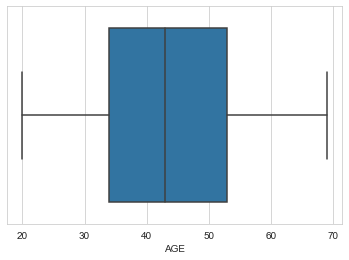

In [51]:
sns.boxplot(appdata.AGE)
plt.show()

- There are no outliers in Age column. 
- It has values ranging from 20 to 69 with mean being 43.44

#### Binning age column.

In [52]:
#a new column 'Age-Group' will be created after this operation with the cooresponding age group as per binning.

appdata['Age_Group']=pd.cut(appdata.AGE,[0,20,30,40,50,60,100],labels=['0-20','21-30','31-40','41-50','51-60','60+'])

In [53]:
appdata.Age_Group.value_counts()

31-40    83117
41-50    74401
51-60    67819
21-30    52805
60+      29368
0-20         1
Name: Age_Group, dtype: int64

#### Binning Income

In [54]:
appdata.AMT_INCOME_TOTAL.isnull().sum()

0

In [55]:
appdata.AMT_INCOME_TOTAL.describe()

count      307511.0000
mean       168797.9193
std        237123.1463
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000
Name: AMT_INCOME_TOTAL, dtype: float64

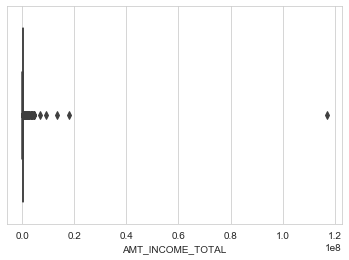

In [56]:
sns.boxplot(appdata.AMT_INCOME_TOTAL)
plt.show()

- These huge values could be real since most of the values belong to Business entity /Self Employed Organization type 

In [57]:
#a new column 'Income_Range' will be created after this operation.

appdata['Income_Range'] = pd.cut(appdata['AMT_INCOME_TOTAL'], [0,50000,100000,300000,500000,1000000,10000000,15000000],
                        labels=['Very Low','Low','Below Avg','Average','Above Avg','High','Very high'])

In [58]:
appdata['Income_Range'].value_counts()

Below Avg    221074
Low           59181
Average       20037
Very Low       4517
Above Avg      2452
High            247
Very high         1
Name: Income_Range, dtype: int64

#### Binning Credit Amount

In [59]:
appdata.AMT_CREDIT.isnull().sum()

0

In [60]:
appdata.AMT_CREDIT.describe()

count    307511.0000
mean     599025.9997
std      402490.7770
min       45000.0000
25%      270000.0000
50%      513531.0000
75%      808650.0000
max     4050000.0000
Name: AMT_CREDIT, dtype: float64

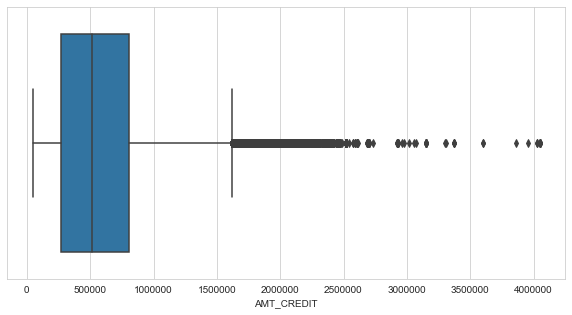

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(appdata.AMT_CREDIT)
plt.show()

- there are outliers from around 1600000. 
- These huge values could be real since most of the values belong to Business entity /Self Employed Organization type

In [62]:
#a new column 'Credit' will be created after this operation

appdata['Credit'] = pd.cut(appdata['AMT_CREDIT'], [0,100000,300000,550000,800000,1000000,10000000],
                        labels=['> 1L','1L - 3L','3L - 5.5L','5.5L - 8L','8L - 10L','10L +'])

In [63]:
appdata.Credit.value_counts()

1L - 3L      84953
3L - 5.5L    81054
5.5L - 8L    54796
10L +        49985
8L - 10L     30719
> 1L          6004
Name: Credit, dtype: int64

In [64]:
appdata.CNT_CHILDREN.describe()

count   307511.0000
mean         0.4171
std          0.7221
min          0.0000
25%          0.0000
50%          0.0000
75%          1.0000
max         19.0000
Name: CNT_CHILDREN, dtype: float64

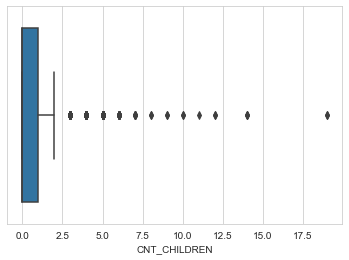

In [65]:
sns.boxplot(appdata.CNT_CHILDREN)
plt.show()

- As seen above, max number of children is 19.  Which means, there are outliers from 2 to 19
- these outliers might be due to data entry error or a case of children from multiple marriages.

In [66]:
appdata.AMT_GOODS_PRICE.describe()

count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

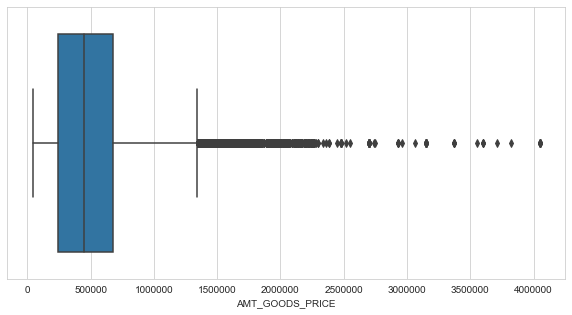

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(appdata.AMT_GOODS_PRICE)
plt.show()

- There are outliers from almost 1300000
- As with AMT_CREDIT values these huge values also could be real as it accounts for the value of goods for which the loan is given

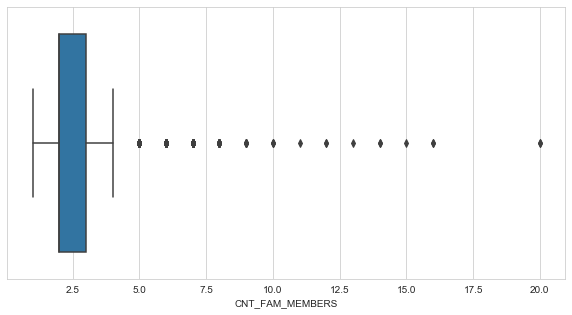

In [68]:
plt.figure(figsize=(10,5))
sns.boxplot(appdata.CNT_FAM_MEMBERS)
plt.show()

- here the outlier could be the result of data entry error or a case of joint family.

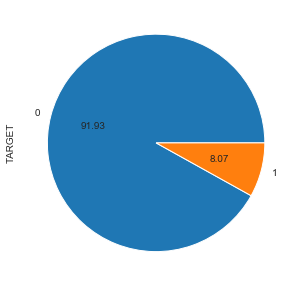

In [69]:
#checking if the data iss balanced with rspect to target variable.
#Here 'TARGET' column is the target variable with values 0 and 1. 
#1 represents defaulter and 0 represents non-defaulter / all other cases

plt.figure(figsize=(5,5))

appdata.TARGET.value_counts().plot.pie(autopct='%.2f')

plt.show()

As illustarted above, we can see that, in the given data set, 
- 8.07% individuals are defaulters.
- 91.93% are non-defaulters 

In [70]:
imb_ratio = round(len(appdata[appdata.TARGET == 0]) / len(appdata[appdata.TARGET == 1]),2)

In [71]:
imb_ratio

11.39

There is an imbalance ratio of 11.39  : 1 with respect to the target variable; for non-defaulters and defaulters [91.93 : 8.07]. This means majority of the data is with 'target = 0'. 


#### Since the dataset is imbalanced, devide the dataframe in to two.

1. no_default with Target = 0
2. default with Traget = 1

In [72]:

#dataframe with traget = 0 --> i.e data consists of individuals who are not defaulters / no payment issues / all other cases

no_default = appdata[appdata.TARGET == 0]


In [73]:
no_default.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   
5       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1             0       270000.0000 1293502.5000   35698.5000     1129500.0000   
2             0        67500.0000  135000.0000    6750.0000      135000.0000   
3             0       135000.0000  312682.5000   29686.5000      297000.0000   
4             0       121500.0000  513000.0000   21865.5000      513000.0000   
5             0        99000.0000  490495.5000   27517.5000      454500.0000   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE  DAYS_EMPLOYED  \
1               Married  House / apartment   45           1188   
2  Single / not married  House / apartment   52            225   
3        Civil marriage  House / apartment   52           3039   
4  Single / not married  House / apartment   54           3038   
5               Married  House / apartment   46           1588   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1               1186              291      Core staff           2.0000   
2               4260             2531        Laborers           1.0000   
3               9833             2437        Laborers           2.0000   
4               4311             3458      Core staff           1.0000   
5               4970              477        Laborers           2.0000   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       0                        1                Religion   
5                       0                        0                   Other   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
1        0.6222           nan                    1.0000   
2        0.5559        0.7296                    0.0000   
3        0.6504           nan                    2.0000   
4        0.3227           nan                    0.0000   
5        0.3542        0.6212                    0.0000   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
1                    0.0000                    1.0000   
2                    0.0000                    0.0000   
3                    0.0000                    2.0000   
4                    0.0000                    0.000

In [74]:
no_default.shape

(282686, 44)

In [75]:
#dataframe with traget = 1 --> i.e data consists of individuals who are defaulters

default = appdata[appdata.TARGET == 1]

In [76]:
default.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0        1         Cash loans           M            N               Y   
26       1         Cash loans           F            N               Y   
40       1         Cash loans           M            N               Y   
42       1         Cash loans           F            N               N   
81       1         Cash loans           F            N               Y   

    CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              0       202500.0000  406597.5000   24700.5000      351000.0000   
26             0       112500.0000  979992.0000   27076.5000      702000.0000   
40             0       202500.0000 1193580.0000   35028.0000      855000.0000   
42             0       135000.0000  288873.0000   16258.5000      238500.0000   
81             0        81000.0000  252000.0000   14593.5000      252000.0000   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
26   Unaccompanied               Working  Secondary / secondary special   
40   Unaccompanied  Commercial associate  Secondary / secondary special   
42   Unaccompanied               Working  Secondary / secondary special   
81   Unaccompanied             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE  DAYS_EMPLOYED  \
0   Single / not married  House / apartment   25            637   
26                 Widow  House / apartment   51           2628   
40               Married  House / apartment   47           1262   
42        Civil marriage  House / apartment   36           3597   
81               Married  House / apartment   67         365243   

    DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                3648             2120        Laborers           1.0000   
26               6573             1827   Cooking staff           1.0000   
40               1182             1029        Laborers           2.0000   
42                 45             4409     Sales staff           2.0000   
81               5391             4199             NaN           2.0000   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                        0                        0  Business Entity Type 3   
26                       0                        0  Business Entity Type 3   
40                       0                        0  Business Entity Type 3   
42                       0                        0           Self-employed   
81                       0                        0                     XNA   

    EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0         0.2629        0.1394                    2.0000   
26        0.5485        0.1907                   10.0000   
40        0.3068        0.3202                    0.0000   
42        0.6742        0.3997                    1.0000   
81        0.0240        0.7209                    1.0000   

    DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                     2.0000                    2.0000   
26                    1.0000                   10.0000   
40                    0.0000 

In [77]:
default.shape

(24825, 44)

**Columns that are considered for Analysis - Except the target variable [TARGET]**

1. NAME_CONTRACT_TYPE
2. CODE_GENDER
3. FLAG_OWN_CAR
4. FLAG_OWN_REALTY
5. AMT_INCOME_TOTAL
6. AMT_CREDIT
7. AMT_ANNUITY
8. AMT_GOODS_PRICE
9. NAME_TYPE_SUITE
10. NAME_INCOME_TYPE
11. NAME_EDUCATION_TYPE
12. NAME_FAMILY_STATUS
13. NAME_EDUCATION_TYPE
14. NAME_HOUSING_TYPE
15. OCCUPATION_TYPE
16. ORGANIZATION_TYPE
17. AGE
18. CNT_FAM_MEMBERS
19. DEF_30_CNT_SOCIAL_CIRCLE
20. DEF_60_CNT_SOCIAL_CIRCLE
21. OBS_30_CNT_SOCIAL_CIRCLE
22. OBS_60_CNT_SOCIAL_CIRCLE
23. Age_group
24. Income_Range
25. Credit

### CATEGORICAL VARIABLES ANALYSIS
Since analysis is to be done on mutiple columns of two dataframes, we will define a function for each type of analysis.

#### Univariate - Categorical

In [78]:

def uni_categ(col_name, fsize):
    
    fig, ax = plt.subplots(1,2, sharey = 'row', figsize=fsize)
    fig.suptitle("Distribution of "+col_name, fontsize=24, weight='bold', color='black')
    
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['axes.titlepad'] = 15
    plt.rcParams['axes.titlesize'] = 20
    
    #------------- GREEN PLOT USED FOR NON DEFAULTERS --> TARGET = 0 --------------
    
    ax[0].set_title("w.r.t Target = 0")
    ax[0].set_xlabel("COUNT", size=20)
    ax[0].set_ylabel(col_name, size=20)
    no_default[col_name].value_counts().plot.barh(color="#B6DCB6",edgecolor="black", ax=ax[0])
    fig.show()
    
    #------------- RED PLOT USED FOR DEFAULTERS --> TARGET = 1 --------------
    
    ax[1].set_title("w.r.t Target = 1")
    ax[1].set_xlabel("COUNT", size=20)
    ax[1].set_ylabel(col_name, size=20)
    default[col_name].value_counts().plot.barh(color="#FFABAB",edgecolor="black", ax=ax[1])
    fig.show()
    

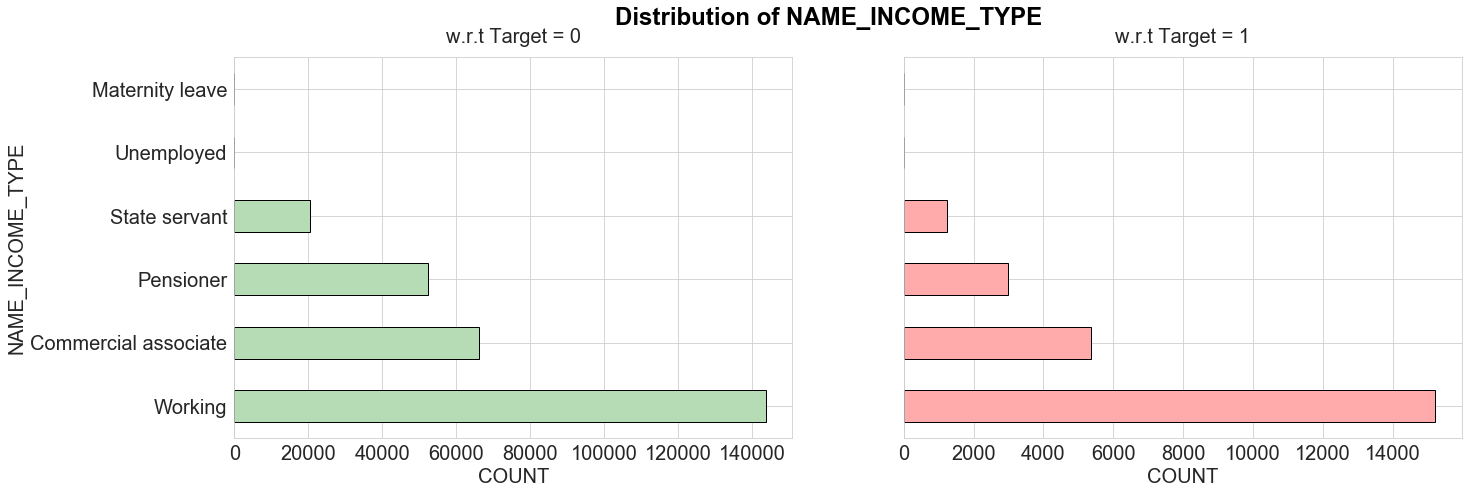

In [89]:
uni_categ("NAME_INCOME_TYPE", (22,7))

**`highest number of defaulters and non-defaulters are in 'working' Category.`**

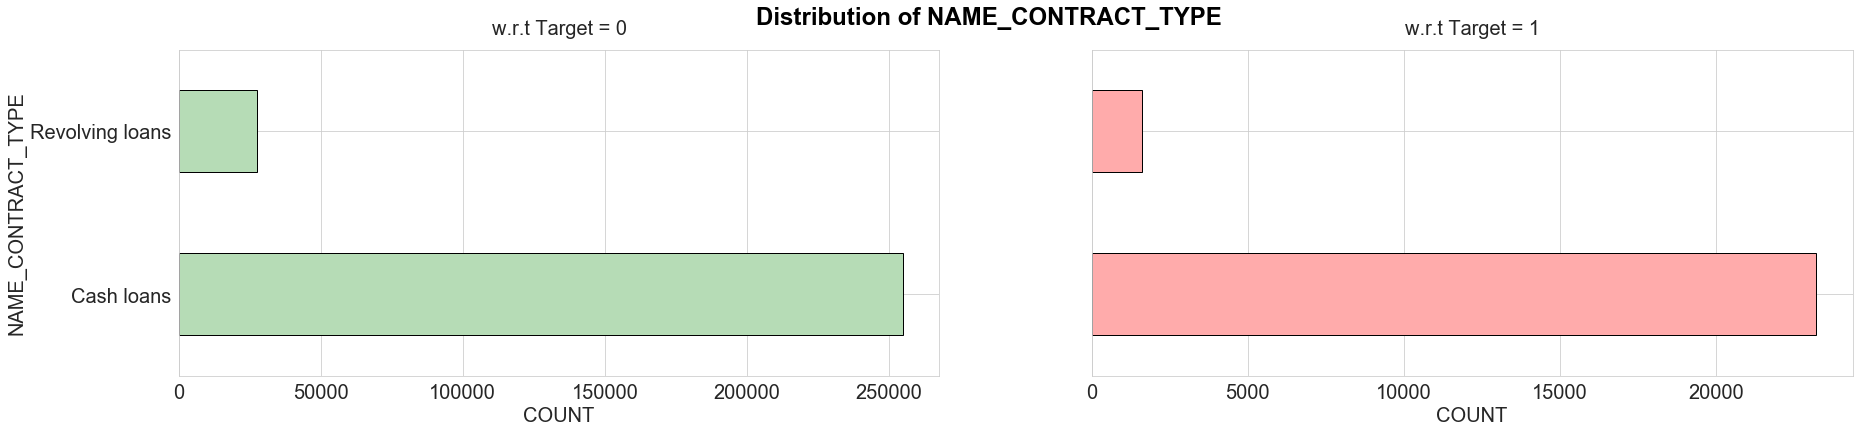

In [80]:
uni_categ("NAME_CONTRACT_TYPE", (30,6))

**`highest number of defaulters and non-defaulters are those who took cash loans.`**

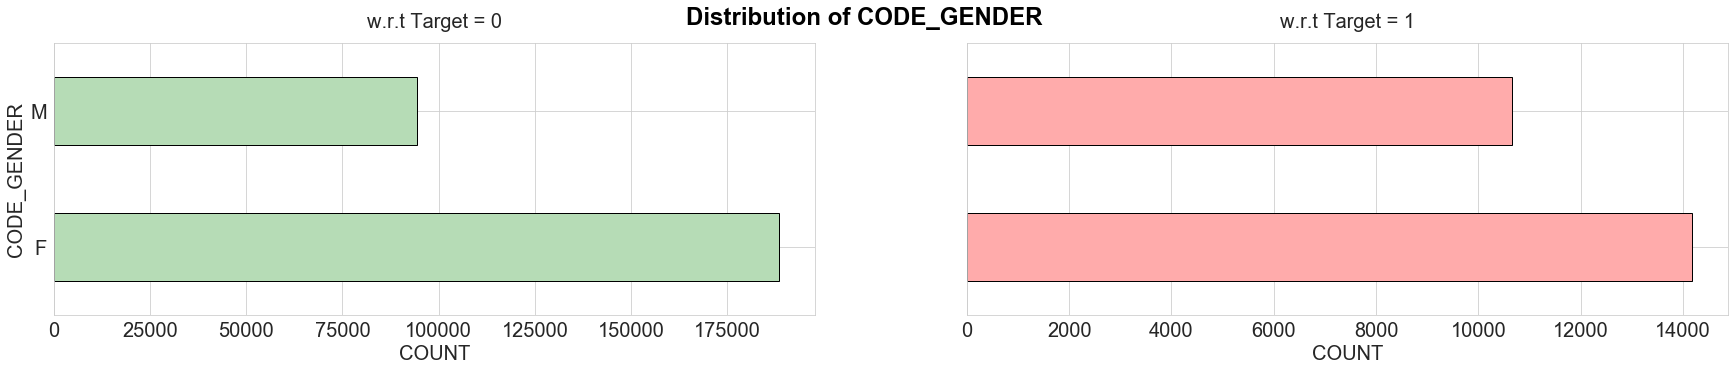

In [81]:
uni_categ("CODE_GENDER", (30,5))

**`highest number of defaulters and non-defaulters are Females`**

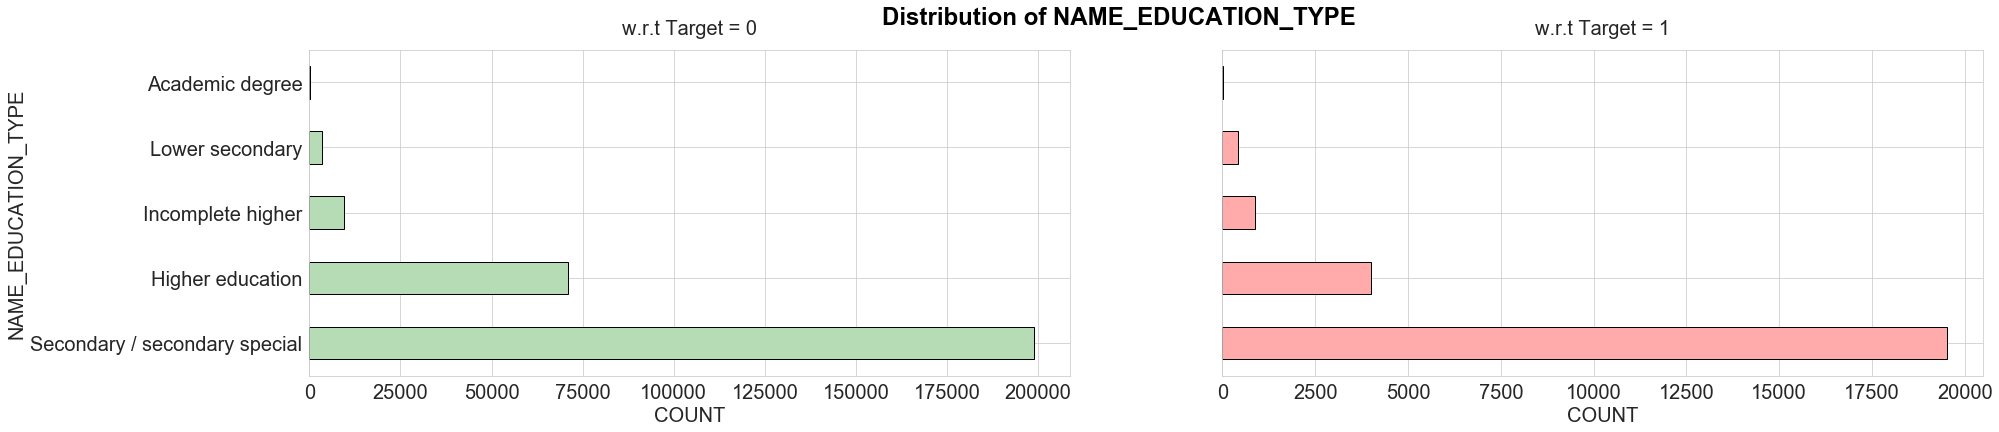

In [82]:
uni_categ("NAME_EDUCATION_TYPE",(30,6))

**`highest number of defaulters and non-defaulters have educaton level of Secondary; and lowest in Academic degree.`**

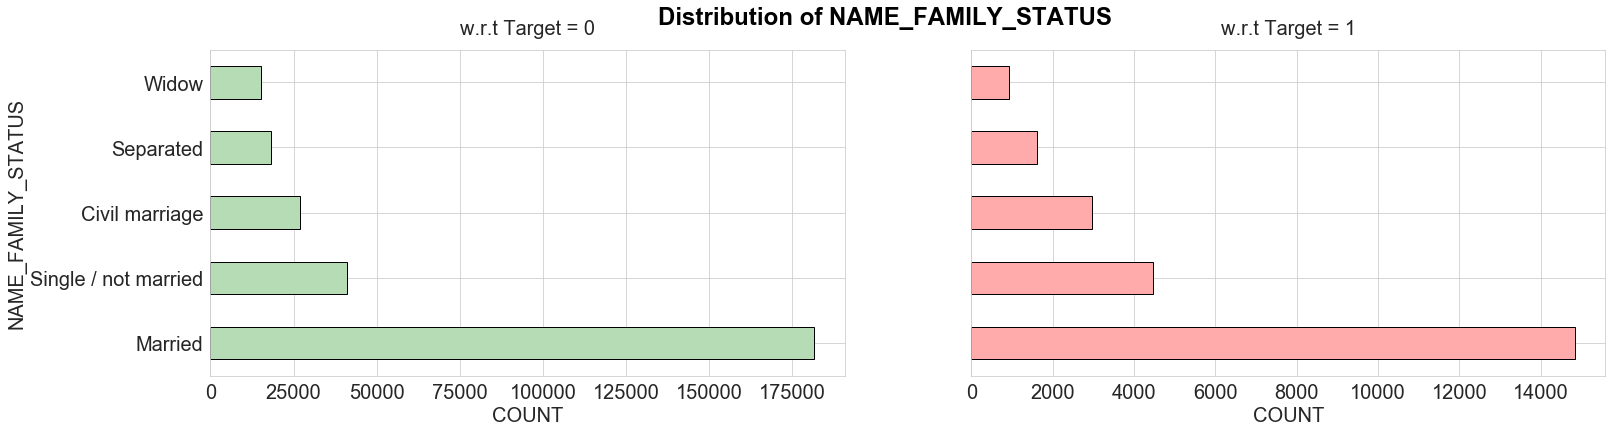

In [83]:
uni_categ("NAME_FAMILY_STATUS", (25,6))

**`highest number of defaulters and non-defaulters are in MARRIED category; and lowest in WIDOW category. `**

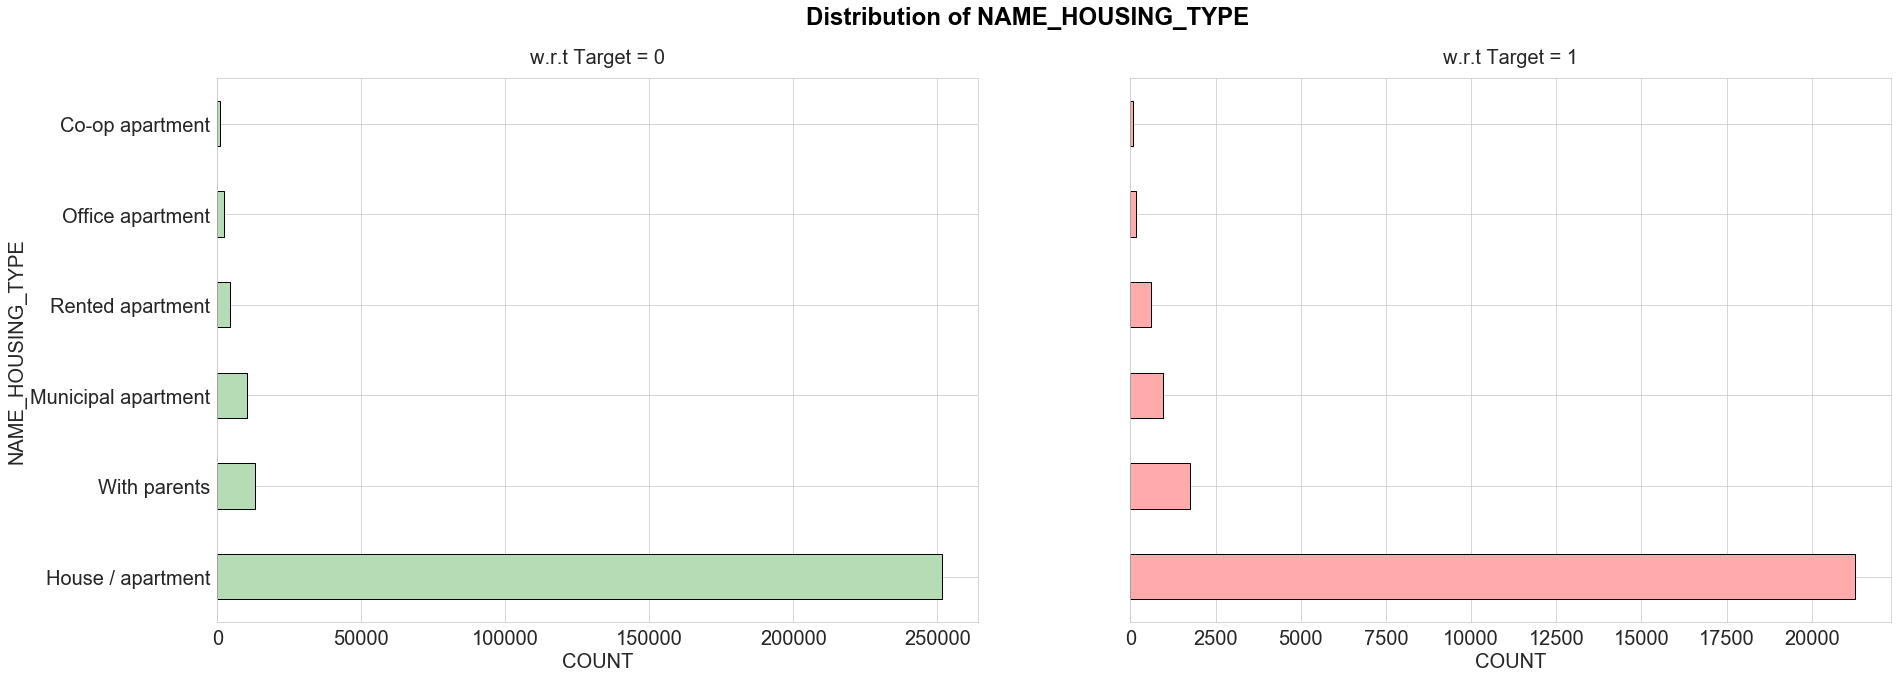

In [84]:
uni_categ("NAME_HOUSING_TYPE",(30,10))

**`highest number of defaulters and non-defaulters lives in house / apartment; lowest in co-op apartments.`**

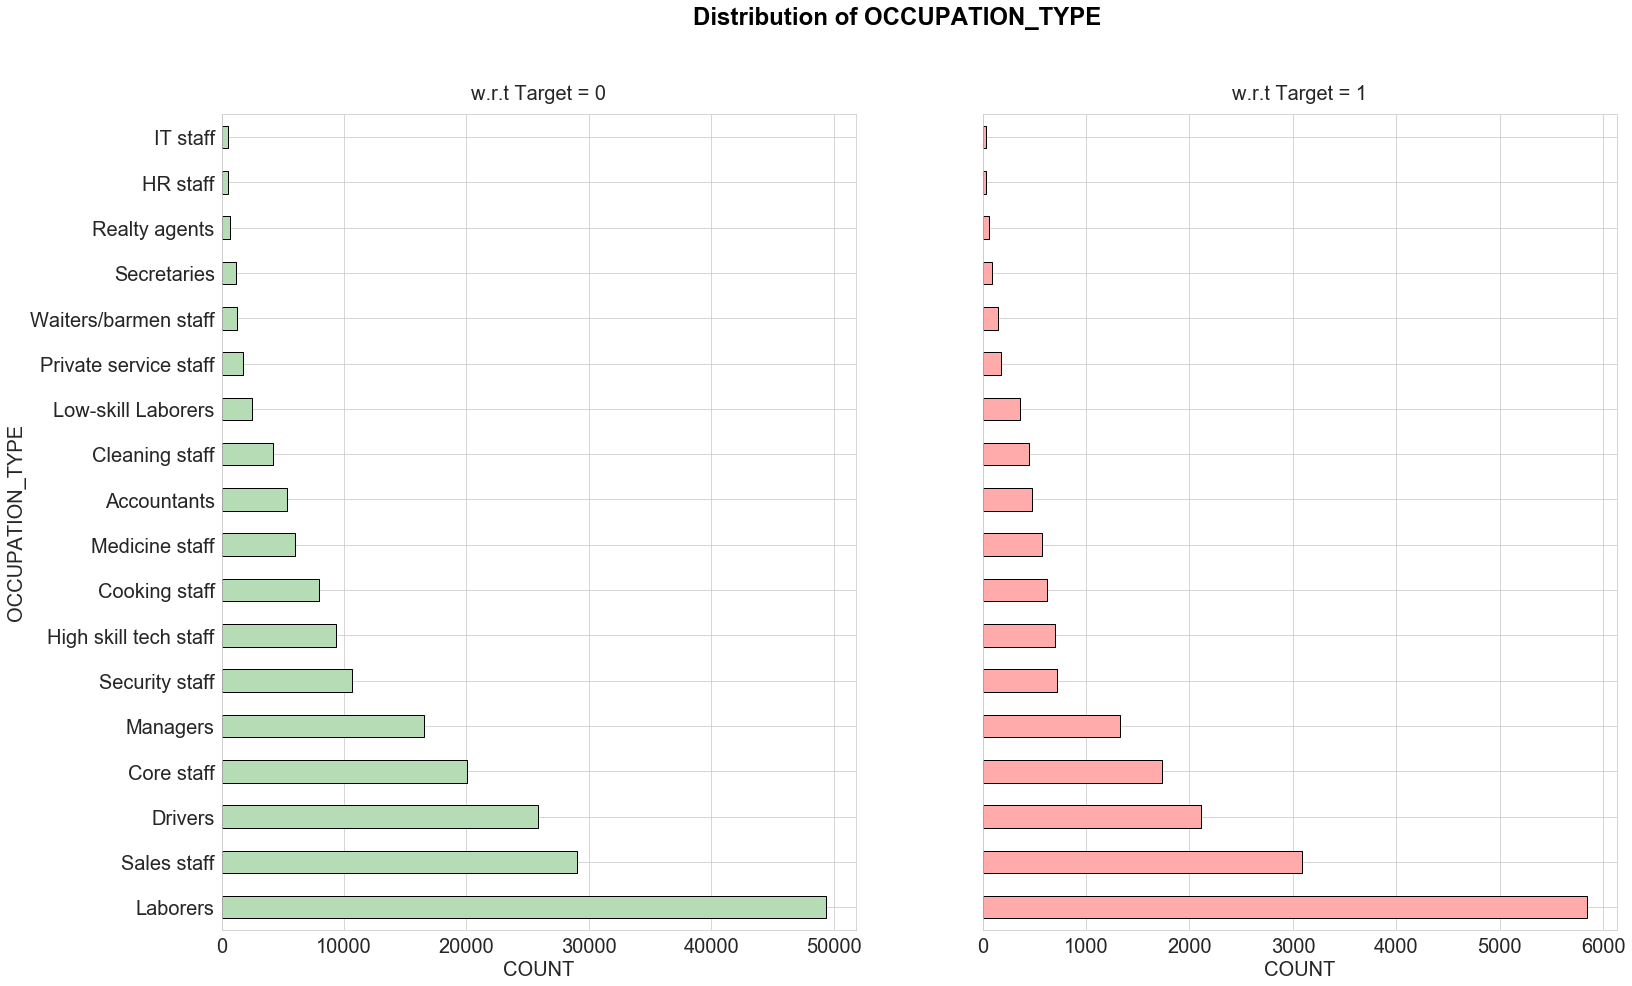

In [85]:
uni_categ("OCCUPATION_TYPE", (25,15))

**`highest number of defaulters and non-defaulters work as laborers, followed by Sales staffs; and lowest as IT staff.`**

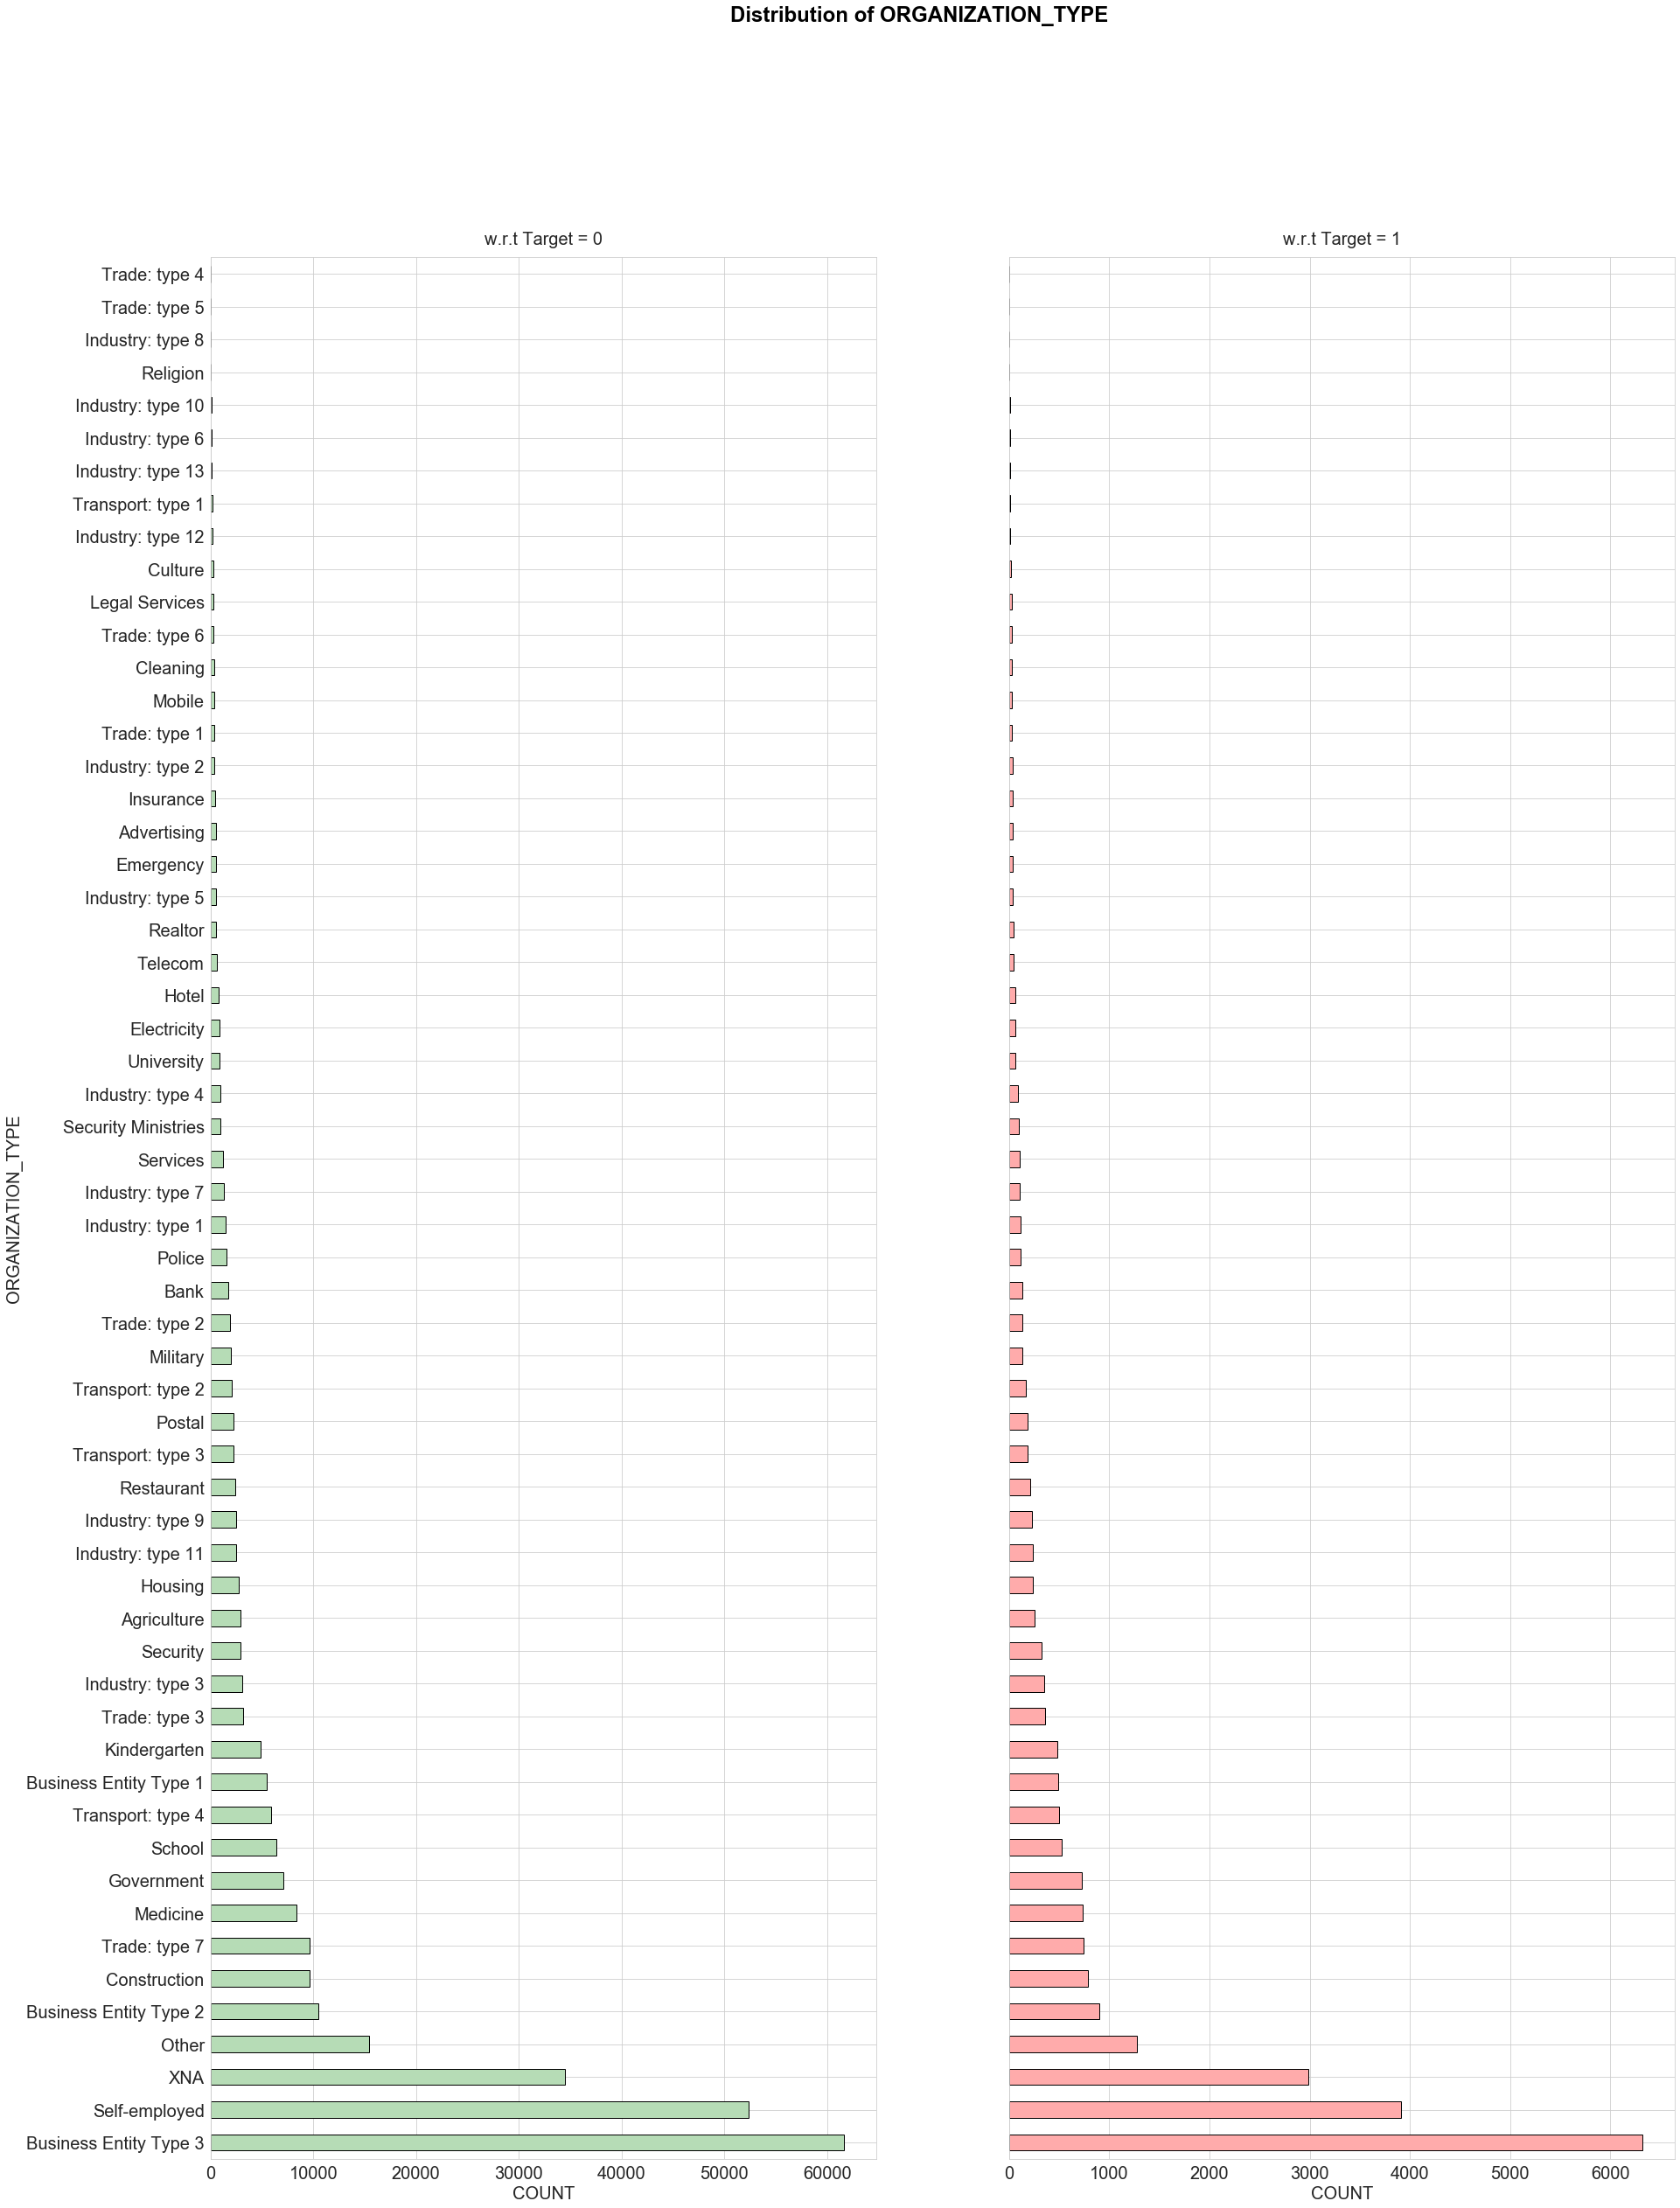

In [86]:
uni_categ("ORGANIZATION_TYPE",(30,40))

**`highest number of defaulters and non-defaulters are from Business: Enitity type 3, followed by self employed and XNA.`**

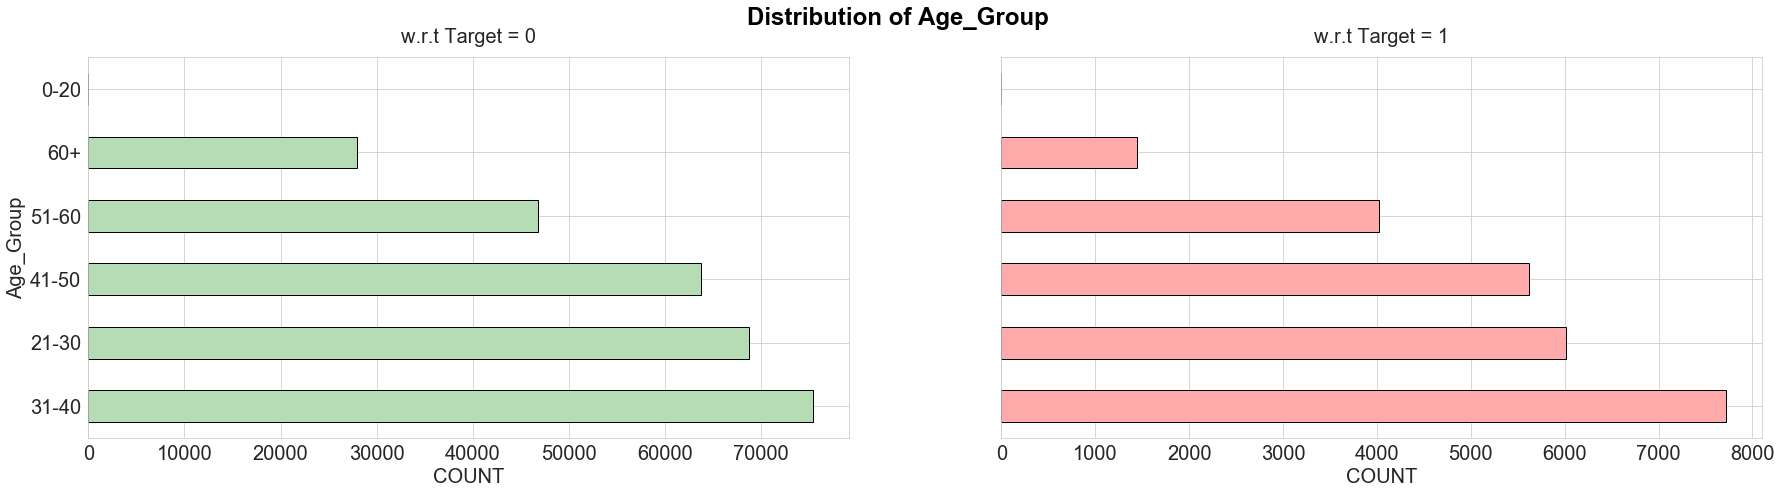

In [87]:
uni_categ("Age_Group",(30,7))

**`highest number of defaulters and non-defaulters lie in the same age group, i.e. 31-40; and low in 60+ range.`**

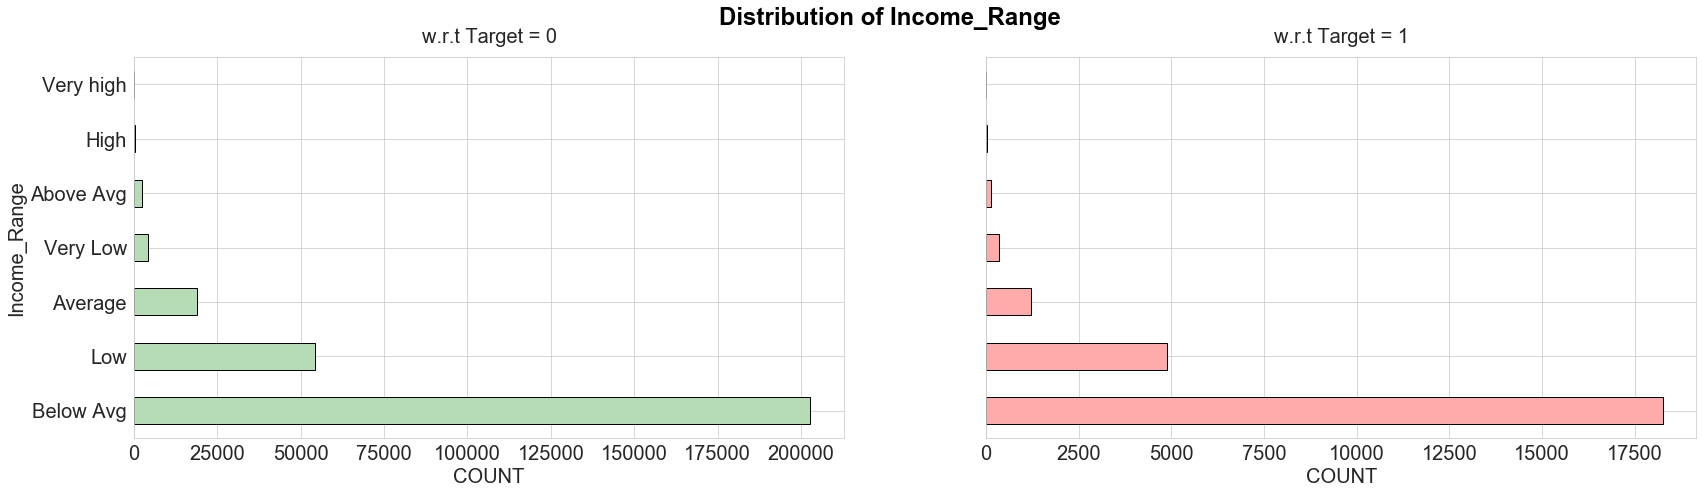

In [88]:
uni_categ("Income_Range",(28,7))

**`highest number of defaulters and non-defaulters get a below average annual income.`**

#### BI-VARIATE - Categorical to Categorical

In [90]:

def biv_categ(col_name, fsize):
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize=fsize)
    fig.suptitle(col_name + " Analysis Based On Gender", fontsize=24, weight='bold', color='navy')
    
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['axes.titlepad'] = 10
    plt.rcParams['axes.titlesize'] = 20
    
    #--------------------------- target = 0 ---------------------------------
    
    ax[0].set_title("w.r.t Target 0", fontsize=18)
    sns.countplot(x=col_name, hue='CODE_GENDER', data=no_default, palette=['lightcoral','mediumturquoise','gold'], ax = ax[0])  
    fig.show()
    
    
    #--------------------------- target = 1 ---------------------------------
    
    ax[1].set_title("w.r.t Target 1", fontsize=18)
    sns.countplot(x=col_name, hue='CODE_GENDER', data = default, palette = ['mediumturquoise','lightcoral','gold'], ax = ax[1])
    fig.show()
    

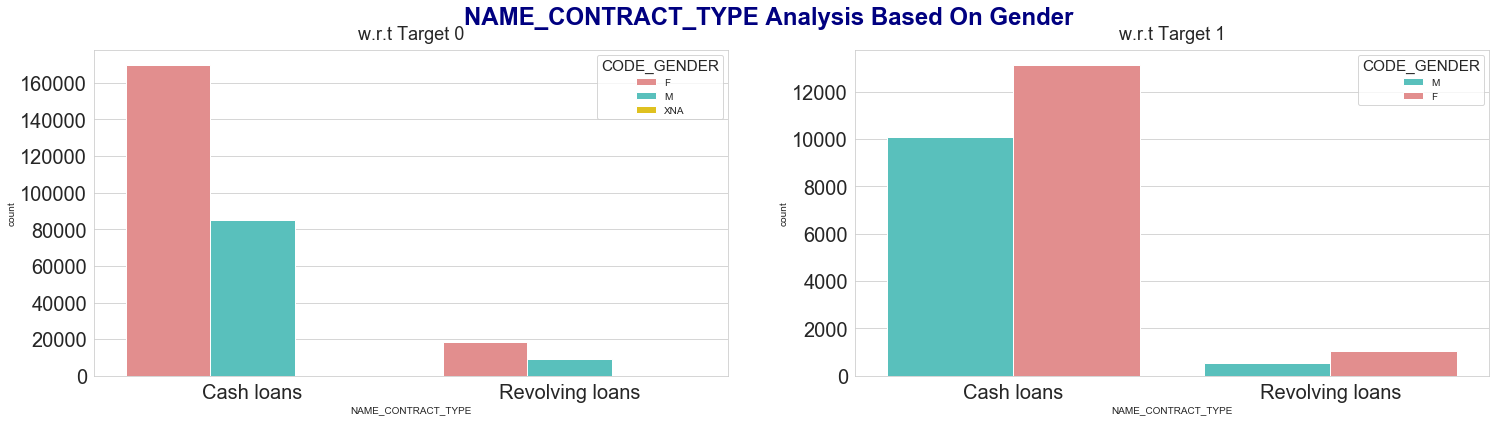

In [91]:
biv_categ("NAME_CONTRACT_TYPE",(25,6))

- ***`In both data set, Cash loans are more in count than Revolving loans.`***

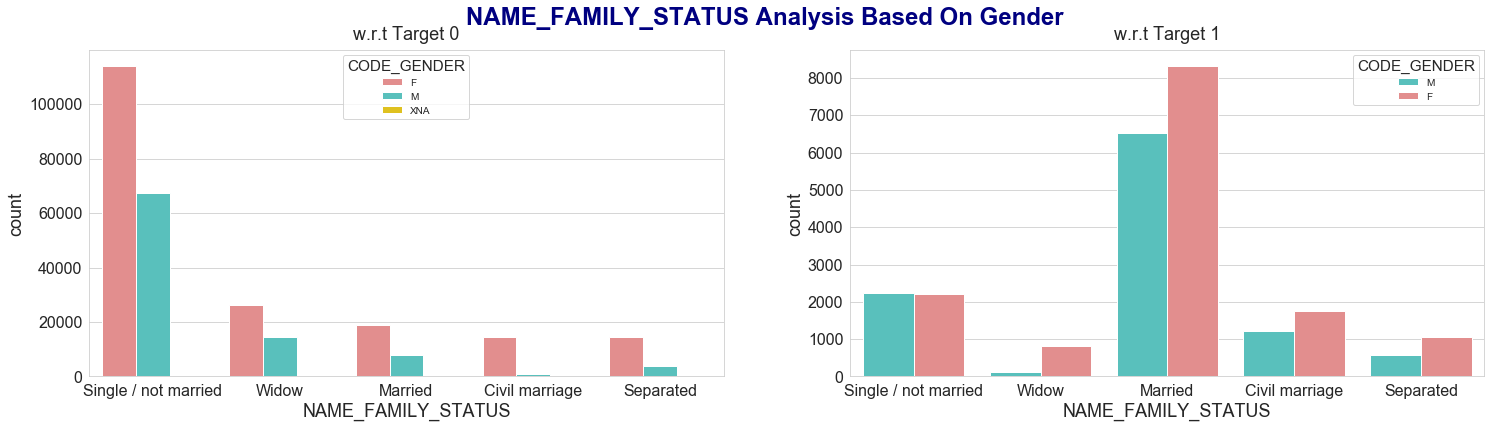

In [92]:
biv_categ("NAME_FAMILY_STATUS",(25,6))

- ***`In target=1 dataset, Married category stands the highest.`***
- ***`In target=0 dataset, Single/Not Married category stands the highest.`***

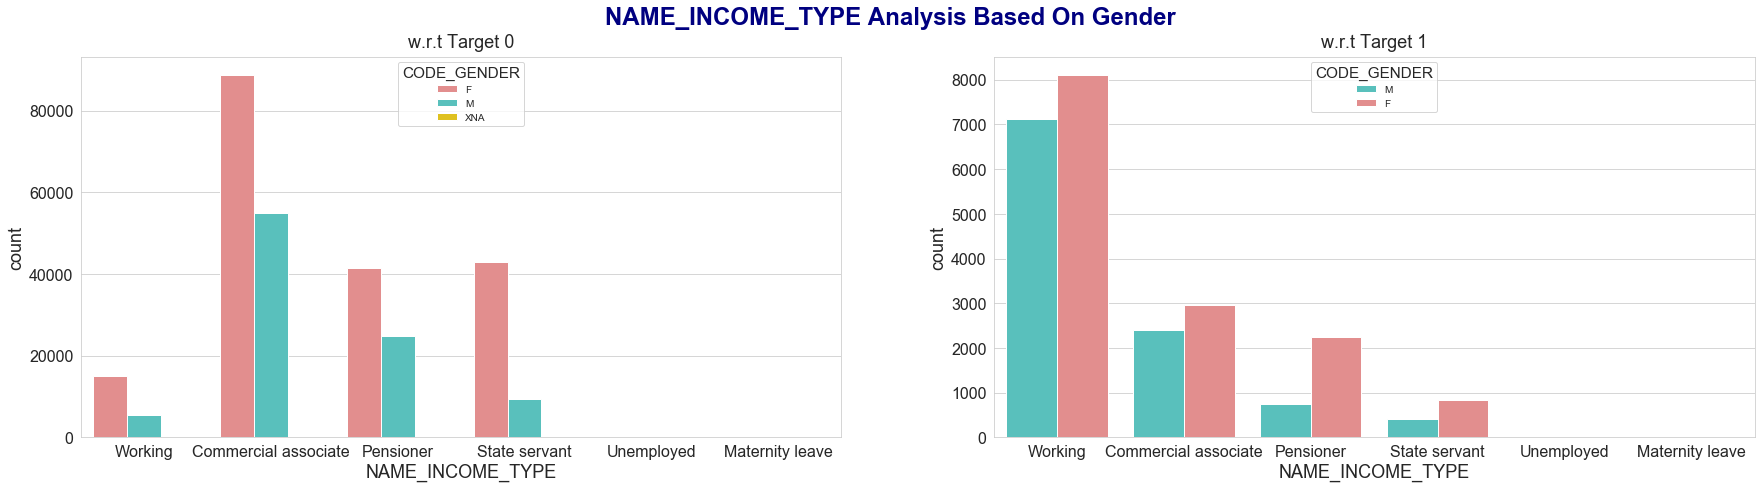

In [93]:
biv_categ("NAME_INCOME_TYPE",(30,7))

- ***`Working female and male group are the highest category in target=1.`***
- ***`Commercial Associates are the highest category in target=0.`***

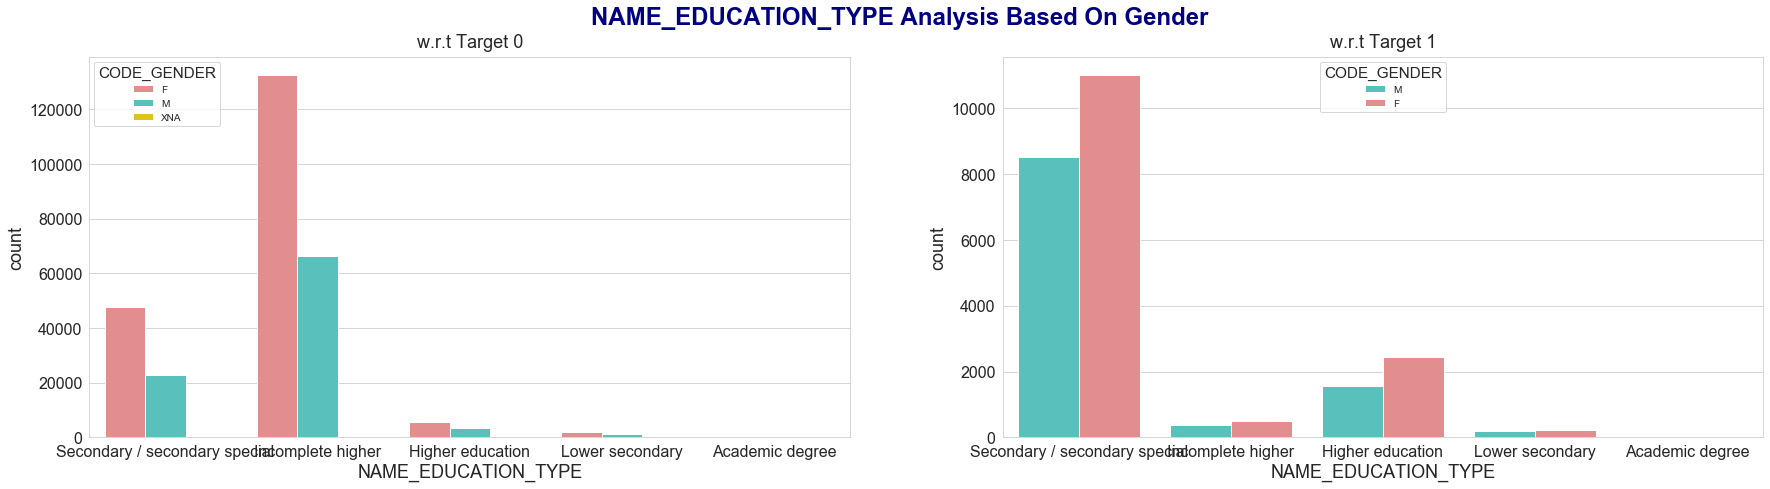

In [94]:
biv_categ("NAME_EDUCATION_TYPE",(30,7))

- ***`Defaulters [target=1] lies more in Secondary / Secondary special Education Type`***
- ***`Incomplete higher category group is the highest in non-defaulters [target=0].`***

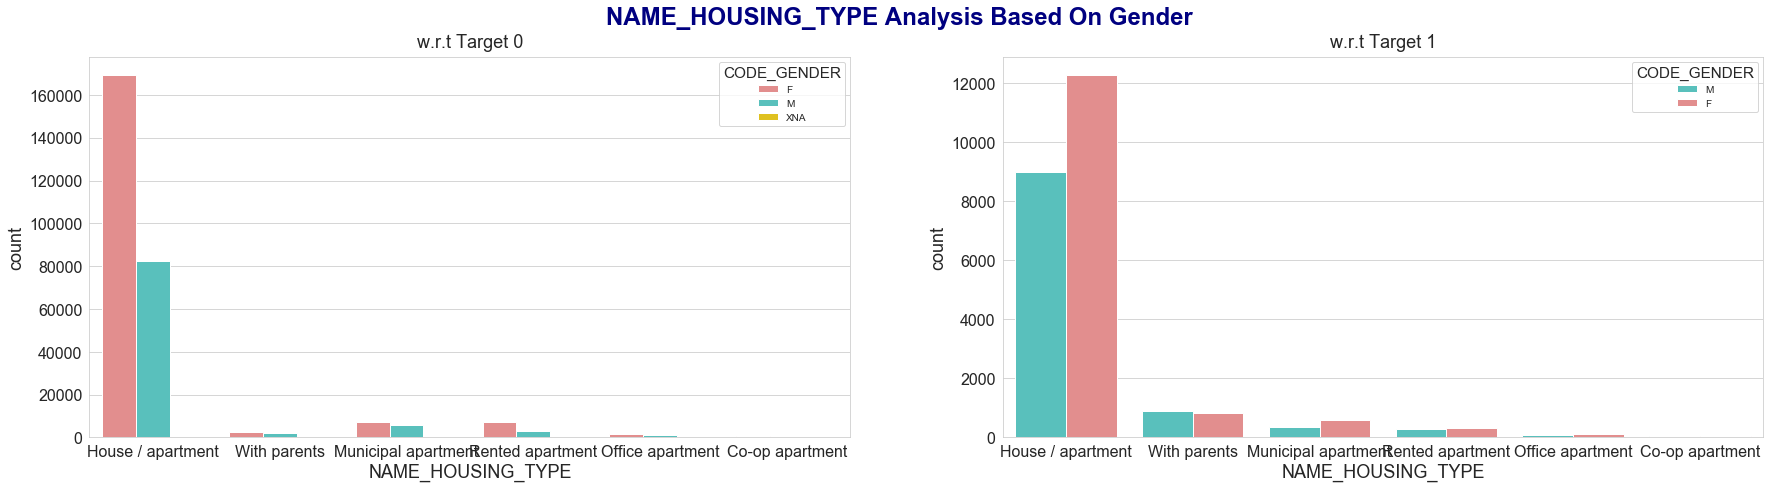

In [95]:
biv_categ("NAME_HOUSING_TYPE",(30,7))

- ***`No particular pattern in this analysis`***

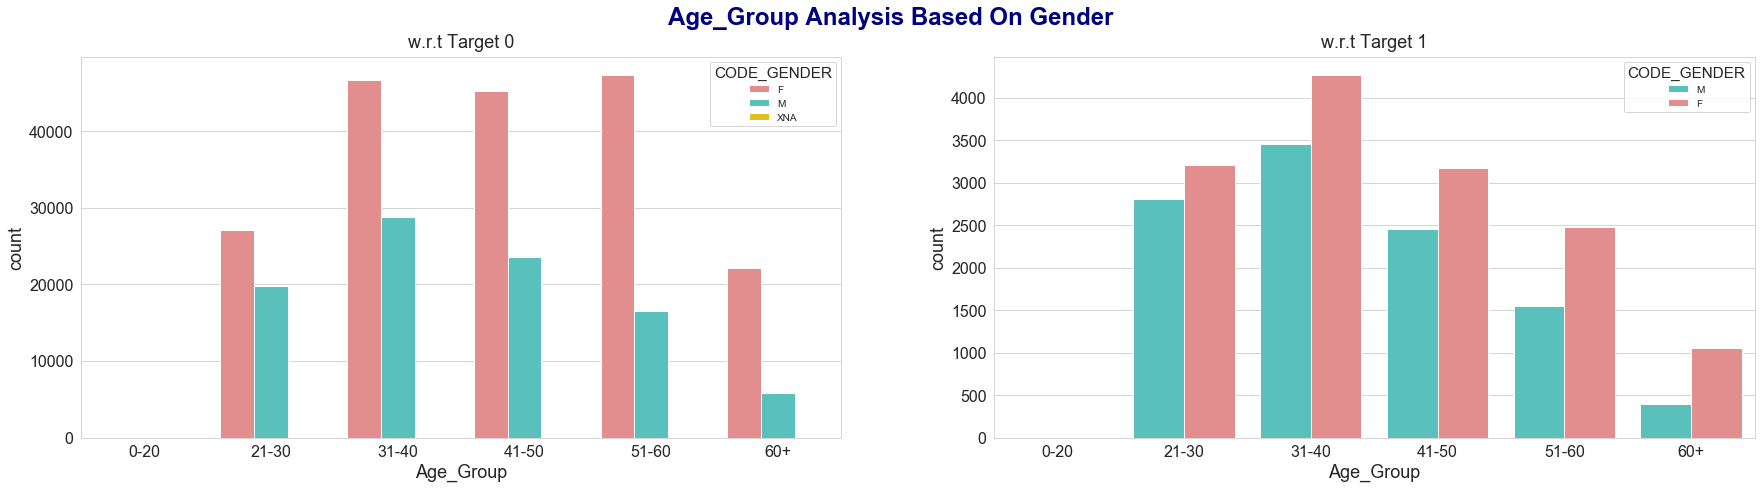

In [96]:
biv_categ("Age_Group",(30,7))

- ***`51 - 60 age group has the highest count in target=0. This age group should be considered more.`***
- ***`31 - 40 age group shows the highest count in target=1`***

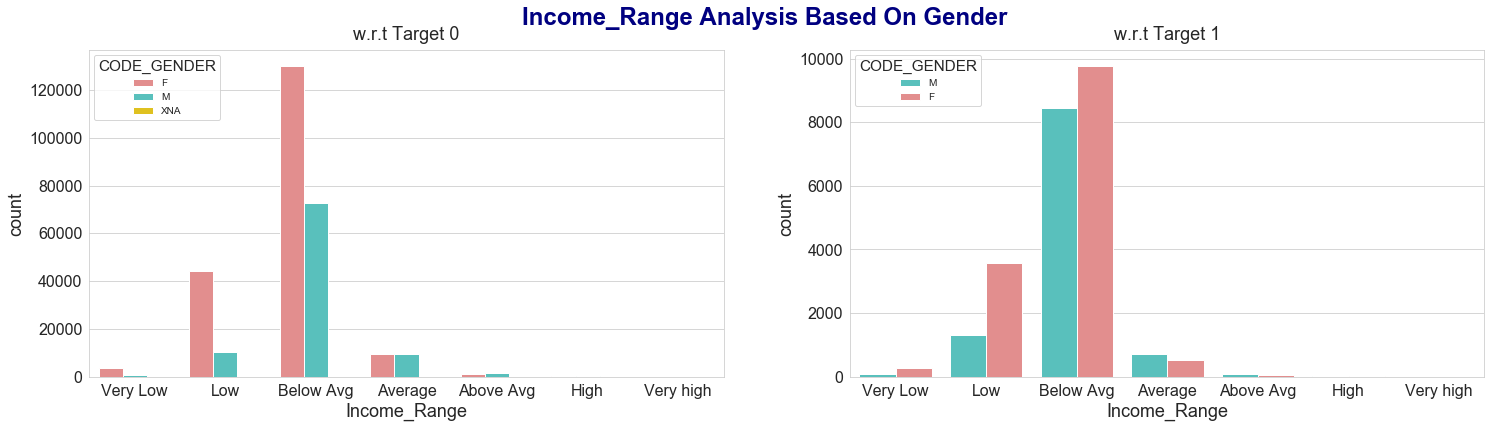

In [97]:
biv_categ("Income_Range",(25,6))

- ***`In target = 1 data set,i.e. the defaulters, Males in Average Income range have defaulted more; which is contrary to the other patterns in the graph.`***

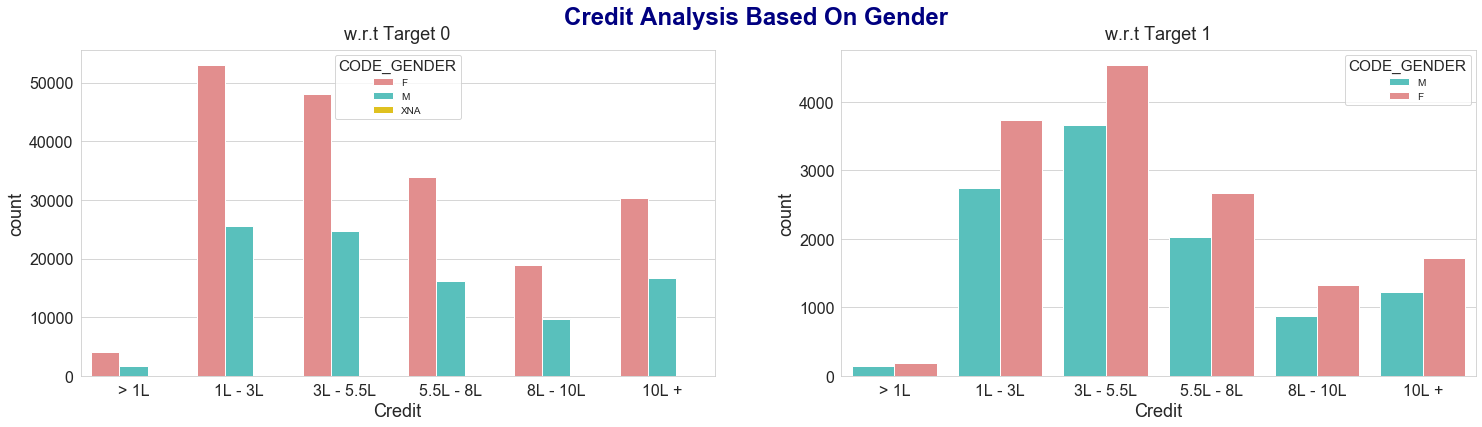

In [98]:
biv_categ("Credit",(25,6))

- ***`3L to 5.5L credit range have the highest count in taret = 1.`***
- ***`1 - 3L range has the hight count in target = 0.`***

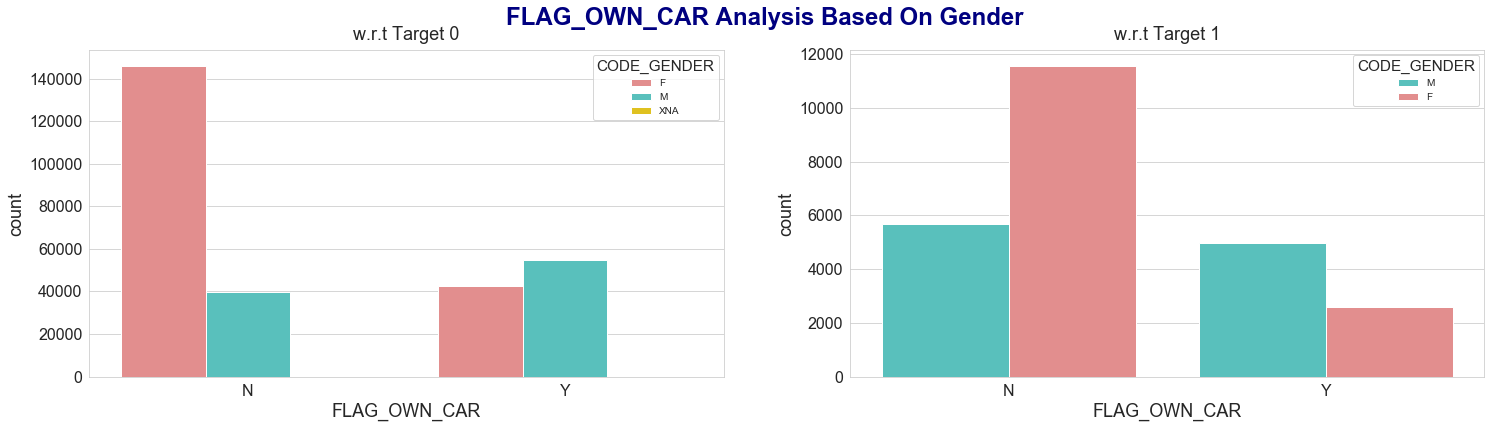

In [99]:
biv_categ("FLAG_OWN_CAR",(25,6))

- ***`follows a similar pattern`***

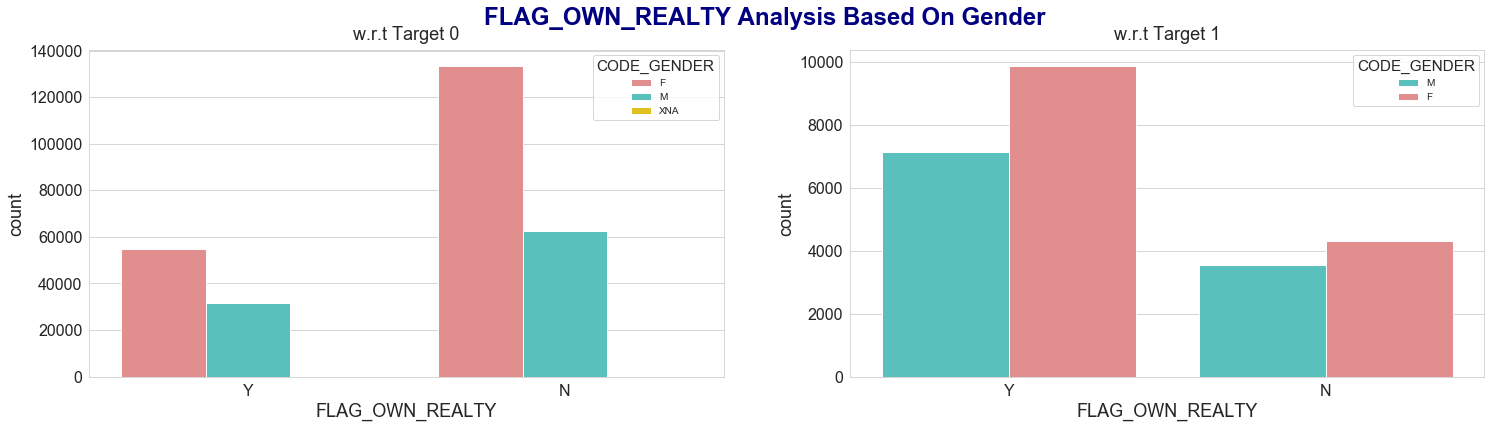

In [100]:
biv_categ("FLAG_OWN_REALTY",(25,6))

- ***`Customers who own realty tend to default more [target=1]`***
- ***`Customers without own realty do no default their payments [target=0].`***

#### Univariate - Continous Variables

In [101]:

def uni_num(col_name, fsize): #uni_num --> univarate analysis for numerical variables

    fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize=fsize)
    fig.suptitle(col_name + " Analysis", fontsize=20, weight='bold', color='black')
    
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['axes.titlepad'] = 10
    plt.rcParams['axes.titlesize'] = 20
    
    #--------------------------- target = 0 ---------------------------------
    
    ax[0].set_title("w.r.t Target = 0", fontsize=16)
    sns.distplot(no_default[col_name], color="darkgreen", ax=ax[0])
    ax[0].axvline(no_default[col_name].median(), color='black', linewidth=2, linestyle='--') #median
    fig.show()
    
    #--------------------------- target = 1 ---------------------------------
    
    ax[1].set_title("w.r.t Target = 1", fontsize=16)
    sns.distplot(default[col_name], color="crimson" , ax = ax[1])
    ax[1].axvline(default[col_name].median(), color='black', linewidth=2, linestyle='--') #median
    plt.show()

- **`vertical black dotted lines in the plot represents median value`**

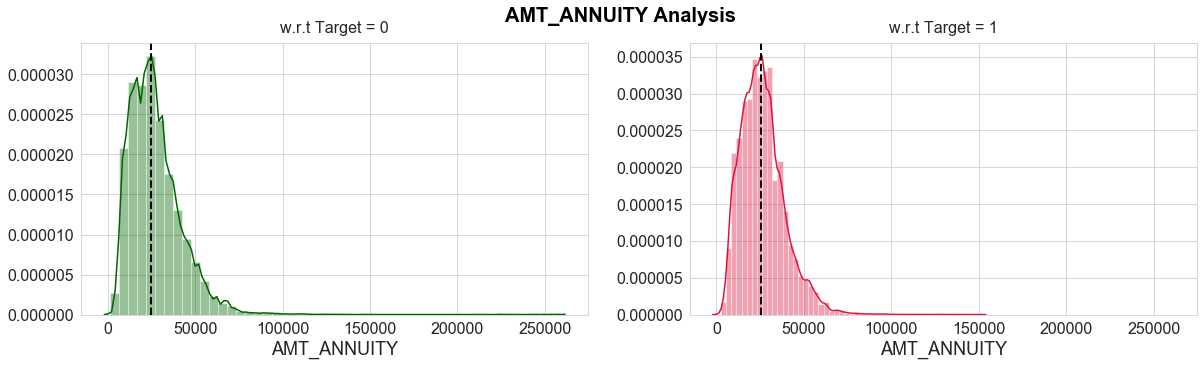

In [102]:
uni_num("AMT_ANNUITY",(20,5))

- ***`Since more data falls to the right of the median, it shows the presence of outliers.`***

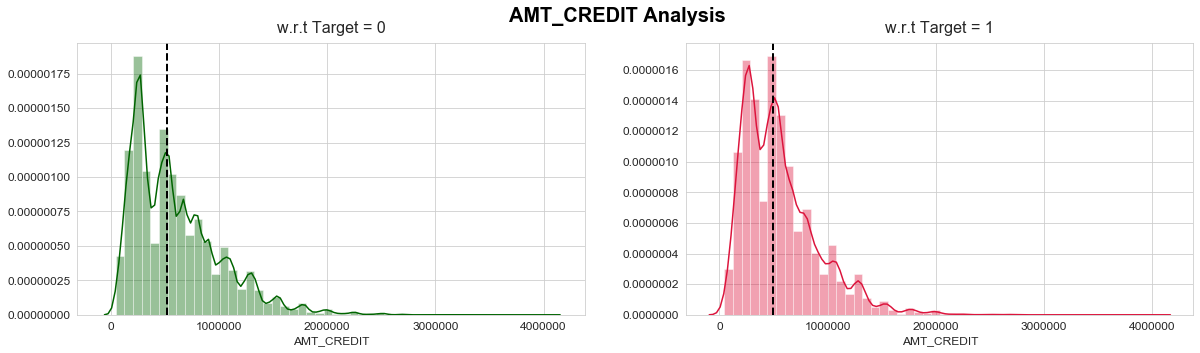

In [103]:
uni_num("AMT_CREDIT",(20,5))

- ***`Since more data falls to the right of the median, it shows the presence of outliers.`***

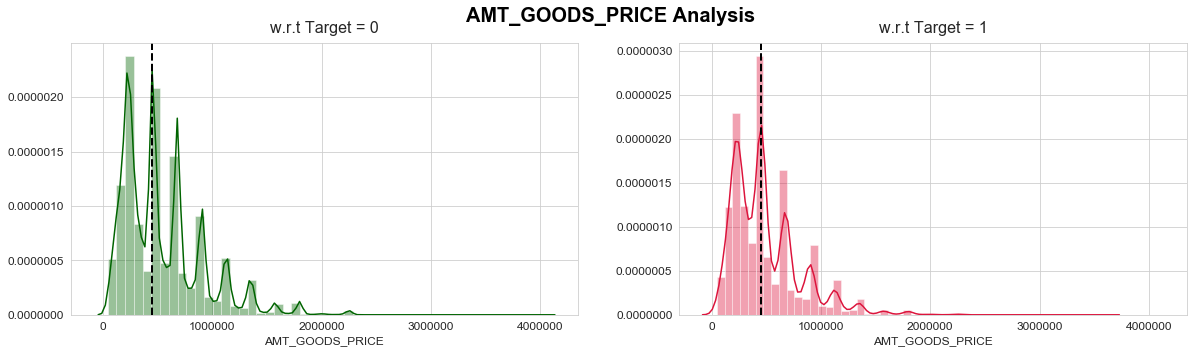

In [104]:
uni_num("AMT_GOODS_PRICE",(20,5))

- ***`Since more data falls to the right of the median, it shows the presence of outliers.`***

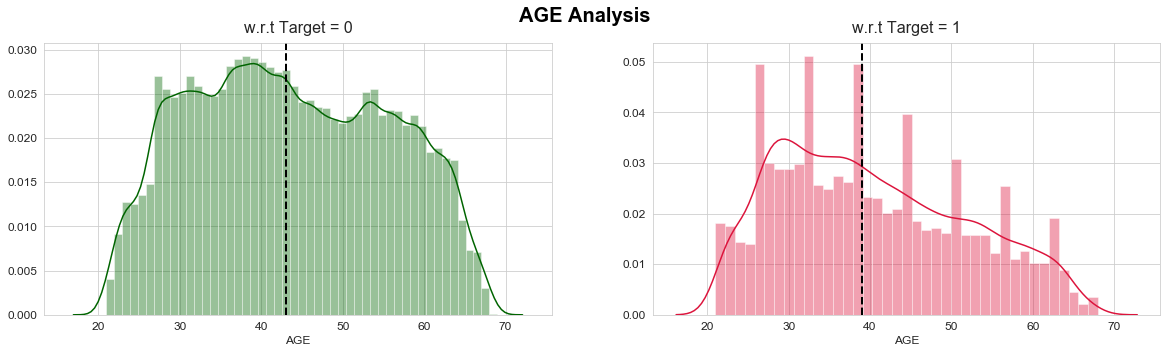

In [105]:
uni_num("AGE",(20,5))

        - ***`In target = 0 data set, age column has median value 43.`***
        - ***`In target = 1 data set, age column has median value 39.`***
        - ***`In both data set, there is no presence of outliers.`***

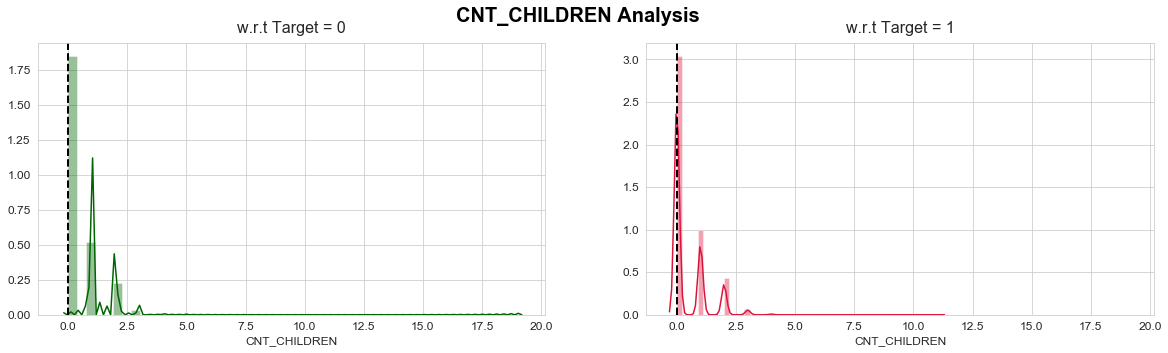

In [106]:
uni_num("CNT_CHILDREN",(20,5))

- ***`In both data set, median is 0; and there are outliers present.`***
- ***`More number of outliers are present in target = 0 data set.`***

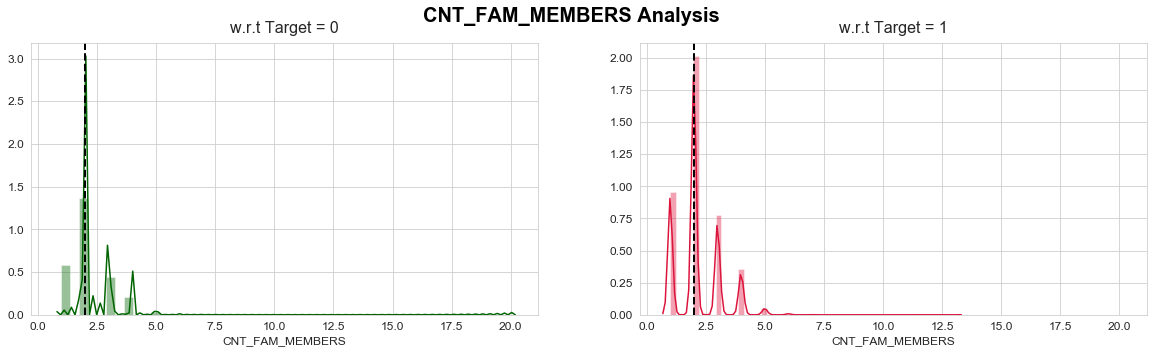

In [107]:
uni_num("CNT_FAM_MEMBERS",(20,5))

- ***`In both data set, median is 2; and there are outliers present.`***
- ***`More number of outliers are present in target = 0 data set.`***

#### Bi-variate - Continous to Continous

In [108]:
def biv_num(x_col, y_col, fsize):
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize=fsize)
    fig.suptitle(x_col + " vs. " + y_col, fontsize=24, weight='bold', color='black')
    
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['axes.titlepad'] = 10
    plt.rcParams['axes.titlesize'] = 22
    
    #--------------------------- target = 0 ---------------------------------
    
    ax[0].set_title("w.r.t Target = 0", fontsize=16)
    sns.scatterplot(x=x_col, y=y_col, data=no_default, color='darkgreen', ax=ax[0])
    fig.show()
    
    #--------------------------- target = 1 ---------------------------------
    
    ax[1].set_title("w.r.t Target = 1", fontsize=16)
    sns.scatterplot(x=x_col, y=y_col, data=default, color='crimson', ax=ax[1])
    fig.show()

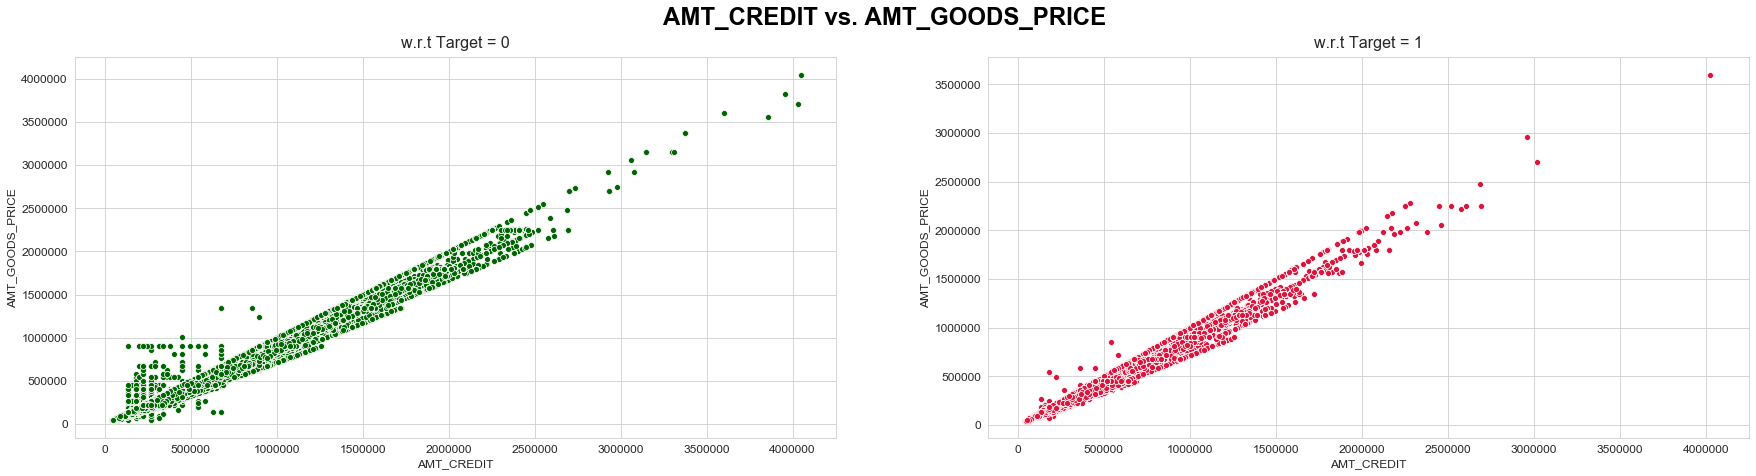

In [109]:
biv_num("AMT_CREDIT","AMT_GOODS_PRICE",(30,7))

- ***`there is a positive correlation betweeen these variables.`***
- ***`This means that, as the credit increases, goods price also increases.`***

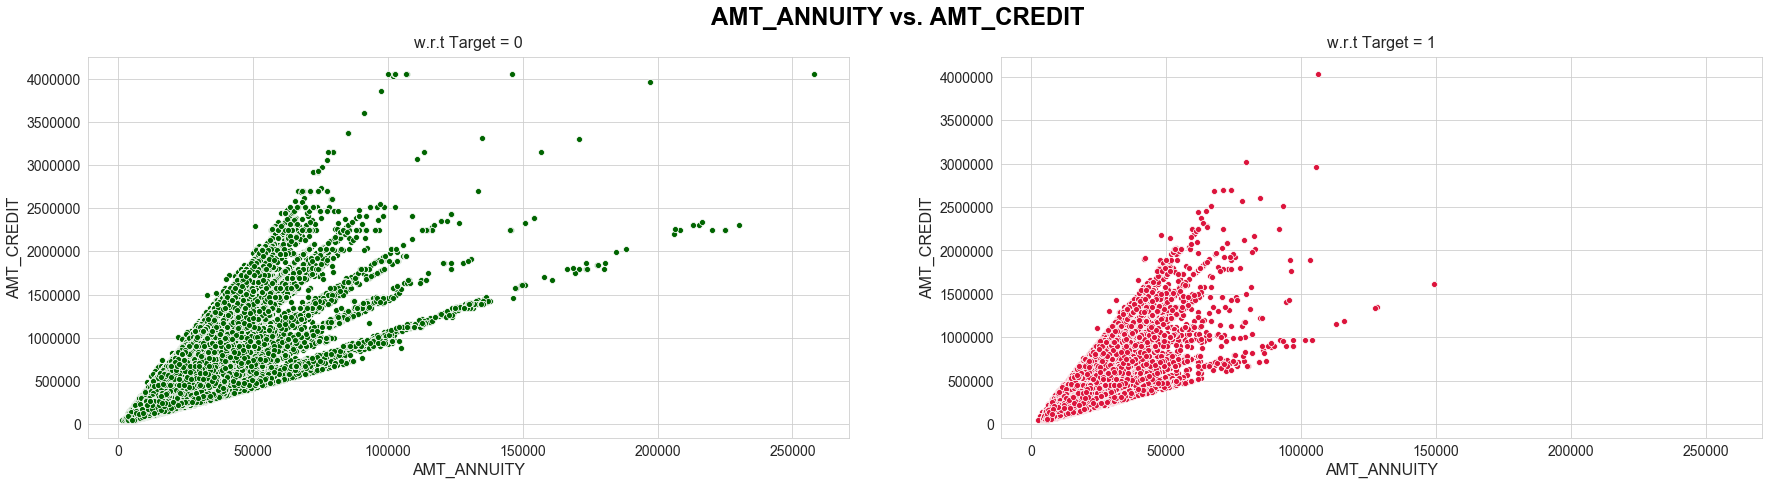

In [110]:
biv_num("AMT_ANNUITY","AMT_CREDIT",(30,7))

- ***`there is a positive correlation betweeen these variables.`***
- ***`This means that, as the credit increases, annuity also increases.`***

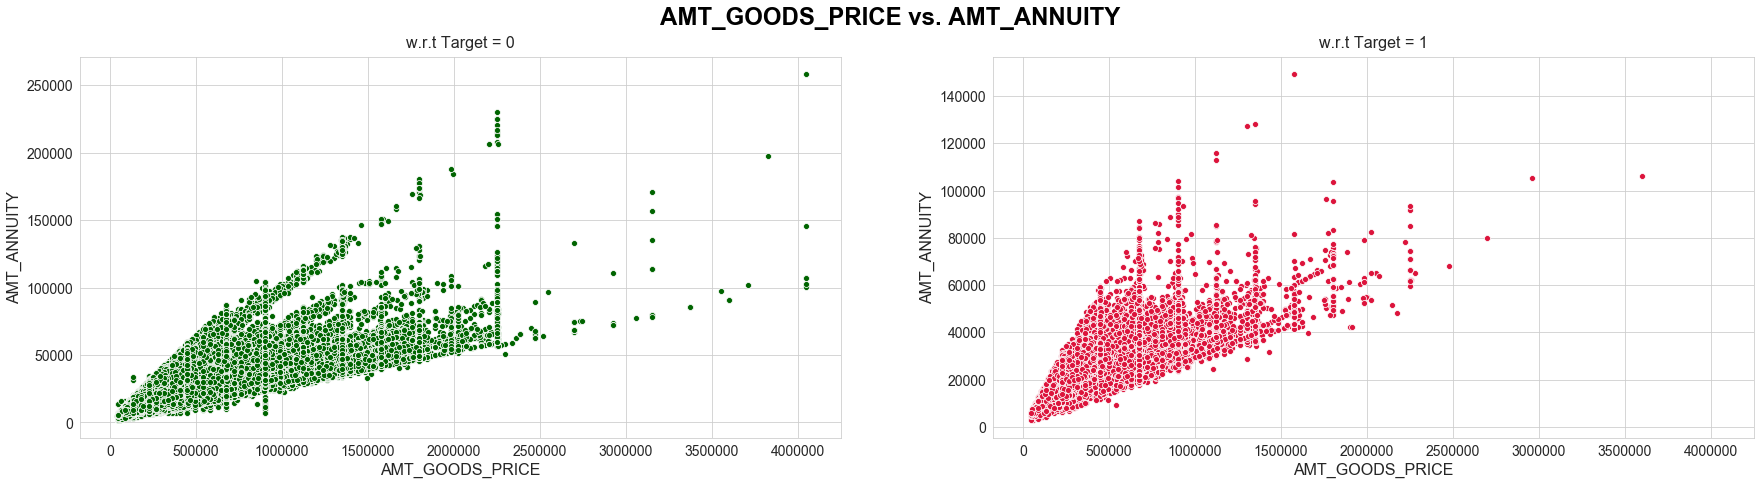

In [111]:
biv_num("AMT_GOODS_PRICE","AMT_ANNUITY",(30,7))

- ***`there is a positive correlation betweeen these variables.`***
- ***`This means that, as the annuity increases, goods price also increases.`***

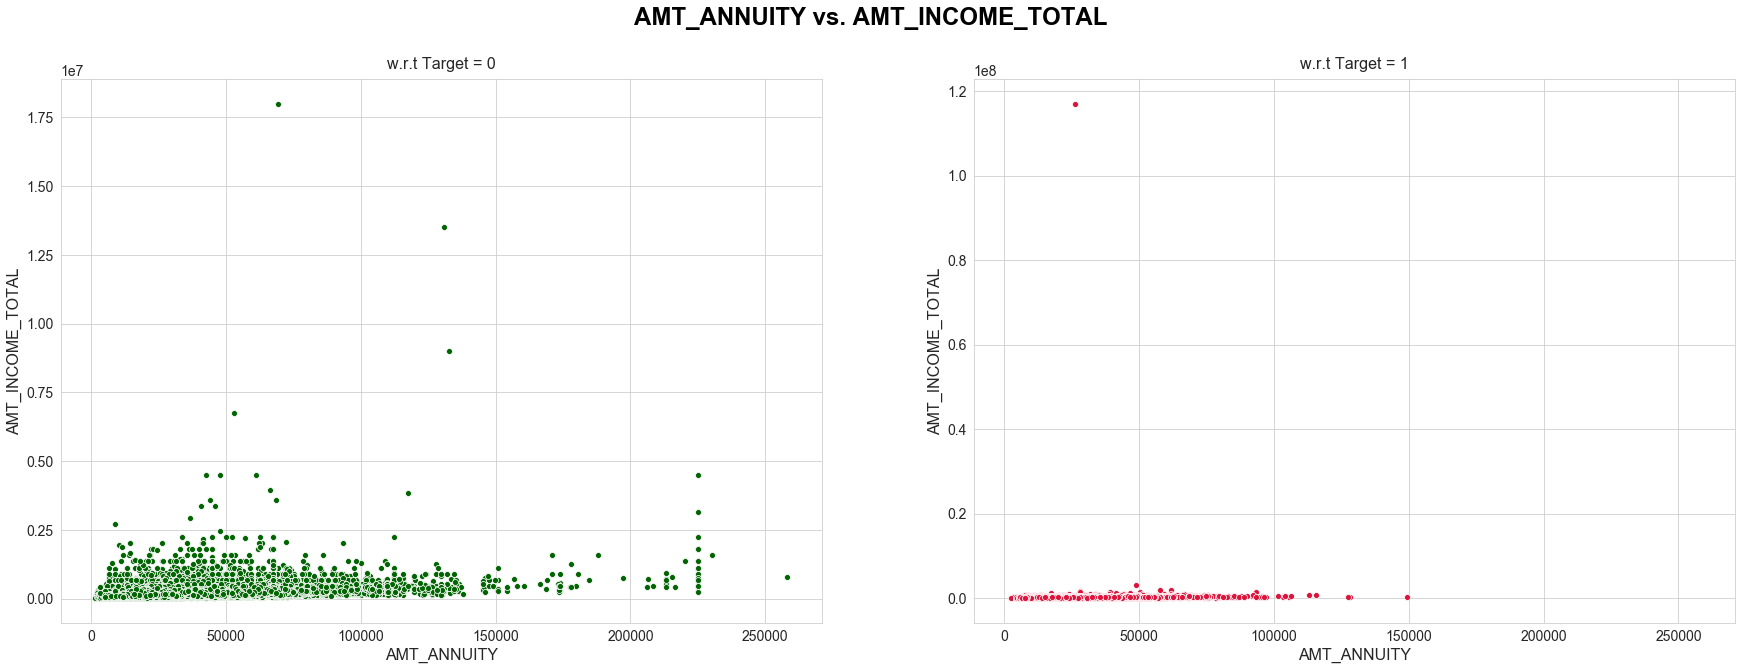

In [112]:
biv_num("AMT_ANNUITY","AMT_INCOME_TOTAL",(30,10))

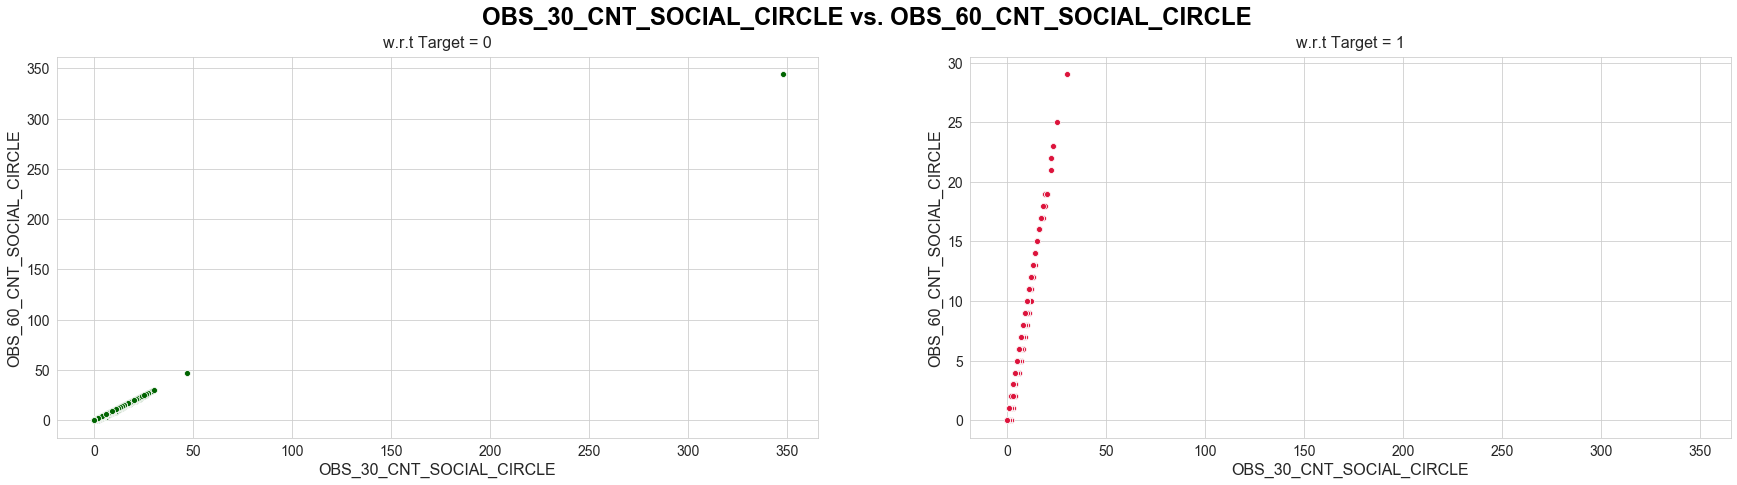

In [113]:
biv_num("OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",(30,7))

- ***`there is a positive correlation betweeen these variables.`***

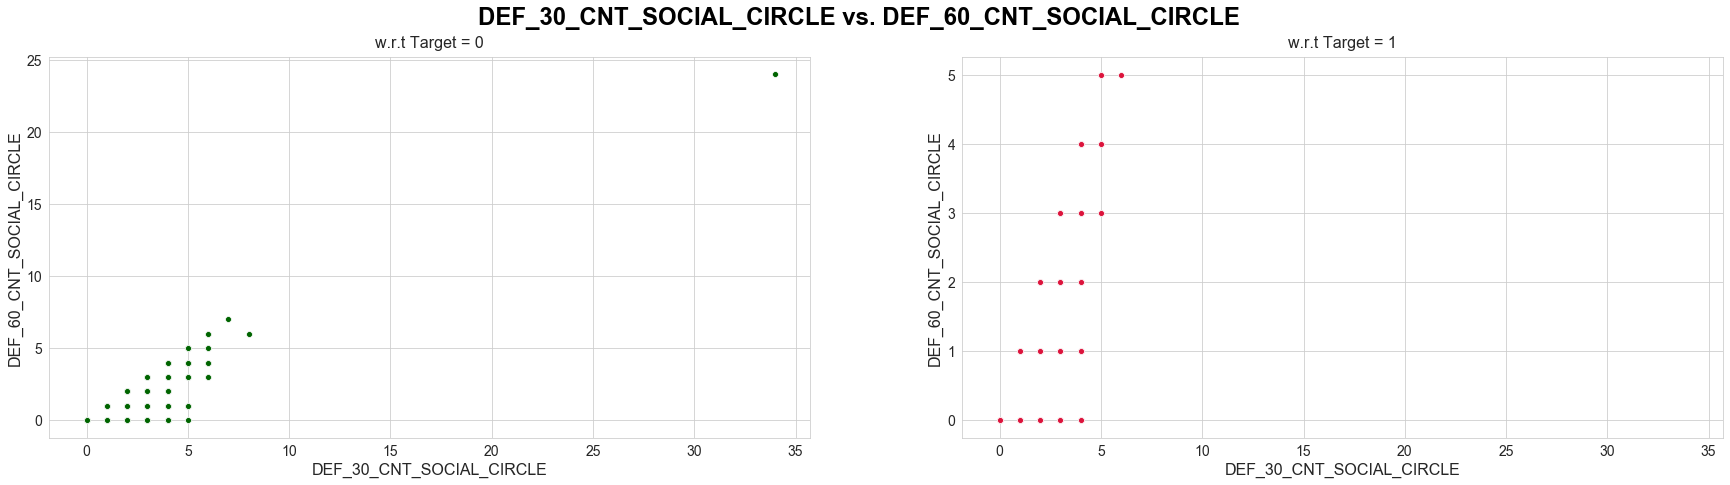

In [114]:
biv_num("DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE",(30,7))

- ***`there is a positive correlation betweeen these variables.`***

#### Bi-variate - Categorical to Continous

In [115]:
def biv_cate_cont(x_col, y_col, fsize):
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=fsize)
    fig.suptitle(x_col + " vs. " + y_col, fontsize=24, weight='bold', color='black')
    
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['axes.titlepad'] = 15
    plt.rcParams['axes.titlesize'] = 24
    
    #--------------------------- target = 0 ---------------------------------
    
    ax[0].set_title("w.r.t Target = 0", fontsize=16)
    sns.boxplot(x=x_col, y=y_col, data=no_default, ax=ax[0])
    fig.show()
    
    #--------------------------- target = 1 ---------------------------------
    
    ax[1].set_title("w.r.t Target = 1", fontsize=16)
    sns.boxplot(x=x_col, y=y_col, data=default, ax=ax[1])
    fig.show()

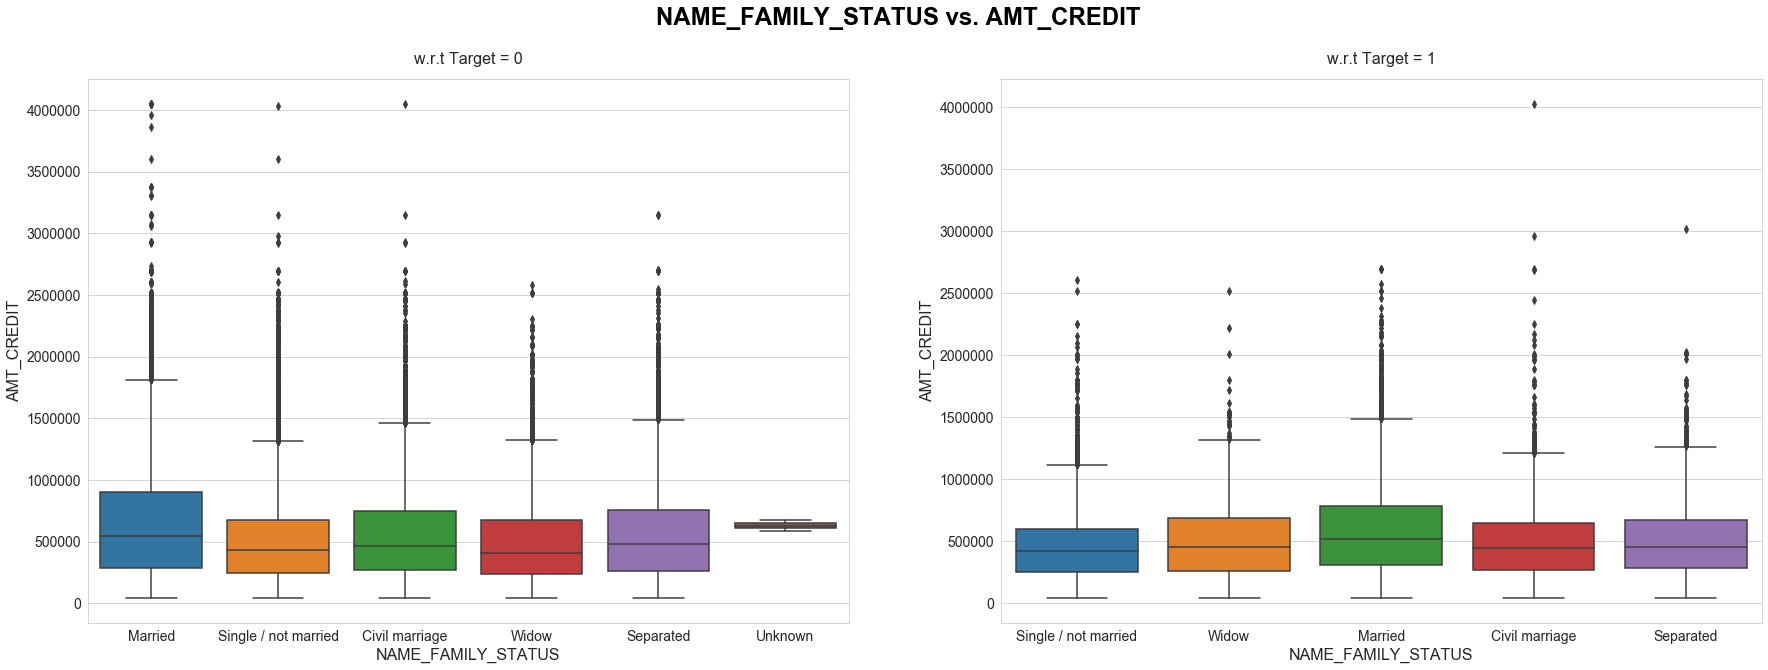

In [116]:
biv_cate_cont('NAME_FAMILY_STATUS','AMT_CREDIT',(30,10))

- ***`In both dataset, it can be observed that, 'Married' category has the highest count of credits.`***

***`TARGET = 0`*** 
   - Highest median is for 'Married' category..
   - lowest credit median in this category is for the 'Unknown'.
   - Maximum credit value is in 'Civil Marriage', 'SIngle / Not Married' and 'Marriage' category; with a value above 4000000 [40L]
   
***`TARGET = 1`*** 
   - Highest median is for 'Married' category.
   - lowest credit median in this category is for the 'Single / not married'.
   - Maximum credit value is in 'Civil Marriage'; with a value above 4000000 [40L]

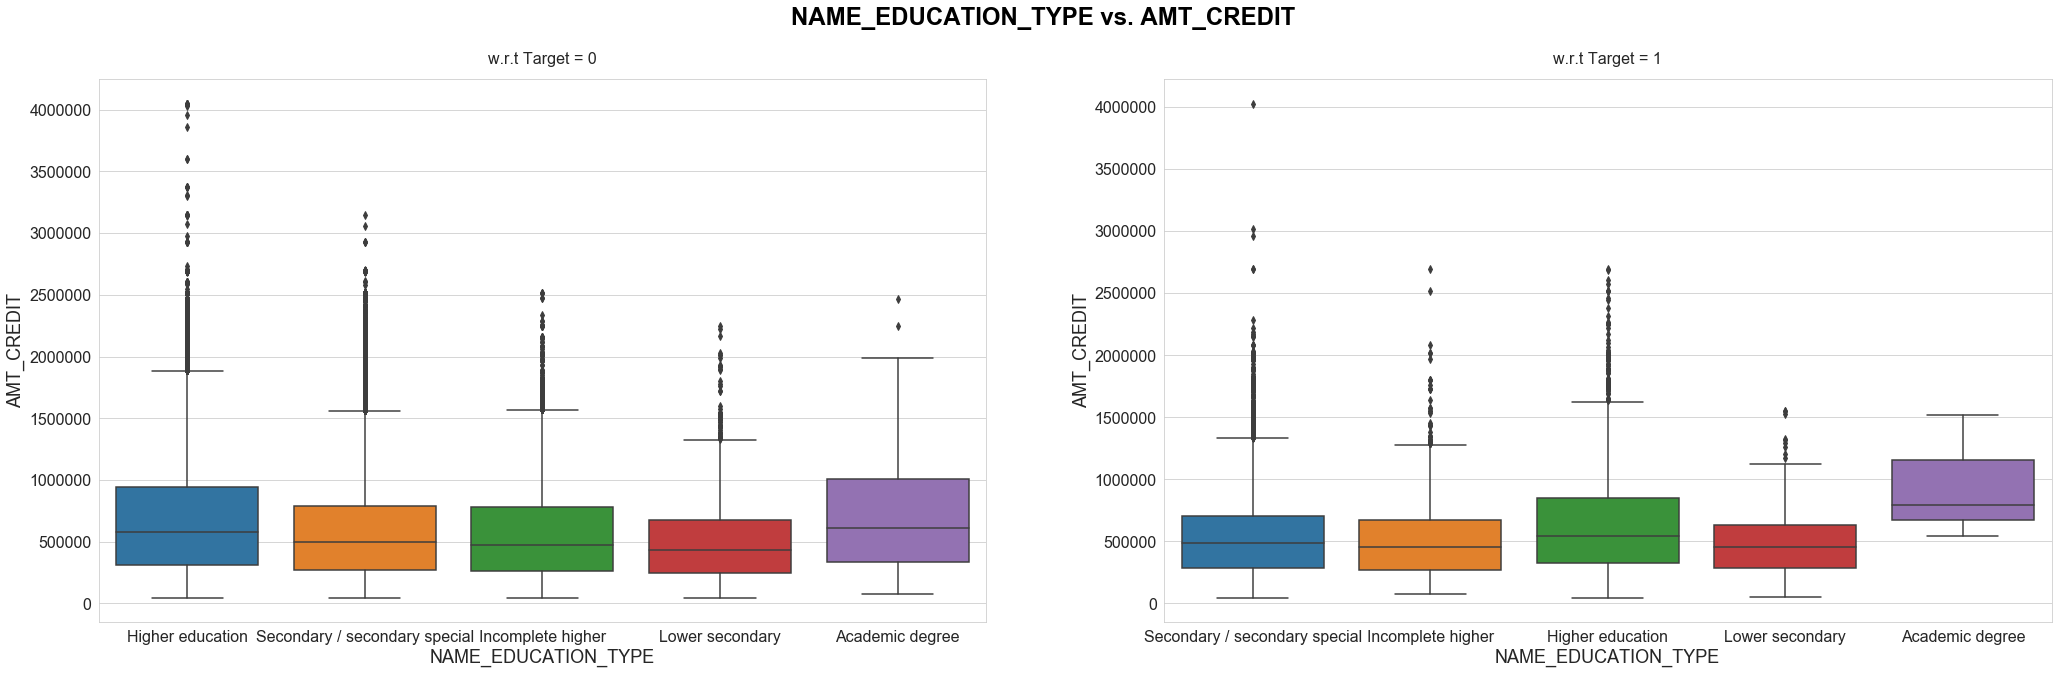

In [117]:
biv_cate_cont('NAME_EDUCATION_TYPE','AMT_CREDIT',(35,10))

- ***`In both dataset, it can be observed that, highest count of credits are in Secondary / Secondary special category.`***

***`TARGET = 0`*** 
   - Highest credit median is for 'Academic degree' category.
   - lowest credit median in this category is for the 'Lower Secondary'.
   - Maximum credit value is in 'Higher education' category; with a value above 4000000 [40L]
   
***`TARGET = 1`*** 
   - Highest median is for  'Academic degree' category and no presence of outliers
   - lowest credit meadian in this category is for the 'Lower Secondary' and 'Incomplete higher'.
   - Maximum credit value is in Secondary / Secondary special' category; with a value above 4000000 [40L]

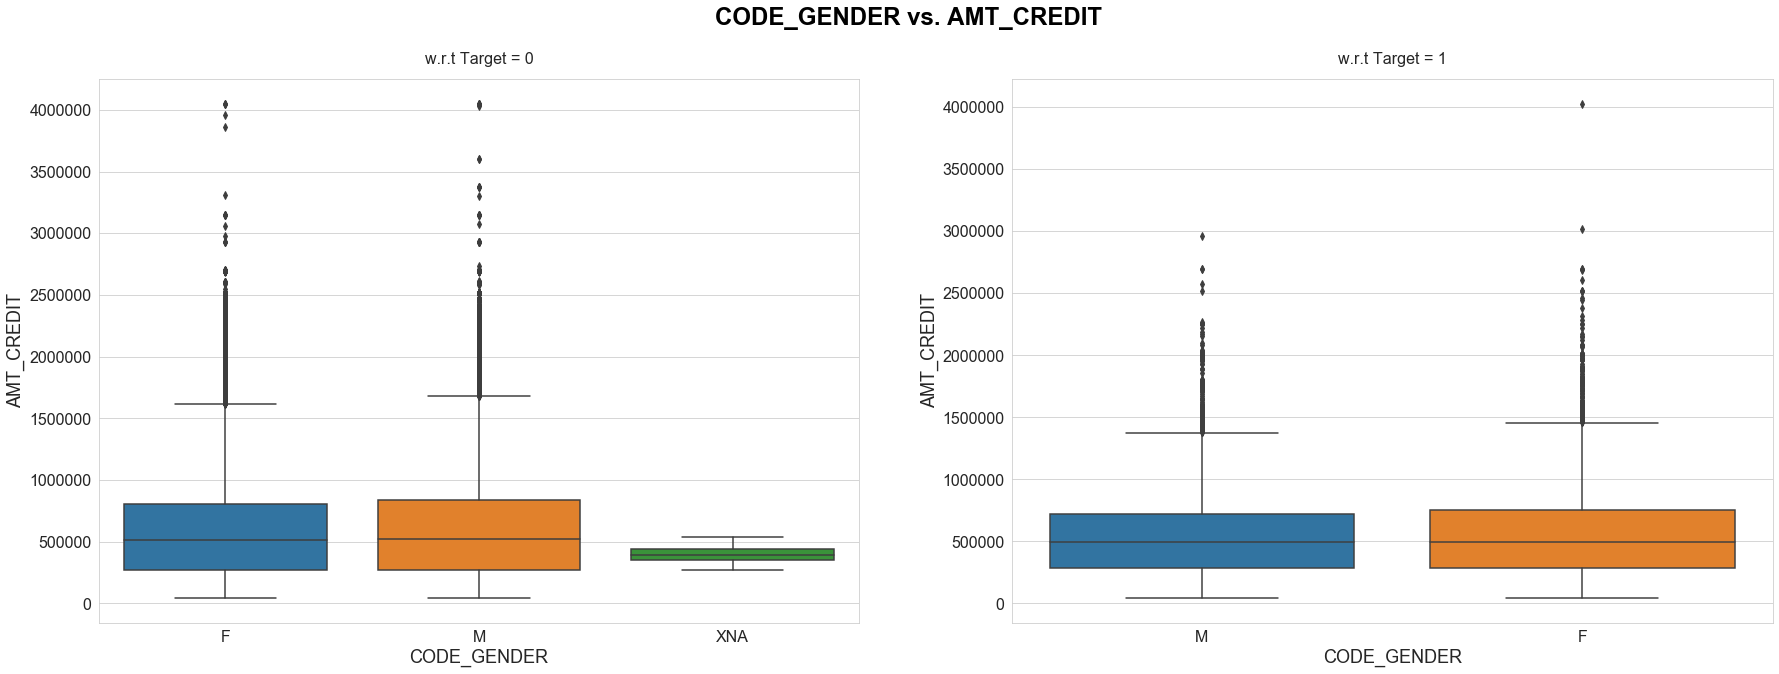

In [118]:
biv_cate_cont('CODE_GENDER','AMT_CREDIT',(30,10))

- ***`In both dataset, it can be observed that, Female groups have the highest count of credit applications.`***

***`TARGET = 0`*** 
   - Highest credit median is for 'Male' category.
   - lowest credit median in this category is for 'XNA'
   - Maximum credit value is for both 'Male' and 'Female' group; with a value above 4000000 [40L]
   
***`TARGET = 1`*** 
   - Highest median is for  'Female' category.
   - lowest credit median in this category is for 'Male'
   - Maximum credit value is in 'Female' category; with a value above 4000000 [40L]

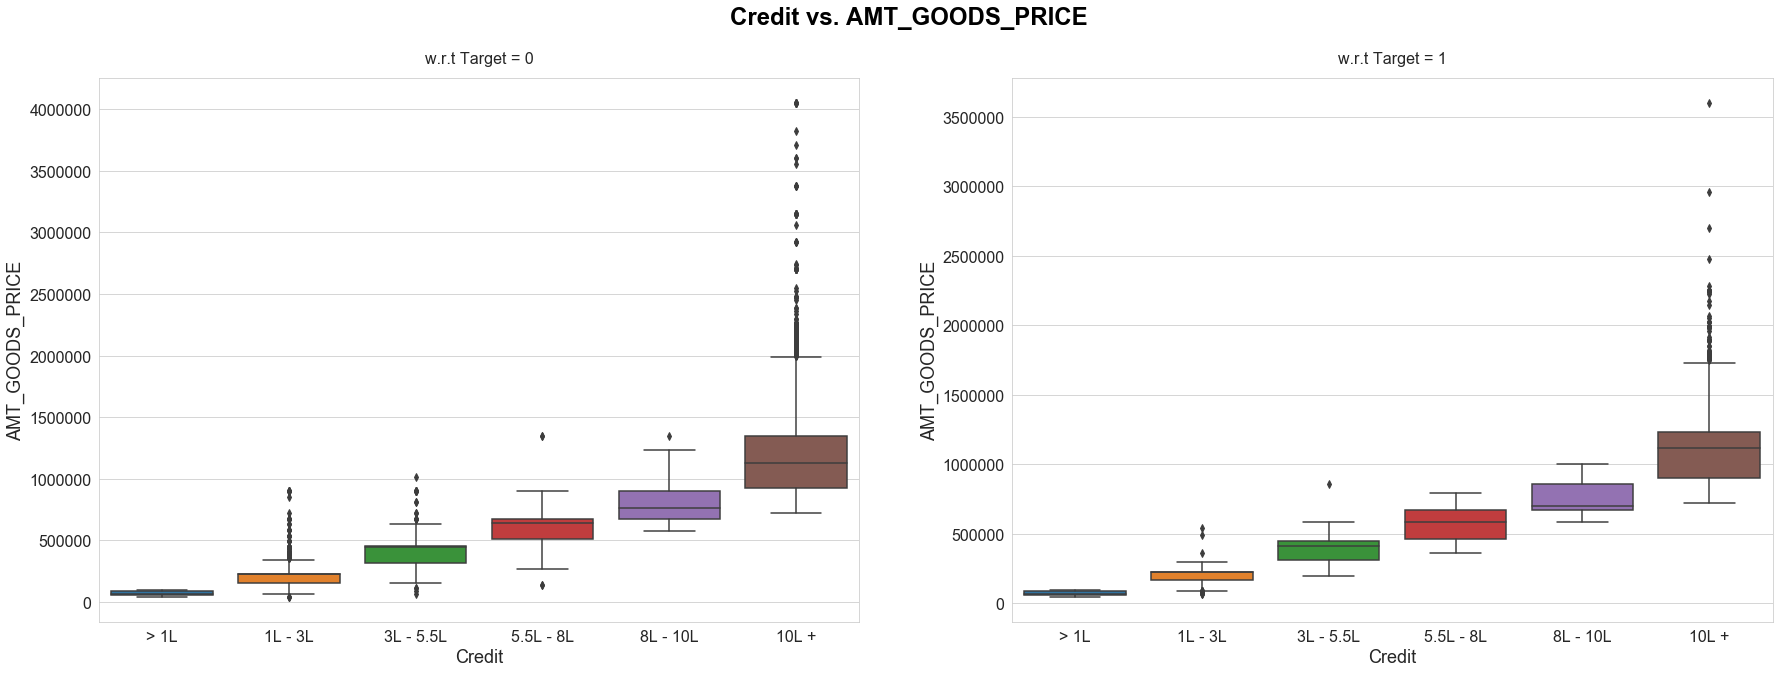

In [119]:
biv_cate_cont('Credit','AMT_GOODS_PRICE',(30,10))

- ***`In both dataset, it can be observed that, as the credit value increases, Goods price also increases.`***

***`TARGET = 0`*** 
   - highest count of Goods Price are for credit range 3L to 5.5L
   - lowest Goods Price median in this category is for '> 1L'
   - highest Goods Price median in this category is for '10L+'
   - Maximum Goods Price value is for '10L+' group; with a value above 4000000 [40L]
   
***`TARGET = 1`*** 
   - highest count of Goods Price are for credit range 3L to 5.5L
   - lowest Goods Price median in this category is for '> 1L'
   - highest Goods Price median in this category is for '10L+'
   - Maximum Goods Price value is for '10L+' group; with a value at 3600000 [36L]

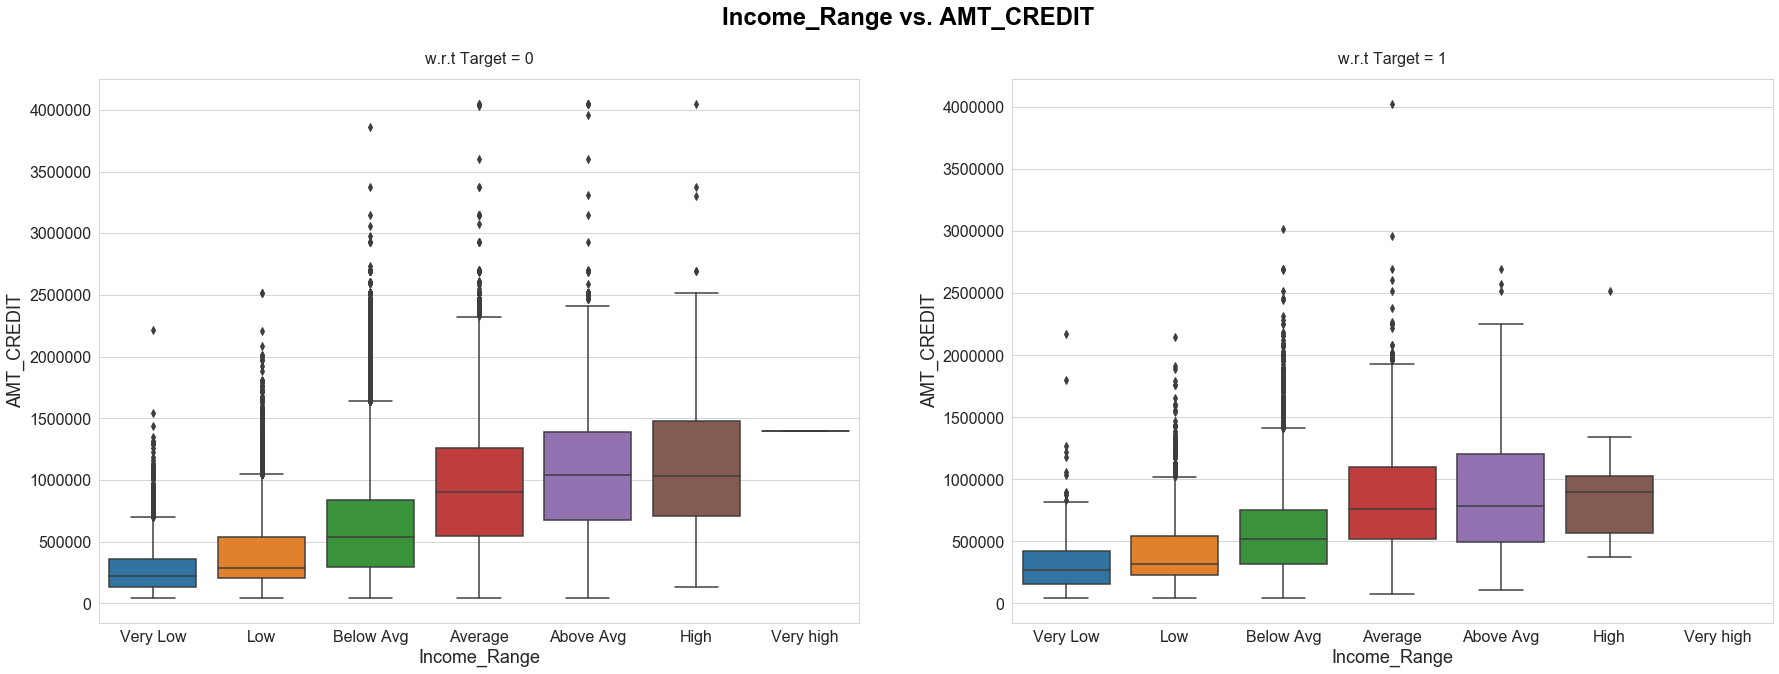

In [120]:
biv_cate_cont('Income_Range','AMT_CREDIT',(30,10))

- ***`In both dataset, it can be observed that, as the income increases, amount applied for credit also increases.`***

***`TARGET = 0`*** 
   - highest count of credit applications are under 'Below Average' Income range
   - There is one value in Very high category at around 1400000 [ 14L ]
   - lowest median in this category is for 'very low' Income_Range.
   - Highest (max) credit value is in 'Average', 'Above Average' and 'High' category; with a value above 4000000 [40L]
   
***`TARGET = 1`*** 
   - highest count of credit applications are under 'Below Average' Income range
   - Highest median is for 'High' category.
   - lowest median in this category is for 'very low' Income_Range.
   - highest (max) credit value is in 'Average' Income range; with a value of above 4000000 [40L]

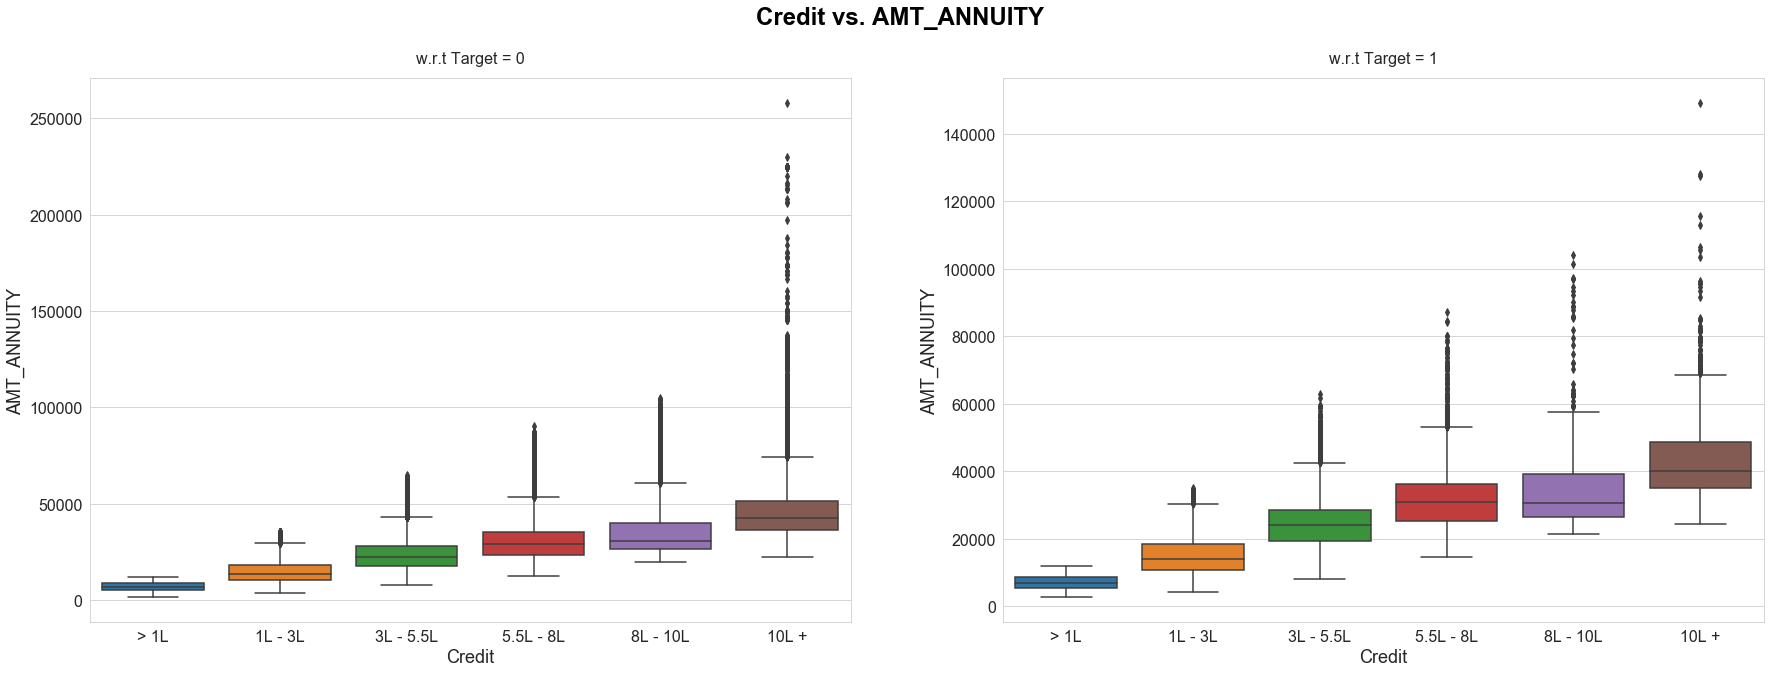

In [121]:
biv_cate_cont('Credit','AMT_ANNUITY',(30,10))

- ***`In both dataset, it can be observed that, as the credit increases, annuity also increases.`***

***`TARGET = 0`*** 
   - highest count of Annuity are for credit range 1L - 3L
   - lowest Annuity median in this category is for '> 1L'
   - highest Annuity median in this category is for '10L+'
   - Maximum Annuity value is for '10L+' group; with a value above 200000 [2L]
   
***`TARGET = 1`*** 
   - highest count of Annuity are for credit range '3L - 5.5L'
   - lowest Annuity median in this category is for '> 1L'
   - highest Annuity median in this category is for '10L+'
   - Maximum Annuity value is for '10L+' group; with a value above 140000 [1.4L]

#### Multi-variate Analysis - Heatmap

**TARGET = 0**

In [122]:
tar0 = no_default.iloc[:,1:].corr() #taking columns except TARGET

top10_0 = tar0.unstack().sort_values(ascending=False).drop_duplicates()[1:11] #top 10 correlated variables

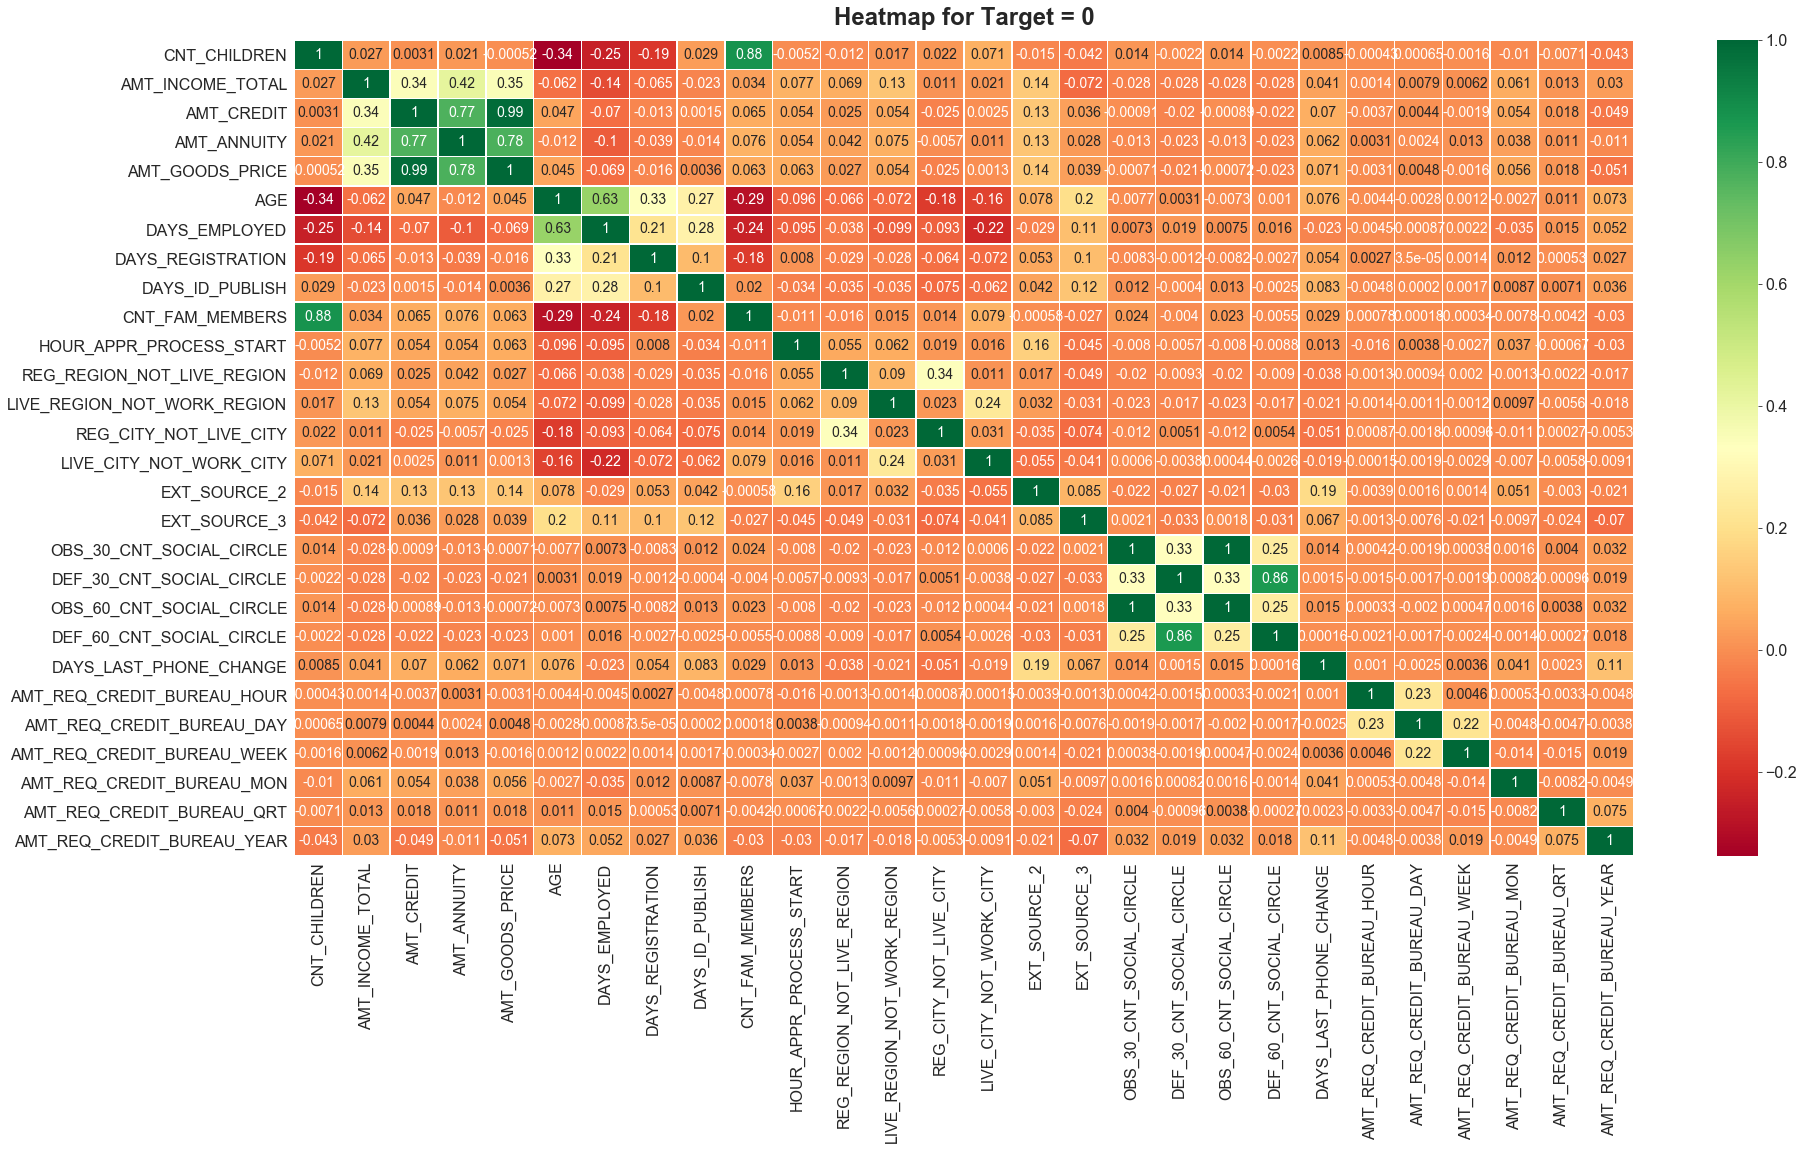

Top 10 correlations in Target = 0 data set: 
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE   0.9985
AMT_CREDIT                AMT_GOODS_PRICE            0.9873
CNT_FAM_MEMBERS           CNT_CHILDREN               0.8786
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE   0.8593
AMT_GOODS_PRICE           AMT_ANNUITY                0.7767
AMT_ANNUITY               AMT_CREDIT                 0.7713
DAYS_EMPLOYED             AGE                        0.6260
AMT_ANNUITY               AMT_INCOME_TOTAL           0.4190
AMT_GOODS_PRICE           AMT_INCOME_TOTAL           0.3495
AMT_CREDIT                AMT_INCOME_TOTAL           0.3428
dtype: float64


In [123]:

plt.figure(figsize=(30,15))
plt.title("Heatmap for Target = 0", weight='bold')
sns.heatmap(tar0, cmap='RdYlGn', annot=True, annot_kws={"size":14}, linewidth=0.5)
plt.show()

print("Top 10 correlations in Target = 0 data set: ")
print(top10_0)

**TARGET = 1**

In [124]:
tar1 = default.iloc[:,1:].corr() #taking columns except TARGET

In [125]:
top10_1 = tar1.unstack().sort_values(ascending=False).drop_duplicates()[1:11] #top 10 correlated variables

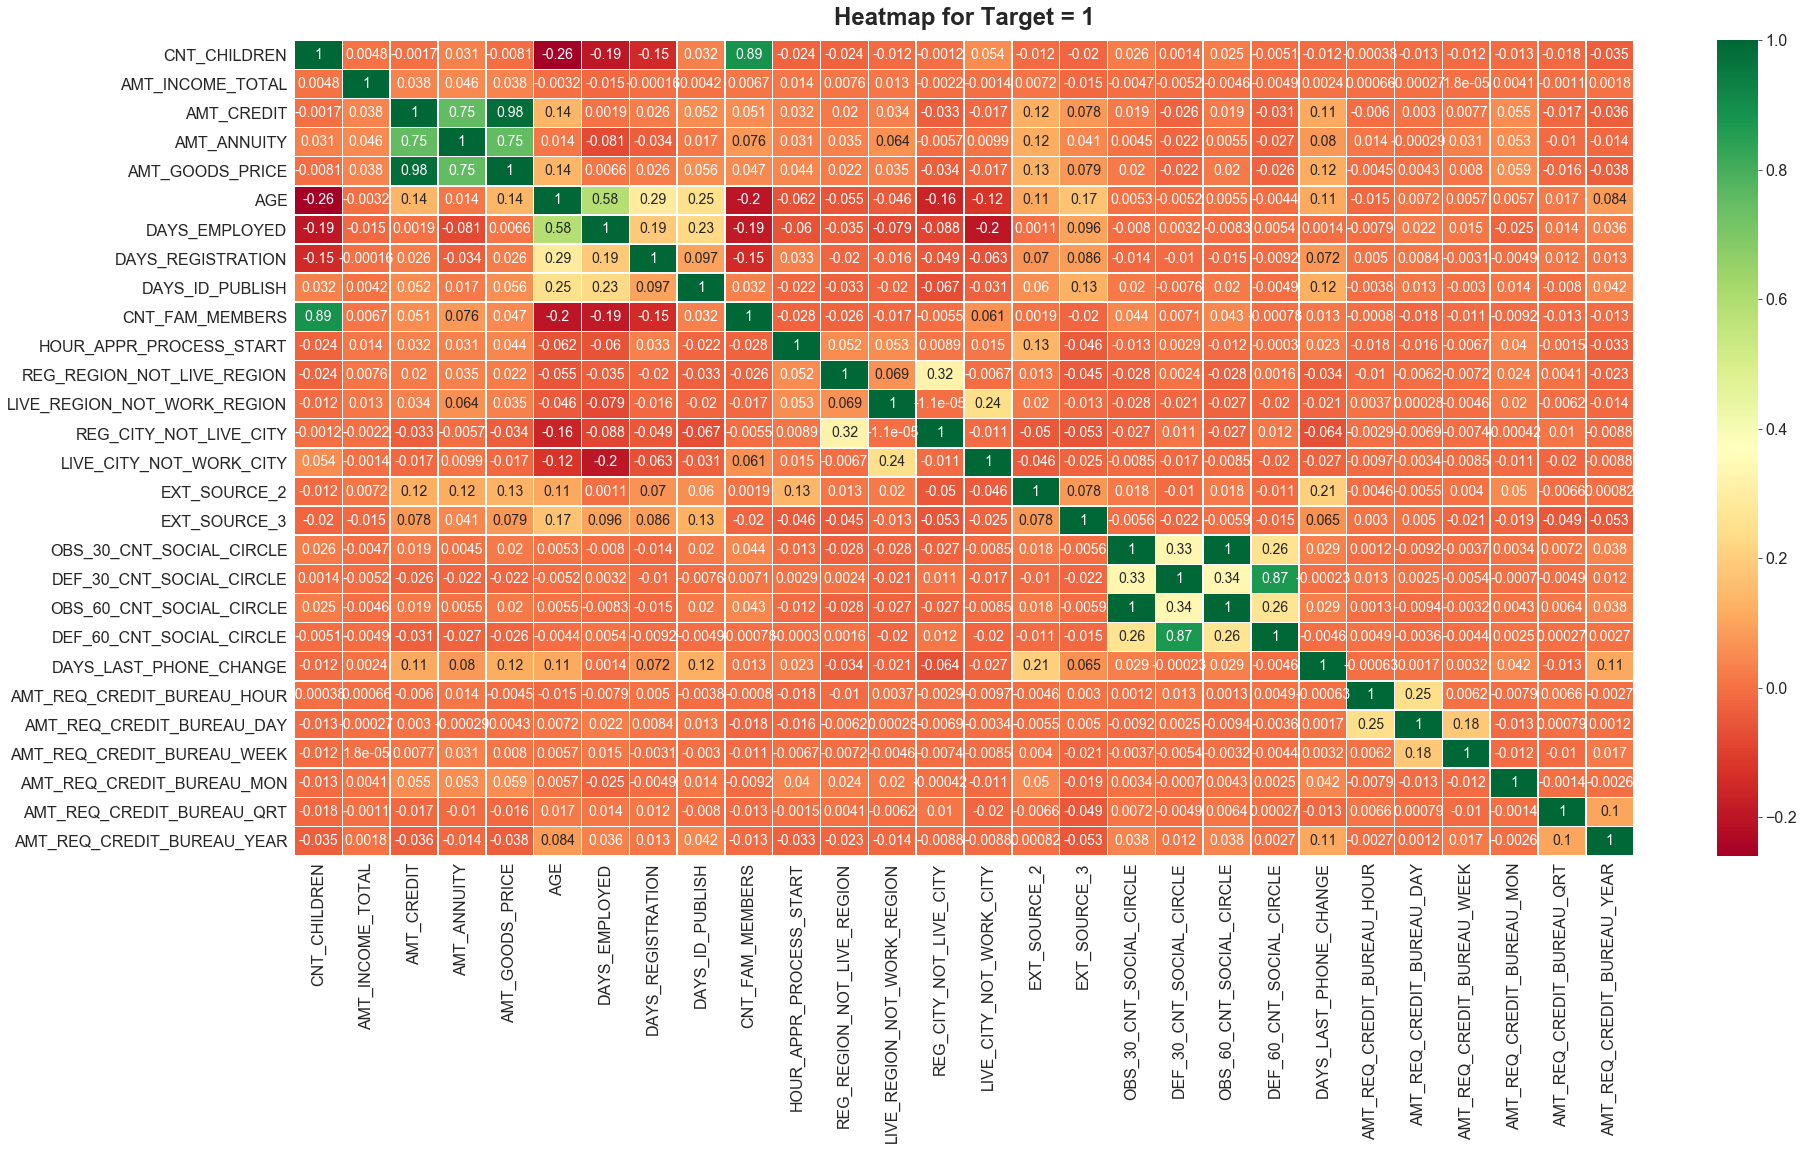

Top 10 correlations in Target = 1 data set: 
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE   0.9983
AMT_GOODS_PRICE             AMT_CREDIT                 0.9831
CNT_FAM_MEMBERS             CNT_CHILDREN               0.8855
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE   0.8690
AMT_ANNUITY                 AMT_GOODS_PRICE            0.7527
                            AMT_CREDIT                 0.7522
AGE                         DAYS_EMPLOYED              0.5824
DEF_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE   0.3372
                            OBS_30_CNT_SOCIAL_CIRCLE   0.3338
REG_REGION_NOT_LIVE_REGION  REG_CITY_NOT_LIVE_CITY     0.3226
dtype: float64


In [126]:

plt.figure(figsize=(30,15))
plt.title("Heatmap for Target = 1", weight='bold')
sns.heatmap(tar1, cmap='RdYlGn', annot=True, annot_kws={"size":14}, linewidth=0.5)
plt.show()

print("Top 10 correlations in Target = 1 data set: ")
print(top10_1)

### INSIGHTS

1. 51 - 60 age group are highest in number for non-defaulters. 
2. 3L to 5.5L credit range have defaulted more whereas 1 - 3L range has the highest count in non-defaulters.
3. More defaulters belong to the 'Female' category 
4. Males in 'Average income' type category have defaulted more compared to the females in the same category.
5. Defaulters  lies more in Secondary / Secondary special Education Type'. 'Incomplete higher’ category group is the highest in non-defaulters 
6. Customers who own realty tend to default more

## Analysis on Previous Application dataset

***Reading the file to the dataframe 'prev'***

In [127]:
prev = pd.read_csv("previous_application.csv")

In [128]:
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300       17145.0000   
1     2802425      108129         Cash loans   25188.6150      607500.0000   
2     2523466      122040         Cash loans   15060.7350      112500.0000   
3     2819243      176158         Cash loans   47041.3350      450000.0000   
4     1784265      202054         Cash loans   31924.3950      337500.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0000            0.0000       17145.0000                   SATURDAY   
1 679671.0000               nan      607500.0000                   THURSDAY   
2 136444.5000               nan      112500.0000                    TUESDAY   
3 470790.0000               nan      450000.0000                     MONDAY   
4 404055.0000               nan      337500.0000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1             0.0000                 0.1828   
1                       1                nan                    nan   
2                       1                nan                    nan   
3                       1                nan                    nan   
4                       1                nan                    nan   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                    0.8673                    XAP             Approved   
1                       nan                    XNA             Approved   
2                       nan                    XNA             Approved   
3                       nan                    XNA             Approved   
4                       nan                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0      12.0000           middle  POS mobile with interest         365243.0000   
1      36.0000       low_action          Cash X-Sell: low         365243.0000   
2      12.0000             high         Cash X-Sell: high         365243.0000   
3      12.0000           middle       Cash X-Sell: middle         365243.0000   
4      24.0000             high         Cash Street: high                 nan   

   D

In [129]:

#number of rows and columns --> 1670214 rows and 37 columns

prev.shape

(1670214, 37)

- 1670214 rows and 37 columns

In [130]:

#checking the datatypes of columns

prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [131]:

#summary of numeric columns

prev.describe()

SK_ID_PREV   SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION   AMT_CREDIT  \
count 1670214.0000 1670214.0000 1297979.0000     1670214.0000 1670213.0000   
mean  1923089.1353  278357.1741   15955.1207      175233.8604  196114.0212   
std    532597.9587  102814.8238   14782.1373      292779.7624  318574.6165   
min   1000001.0000  100001.0000       0.0000           0.0000       0.0000   
25%   1461857.2500  189329.0000    6321.7800       18720.0000   24160.5000   
50%   1923110.5000  278714.5000   11250.0000       71046.0000   80541.0000   
75%   2384279.7500  367514.0000   20658.4200      180360.0000  216418.5000   
max   2845382.0000  456255.0000  418058.1450     6905160.0000 6905160.0000   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count       774370.0000     1284699.0000             1670214.0000   
mean          6697.4021      227847.2793                  12.4842   
std          20921.4954      315396.5579                   3.3340   
min             -0.9000           0.0000                   0.0000   
25%              0.0000       50841.0000                  10.0000   
50%           1638.0000      112320.0000                  12.0000   
75%           7740.0000      234000.0000                  15.0000   
max        3060045.0000     6905160.0000                  23.0000   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count            1670214.0000        774370.0000              5951.0000   
mean                   0.9965             0.0796                 0.1884   
std                    0.0593             0.1078                 0.0877   
min                    0.0000            -0.0000                 0.0348   
25%                    1.0000             0.0000                 0.1607   
50%                    1.0000             0.0516                 0.1891   
75%                    1.0000             0.1089                 0.1933   
max                    1.0000             1.0000                 1.0000   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                 5951.0000   1670214.0000      1670214.0000 1297984.0000   
mean                     0.7735      -880.6797          313.9511      16.0541   
std                      0.1009       779.0997         7127.4435      14.5673   
min                      0.3732     -2922.0000           -1.0000       0.0000   
25%                      0.7156     -1300.0000           -1.0000       6.0000   
50%                      0.8351      -581.0000            3.0000      12.0000   
75%                      0.8525      -280.0000           82.0000      24.0000   
max                      1.0000        -1.0000      4000000.0000      84.0000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count         997149.0000     997149.0000                997149.0000   
mean          342209.8550      13826.2693                 33767.7741   
std            88916.1158      72444.8697                106857.0348   
min            -2922.0000      -2892.0000                 -2801.0000   
25%           365243.0000      -1628.0000                 -1242.0000   
50%           365243.0000       -831.0000                  -361.0000   
75%           365243.0000       -411.0000                   129.0000   
max           365243.0000     365243.0000                365243.0000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count    997149.0000       997149.0000                997149.0000  
mean      76582.4031        81992.3438                     0.3326  
std      149647.4151       153303.5167                     0.4711  
min       -2889.0000        -2874.0000                     0.0000  
25%       -1314.0000        -1270.0000                     0.0000  
50%        -537.0000         -499.0000                     0.0000  
75%         -74.0000          -44.0000                     1.0000  
max      365243.0000       365243.0000                     1.0000

- statistical description of all numeric columns are shown above. Some columns like AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT etc. show the presence of outliers as the 75th percentile and max value have huge difference.

In [132]:

#find precentage of missing values

miss = 100*(prev.isnull().sum()/len(prev))

miss

SK_ID_PREV                     0.0000
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
AMT_ANNUITY                   22.2867
AMT_APPLICATION                0.0000
AMT_CREDIT                     0.0001
AMT_DOWN_PAYMENT              53.6365
AMT_GOODS_PRICE               23.0818
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
RATE_DOWN_PAYMENT             53.6365
RATE_INTEREST_PRIMARY         99.6437
RATE_INTEREST_PRIVILEGED      99.6437
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISION                  0.0000
NAME_PAYMENT_TYPE              0.0000
CODE_REJECT_REASON             0.0000
NAME_TYPE_SUITE               49.1198
NAME_CLIENT_TYPE               0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_PORTFOLIO                 0.0000
NAME_PRODUCT_TYPE              0.0000
CHANNEL_TYPE                   0.0000
SELLERPLACE_

**`Below are the columns with null values and its percentages:`**
1. AMT_ANNUITY --->                   22.29
2. AMT_DOWN_PAYMENT --->              53.64
3. AMT_GOODS_PRICE --->               23.08
4. RATE_DOWN_PAYMENT --->             53.64
5. RATE_INTEREST_PRIMARY --->         99.64
6. RATE_INTEREST_PRIVILEGED --->      99.64
7. NAME_TYPE_SUITE --->               49.12
8. CNT_PAYMENT  --->                   22.29
9. PRODUCT_COMBINATION  --->            0.02
10. DAYS_FIRST_DRAWING --->           40.30
11. DAYS_FIRST_DUE --->               40.30
12. DAYS_LAST_DUE_1ST_VERSION --->     40.30
13. DAYS_LAST_DUE --->                 40.30
14. DAYS_TERMINATION --->              40.30
15. NFLAG_INSURED_ON_APPROVAL --->     40.30

****Deleting columns with more than 95% missing values****

In [133]:
n_50 = miss[miss.values >= 95] 

In [134]:
n_50

RATE_INTEREST_PRIMARY      99.6437
RATE_INTEREST_PRIVILEGED   99.6437
dtype: float64

In [135]:
prev.drop(labels=n_50.index, axis = 1, inplace = True)

***NAME_CONTRACT_STATUS is the target variable in this data set***

#### Univariate Analysis - Categorical

In [136]:
def uni_cate(col_name, fsize):
    
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['axes.titlepad'] = 15
    plt.rcParams['axes.titlesize'] = 18
    
    #-------------------------------- PLOT -----------------------------
    
    plt.figure(figsize=fsize)
    plt.title("Count plot for " +col_name)
    plt.xlabel("COUNT", size=14)
    plt.ylabel(col_name, size=14)
    sns.countplot(y=col_name, data=prev)  
    plt.show()
    
    print("Normalized counts: ")
    print(prev[col_name].value_counts(normalize=True))


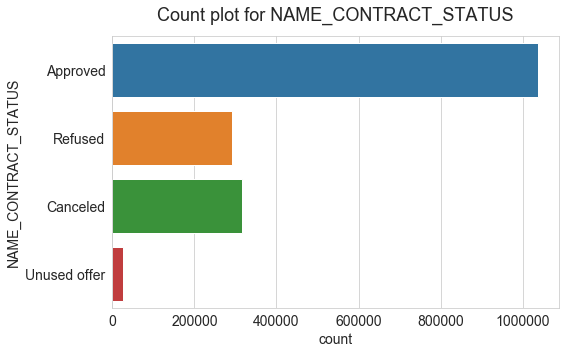

Normalized counts: 
Approved       0.6207
Canceled       0.1894
Refused        0.1740
Unused offer   0.0158
Name: NAME_CONTRACT_STATUS, dtype: float64


In [137]:
uni_cate('NAME_CONTRACT_STATUS',(8,5))

- **`Only a very less percentage of loans offer were unused`**

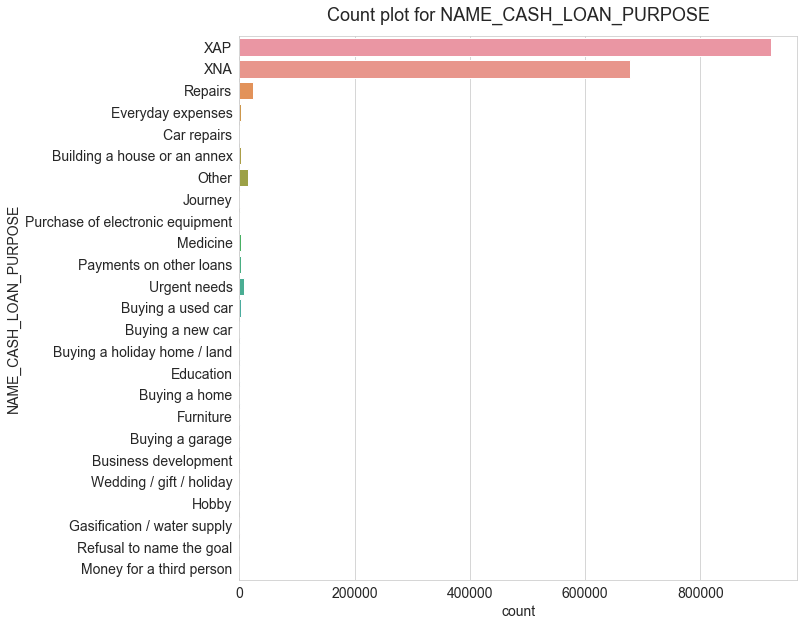

Normalized counts: 
XAP                                0.5524
XNA                                0.4059
Repairs                            0.0142
Other                              0.0093
Urgent needs                       0.0050
Buying a used car                  0.0017
Building a house or an annex       0.0016
Everyday expenses                  0.0014
Medicine                           0.0013
Payments on other loans            0.0012
Education                          0.0009
Journey                            0.0007
Purchase of electronic equipment   0.0006
Buying a new car                   0.0006
Wedding / gift / holiday           0.0006
Buying a home                      0.0005
Car repairs                        0.0005
Furniture                          0.0004
Buying a holiday home / land       0.0003
Business development               0.0003
Gasification / water supply        0.0002
Buying a garage                    0.0001
Hobby                              0.0000
Money for a th

In [138]:
uni_cate('NAME_CASH_LOAN_PURPOSE',(10,10))

- **`More count of loan_purpose falls under 'Repair' Category after excluding the not mentioned category type like 'XNA/XAP`**

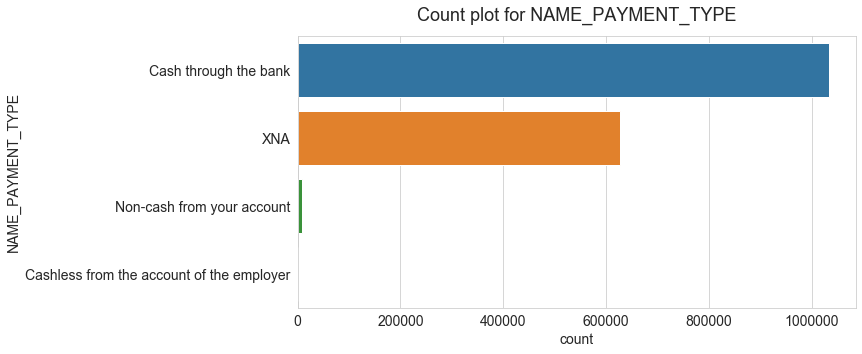

Normalized counts: 
Cash through the bank                       0.6188
XNA                                         0.3756
Non-cash from your account                  0.0049
Cashless from the account of the employer   0.0006
Name: NAME_PAYMENT_TYPE, dtype: float64


In [139]:
uni_cate('NAME_PAYMENT_TYPE',(10,5))

- **`Most of the payments on previous application has been carried out by 'Cash through the bank' type`**

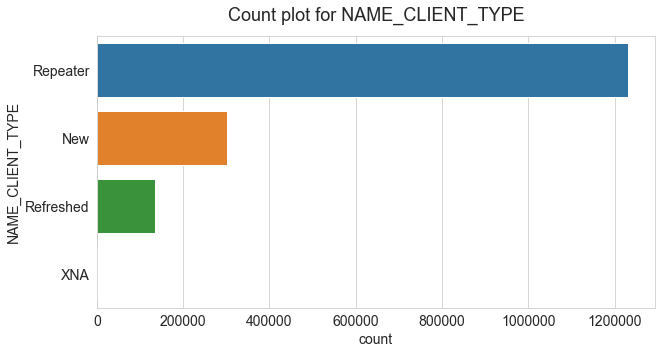

Normalized counts: 
Repeater    0.7372
New         0.1804
Refreshed   0.0812
XNA         0.0012
Name: NAME_CLIENT_TYPE, dtype: float64


In [140]:
uni_cate('NAME_CLIENT_TYPE',(10,5))

- **`Repeater' client type have applied for the maximum number of loans`**

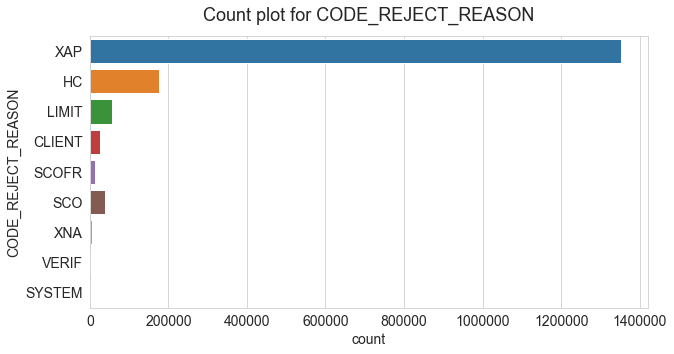

Normalized counts: 
XAP      0.8101
HC       0.1049
LIMIT    0.0333
SCO      0.0224
CLIENT   0.0158
SCOFR    0.0077
XNA      0.0031
VERIF    0.0021
SYSTEM   0.0004
Name: CODE_REJECT_REASON, dtype: float64


In [141]:
uni_cate('CODE_REJECT_REASON',(10,5))

- **`HC' code reject reason is the most prominent reason after excluding the not mentioned reason type 'XAP'`**

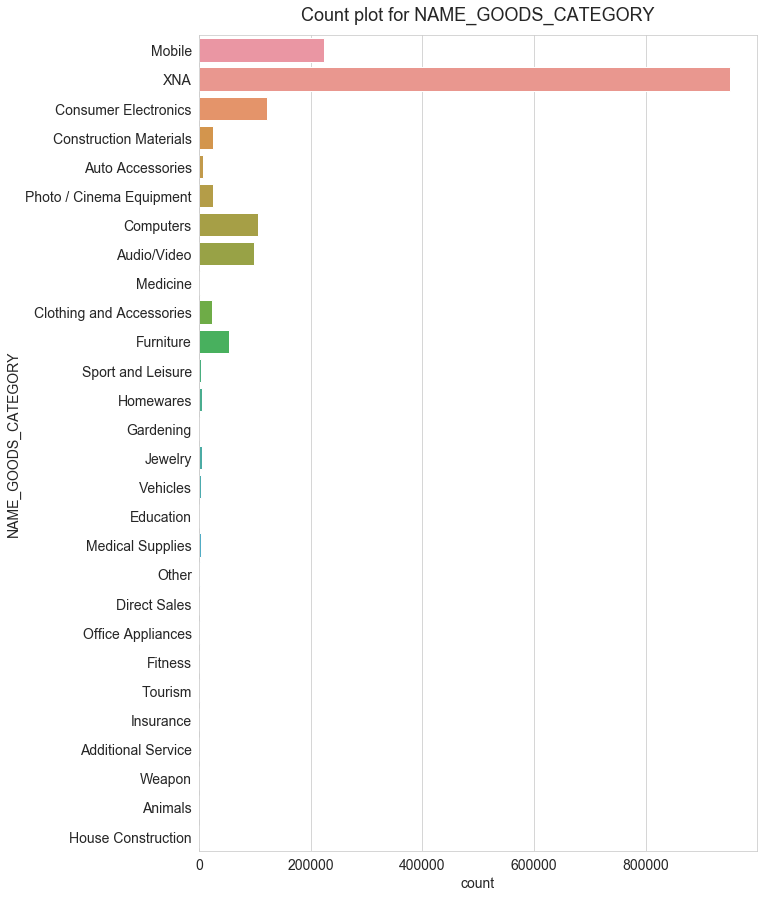

Normalized counts: 
XNA                        0.5693
Mobile                     0.1345
Consumer Electronics       0.0728
Computers                  0.0633
Audio/Video                0.0595
Furniture                  0.0321
Photo / Cinema Equipment   0.0150
Construction Materials     0.0150
Clothing and Accessories   0.0141
Auto Accessories           0.0044
Jewelry                    0.0038
Homewares                  0.0030
Medical Supplies           0.0023
Vehicles                   0.0020
Sport and Leisure          0.0018
Gardening                  0.0016
Other                      0.0015
Office Appliances          0.0014
Tourism                    0.0010
Medicine                   0.0009
Direct Sales               0.0003
Fitness                    0.0001
Additional Service         0.0001
Education                  0.0001
Weapon                     0.0000
Insurance                  0.0000
House Construction         0.0000
Animals                    0.0000
Name: NAME_GOODS_CATEGORY, d

In [142]:
uni_cate('NAME_GOODS_CATEGORY',(10,15))

- **`Mobile' category has  the highest count for the good category that the client has applied followed by consumer electronics, after excluding the not invalid type 'XAP`**

#### Bivariate - Categorical to Categorical

In [143]:
def bi_cate(xcol, fsize):
    
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['axes.titlepad'] = 15
    plt.rcParams['axes.titlesize'] = 18
    
    #-------------------------------- PLOT -----------------------------
    
    plt.figure(figsize=fsize)
    plt.title("Count plot for " +xcol)
    plt.xlabel(xcol, size=14)
    plt.ylabel("COUNT", size=14)
    sns.countplot(x=xcol, hue='NAME_CONTRACT_STATUS', data=prev, palette=['forestgreen','crimson','indianred','gold'])  
    plt.show()
    
    print(prev.groupby(by='NAME_CONTRACT_STATUS')[xcol].value_counts(normalize=True))


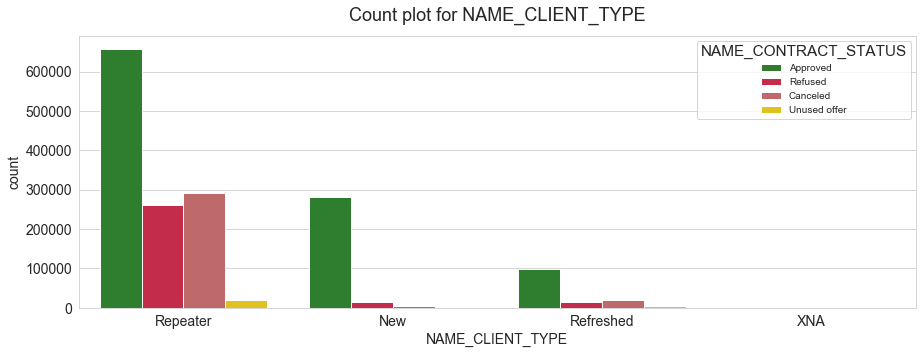

NAME_CONTRACT_STATUS  NAME_CLIENT_TYPE
Approved              Repeater           0.6345
                      New                0.2713
                      Refreshed          0.0937
                      XNA                0.0006
Canceled              Repeater           0.9239
                      Refreshed          0.0618
                      New                0.0112
                      XNA                0.0031
Refused               Repeater           0.8974
                      Refreshed          0.0517
                      New                0.0496
                      XNA                0.0012
Unused offer          Repeater           0.7688
                      Refreshed          0.1495
                      New                0.0804
                      XNA                0.0012
Name: NAME_CLIENT_TYPE, dtype: float64


In [144]:
bi_cate('NAME_CLIENT_TYPE',(15,5))

***`'Repeater' client type have a large count of 'Cancelled' loans whereas ' New' client type has the least.`***

***`Most of the approved loans fall under the 'Repeated' client type.`***

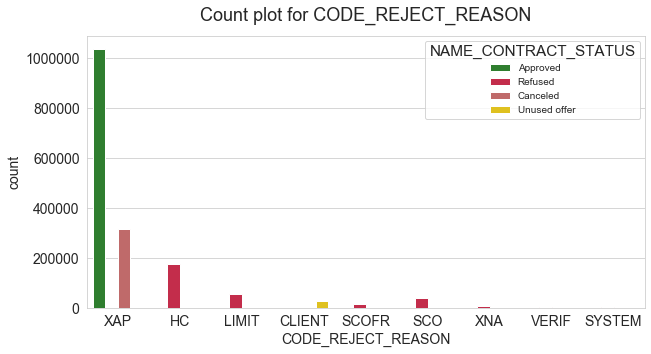

NAME_CONTRACT_STATUS  CODE_REJECT_REASON
Approved              XAP                  1.0000
                      XNA                  0.0000
Canceled              XAP                  1.0000
Refused               HC                   0.6028
                      LIMIT                0.1916
                      SCO                  0.1289
                      SCOFR                0.0441
                      XNA                  0.0180
                      VERIF                0.0122
                      SYSTEM               0.0025
                      XAP                  0.0000
Unused offer          CLIENT               1.0000
Name: CODE_REJECT_REASON, dtype: float64


In [145]:
bi_cate('CODE_REJECT_REASON',(10,5))

***`Most of the refused loans fall under 'HC' category followed by 'LIMIT'.`***

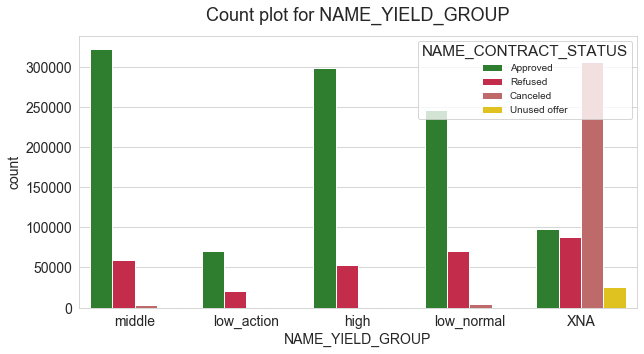

NAME_CONTRACT_STATUS  NAME_YIELD_GROUP
Approved              middle             0.3116
                      high               0.2884
                      low_normal         0.2373
                      XNA                0.0943
                      low_action         0.0684
Canceled              XNA                0.9683
                      low_normal         0.0153
                      middle             0.0103
                      high               0.0032
                      low_action         0.0030
Refused               XNA                0.3015
                      low_normal         0.2427
                      middle             0.2032
                      high               0.1832
                      low_action         0.0695
Unused offer          XNA                0.9656
                      low_normal         0.0247
                      middle             0.0070
                      high               0.0027
Name: NAME_YIELD_GROUP, dtype: float64


In [146]:
bi_cate('NAME_YIELD_GROUP',(10,5))

***`'XNA' or the not specified group have the maximum count of cancelled loans`***.

***`'Middle' interest group have the highest count of approved loans followed by 'High'.`***

***`'Low_action' group have the least count of 'Approved' as well as 'Refused' loans.`***

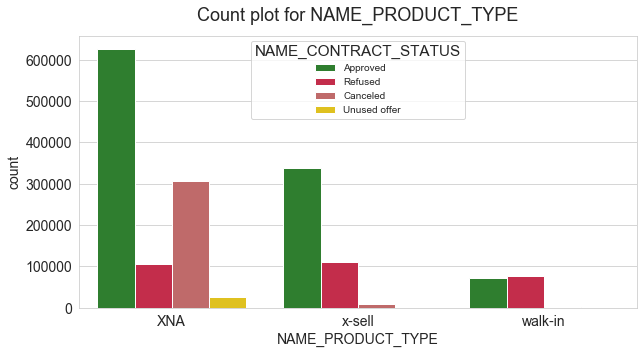

NAME_CONTRACT_STATUS  NAME_PRODUCT_TYPE
Approved              XNA                 0.6042
                      x-sell              0.3257
                      walk-in             0.0701
Canceled              XNA                 0.9675
                      x-sell              0.0267
                      walk-in             0.0059
Refused               x-sell              0.3791
                      XNA                 0.3603
                      walk-in             0.2606
Unused offer          XNA                 0.9999
                      x-sell              0.0001
Name: NAME_PRODUCT_TYPE, dtype: float64


In [147]:
bi_cate('NAME_PRODUCT_TYPE',(10,5))

***`excluding XNA,'X-sell' have the most count of 'Approved' loans `***

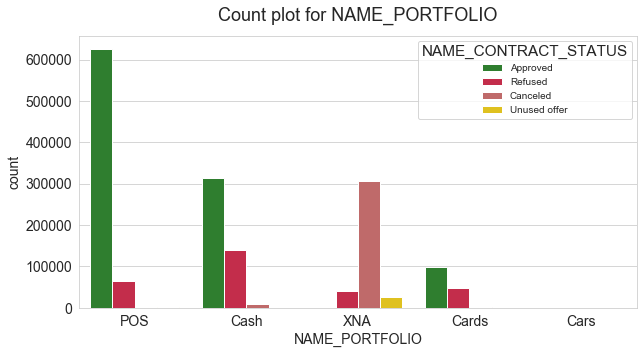

NAME_CONTRACT_STATUS  NAME_PORTFOLIO
Approved              POS              0.6040
                      Cash             0.3014
                      Cards            0.0943
                      Cars             0.0003
                      XNA              0.0000
Canceled              XNA              0.9668
                      Cash             0.0311
                      Cards            0.0015
                      POS              0.0006
                      Cars             0.0001
Refused               Cash             0.4789
                      POS              0.2192
                      Cards            0.1608
                      XNA              0.1407
                      Cars             0.0004
Unused offer          XNA              0.9655
                      POS              0.0344
                      Cards            0.0001
Name: NAME_PORTFOLIO, dtype: float64


In [148]:
bi_cate('NAME_PORTFOLIO',(10,5))

***`Most of the 'Approved loans fall under the 'POS' Category.`***

#### Univariate - Continous

In [149]:
def uni_contin(col_name):
    
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['axes.titlepad'] = 15
    plt.rcParams['axes.titlesize'] = 18
    
    #-------------------------------- PLOT -----------------------------
    
    plt.figure(figsize=(10,5))
    plt.title("Distribution of " +col_name)
    plt.xlabel(col_name, size=14)
    sns.boxplot(prev[col_name], color="darkcyan")
    plt.show()
    
    print("Statistical Description: ")
    print(prev[col_name].describe())  
    

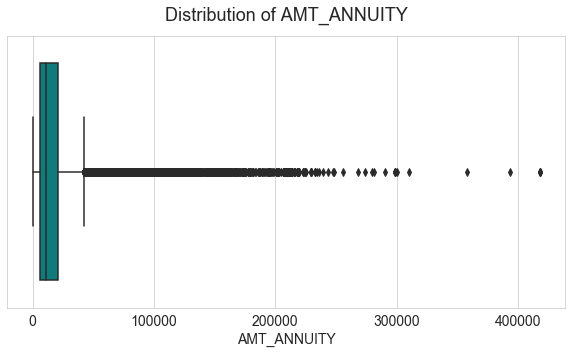

Statistical Description: 
count   1297979.0000
mean      15955.1207
std       14782.1373
min           0.0000
25%        6321.7800
50%       11250.0000
75%       20658.4200
max      418058.1450
Name: AMT_ANNUITY, dtype: float64


In [150]:
uni_contin("AMT_ANNUITY")

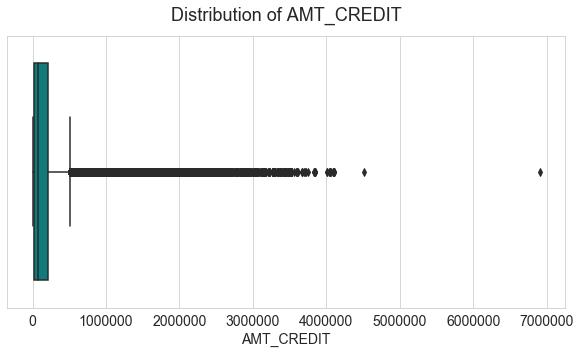

Statistical Description: 
count   1670213.0000
mean     196114.0212
std      318574.6165
min           0.0000
25%       24160.5000
50%       80541.0000
75%      216418.5000
max     6905160.0000
Name: AMT_CREDIT, dtype: float64


In [151]:
uni_contin("AMT_CREDIT")

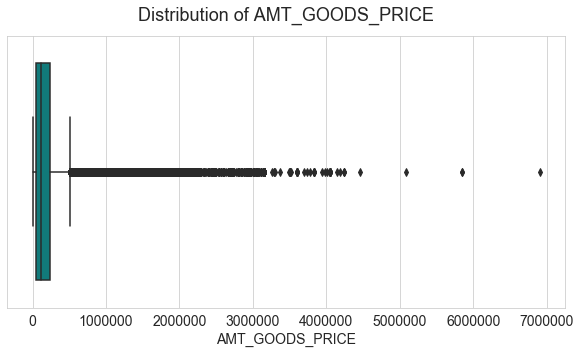

Statistical Description: 
count   1284699.0000
mean     227847.2793
std      315396.5579
min           0.0000
25%       50841.0000
50%      112320.0000
75%      234000.0000
max     6905160.0000
Name: AMT_GOODS_PRICE, dtype: float64


In [152]:
uni_contin("AMT_GOODS_PRICE")

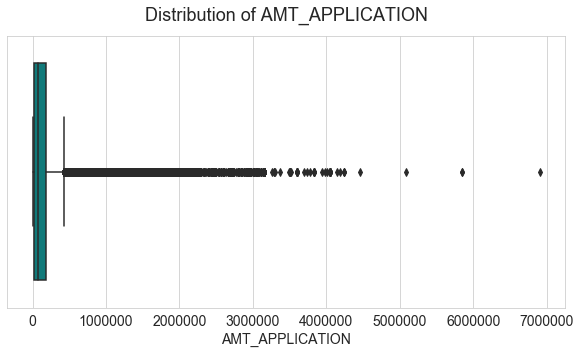

Statistical Description: 
count   1670214.0000
mean     175233.8604
std      292779.7624
min           0.0000
25%       18720.0000
50%       71046.0000
75%      180360.0000
max     6905160.0000
Name: AMT_APPLICATION, dtype: float64


In [153]:
uni_contin("AMT_APPLICATION")

#### Bivariate - Continous to Continous

In [154]:
def biv_nums(x_col, y_col):
    
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['axes.titlepad'] = 10
    plt.rcParams['axes.titlesize'] = 22
    
    #--------------------------- plot ---------------------------------
    
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=x_col, y=y_col, data=prev, color='crimson')
    plt.show()
    
    cor_val = prev[x_col].corr(prev[y_col])
    print("Correlation Value = ",cor_val)
    

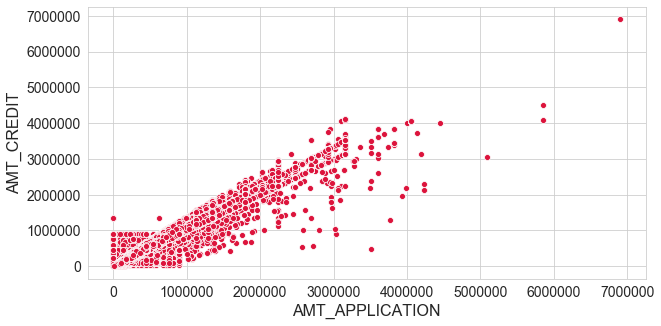

Correlation Value =  0.9758242067013982


In [155]:
biv_nums("AMT_APPLICATION", "AMT_CREDIT")

***There is a positive correlation betweeen the variables***

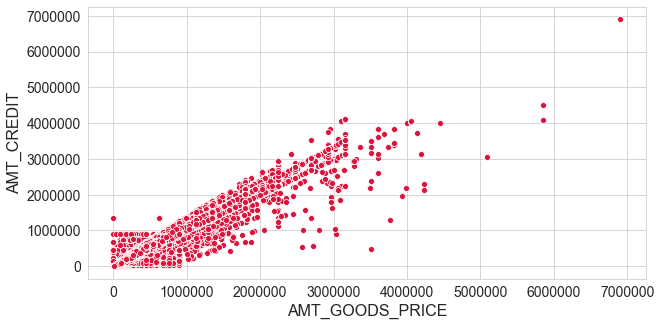

Correlation Value =  0.9930870506319731


In [156]:
biv_nums("AMT_GOODS_PRICE", "AMT_CREDIT")

***There is a positive correlation betweeen the variables***

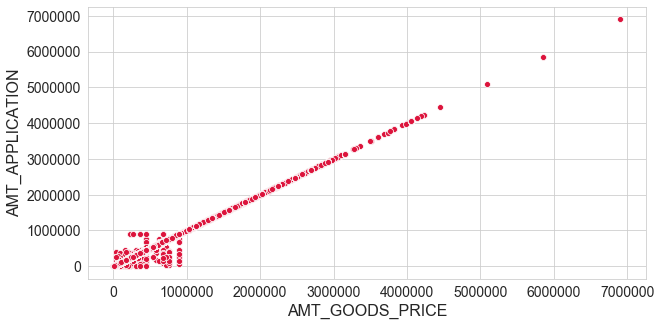

Correlation Value =  0.9998837157835986


In [157]:
biv_nums("AMT_GOODS_PRICE", "AMT_APPLICATION")

***There is a positive correlation betweeen the variables***

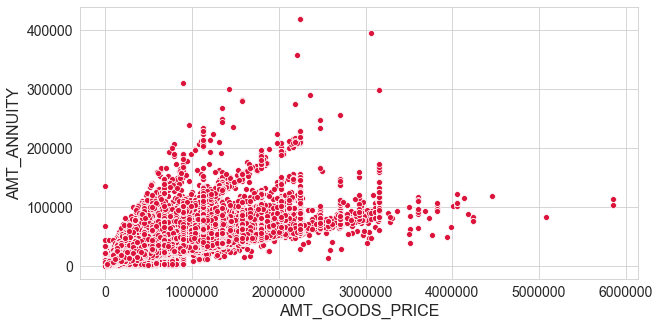

Correlation Value =  0.8208946878275795


In [158]:
biv_nums("AMT_GOODS_PRICE", "AMT_ANNUITY")

***There is a positive correlation betweeen the variables***

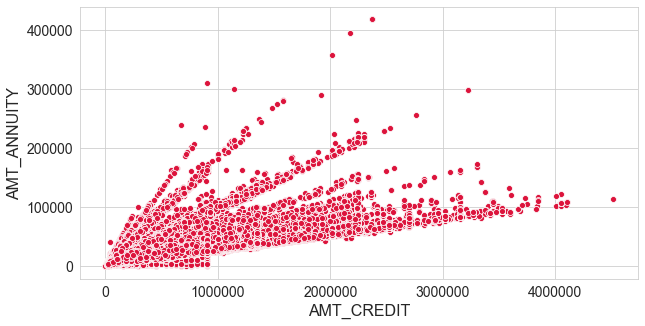

Correlation Value =  0.8164285684447677


In [159]:
biv_nums("AMT_CREDIT", "AMT_ANNUITY")

***There is a positive correlation betweeen the variables***

#### Bivariate - Categorical to Continous

In [160]:
def biv_cat_nums(y_col):
      
    #search source of rcParams: matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['axes.titlepad'] = 15
    plt.rcParams['axes.titlesize'] = 24
    
    #--------------------------- target = 0 ---------------------------------
    
    plt.figure(figsize=(10,5))
    plt.title("NAME_CONTRACT_STATUS vs. "+y_col, fontsize=16)
    sns.boxplot(x="NAME_CONTRACT_STATUS", y=y_col, data=prev)
    plt.show()
    
    print("Statistical Description:")
    print(prev.groupby(by="NAME_CONTRACT_STATUS")[y_col].describe())


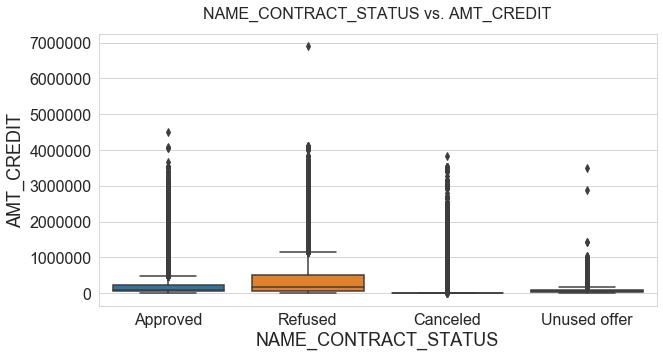

Statistical Description:
                            count        mean         std    min        25%  \
NAME_CONTRACT_STATUS                                                          
Approved             1036780.0000 202564.1821 275302.6663 0.0000 47970.0000   
Canceled              316319.0000  24187.0571 162451.7509 0.0000     0.0000   
Refused               290678.0000 371689.8412 468119.1805 0.0000 60138.0000   
Unused offer           26436.0000  69783.9908  64248.0629 0.0000 34378.8750   

                             50%         75%          max  
NAME_CONTRACT_STATUS                                       
Approved             102208.5000 225000.0000 4509688.5000  
Canceled                  0.0000      0.0000 3847104.0000  
Refused              182956.5000 497520.0000 6905160.0000  
Unused offer          57960.0000  89955.0000 3511305.0000  


In [161]:
biv_cat_nums('AMT_CREDIT')

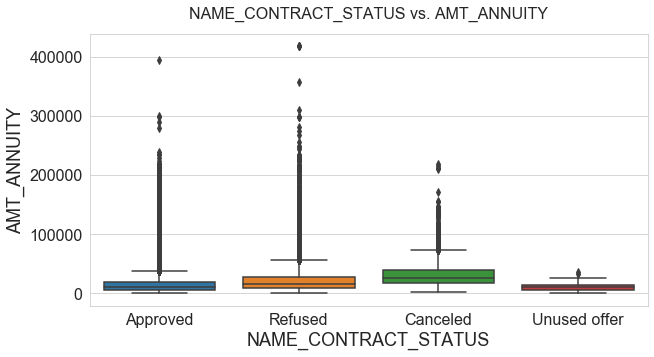

Statistical Description:
                            count       mean        std       min        25%  \
NAME_CONTRACT_STATUS                                                           
Approved             1036773.0000 14720.3501 13802.3549    0.0000  5940.3600   
Canceled               10514.0000 30289.7639 18480.6726 1324.3050 17052.9750   
Refused               249780.0000 20498.1603 17162.7577    0.0000  8514.0900   
Unused offer             912.0000 10145.7986  4714.9084  758.9250  6221.2838   

                            50%        75%         max  
NAME_CONTRACT_STATUS                                    
Approved             10380.2400 18337.9950 393868.6650  
Canceled             26474.6250 39526.4475 218713.5450  
Refused              15653.8800 27861.7612 418058.1450  
Unused offer          9980.6400 14530.4888  35258.9400  


In [162]:
biv_cat_nums('AMT_ANNUITY')

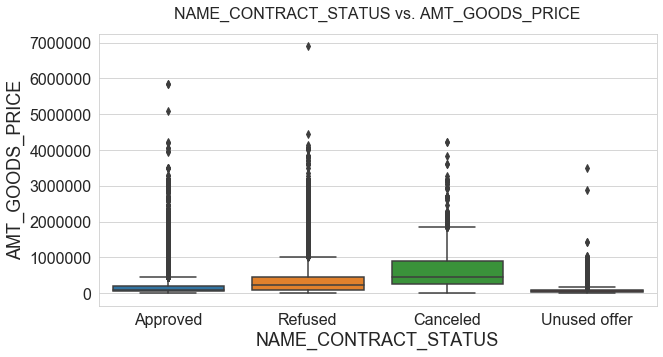

Statistical Description:
                           count        mean         std    min         25%  \
NAME_CONTRACT_STATUS                                                          
Approved             993946.0000 188348.6988 256181.2949 0.0000  47025.0000   
Canceled              10749.0000 668893.3391 512582.2926 0.0000 270000.0000   
Refused              253573.0000 380452.9930 441485.1316 0.0000  90000.0000   
Unused offer          26431.0000  69773.9297  64229.8908 0.0000  34380.0000   

                             50%         75%          max  
NAME_CONTRACT_STATUS                                       
Approved              96709.5000 206899.8750 5850000.0000  
Canceled             454500.0000 900000.0000 4237875.0000  
Refused              225000.0000 463500.0000 6905160.0000  
Unused offer          57960.0000  89955.0000 3511305.0000  


In [163]:
biv_cat_nums('AMT_GOODS_PRICE')

#### Multivariate - Heatmap

In [164]:
corr = prev.iloc[:,2:].corr() #taking columns except ID columns

top10_corr = corr.unstack().sort_values(ascending=False).drop_duplicates()[1:11] #top 10 correlated variables

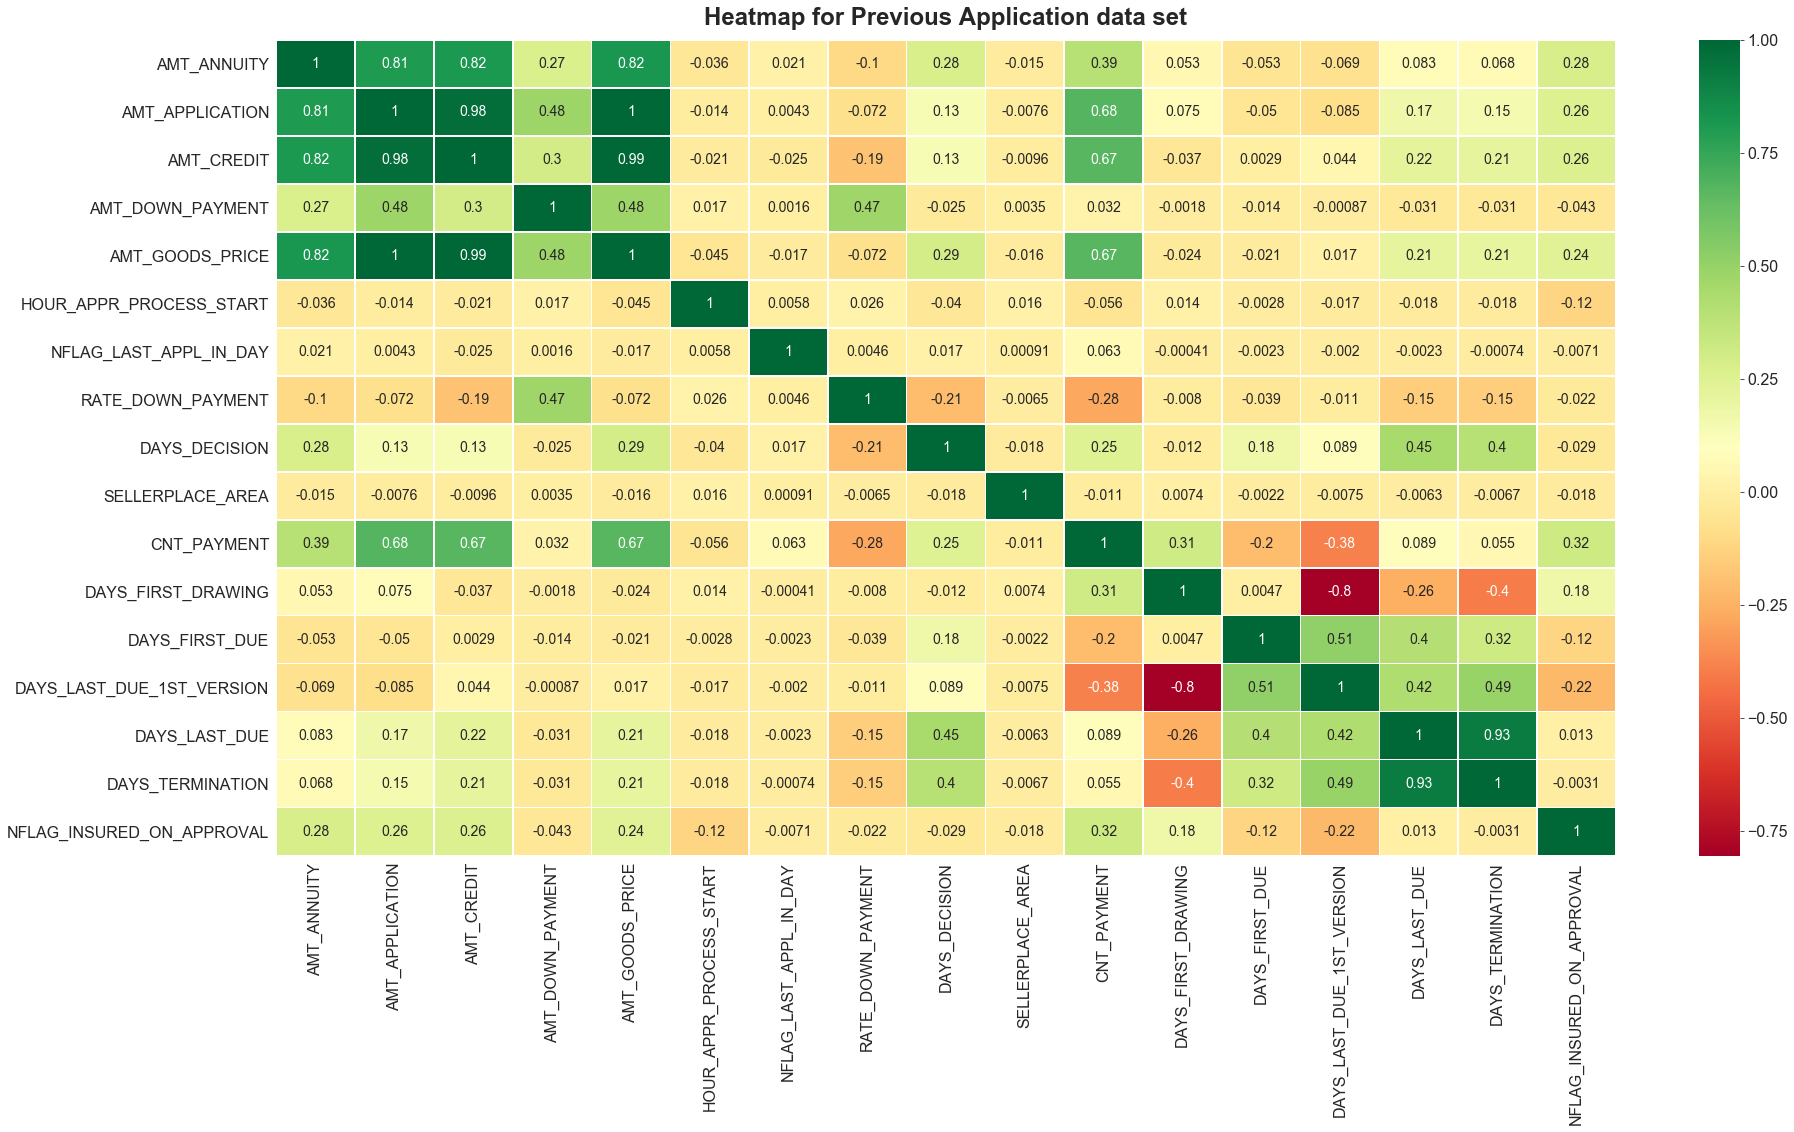

Top 10 correlations: 
AMT_APPLICATION  AMT_GOODS_PRICE    0.9999
AMT_CREDIT       AMT_GOODS_PRICE    0.9931
AMT_APPLICATION  AMT_CREDIT         0.9758
DAYS_LAST_DUE    DAYS_TERMINATION   0.9280
AMT_ANNUITY      AMT_GOODS_PRICE    0.8209
AMT_CREDIT       AMT_ANNUITY        0.8164
AMT_APPLICATION  AMT_ANNUITY        0.8089
CNT_PAYMENT      AMT_APPLICATION    0.6806
AMT_CREDIT       CNT_PAYMENT        0.6743
CNT_PAYMENT      AMT_GOODS_PRICE    0.6721
dtype: float64


In [165]:
plt.figure(figsize=(30,15))
plt.title("Heatmap for Previous Application data set", weight='bold')
sns.heatmap(corr, cmap='RdYlGn', annot=True, annot_kws={"size":14}, linewidth=0.5)
plt.show()

print("Top 10 correlations: ")
print(top10_corr)

### INSIGHTS

1. 'Repeater'  client type category have higher count of 'Approved' loans whereas 'Refreshed' category have the least.
2. 'XAP' and 'XNA' categories have the highest 'Cancelled' loans across many variables.
3. 'Middle' category in NAME_YIELD_GROUP have highest approved loans.
4. 'Low action' group has the least count of 'Approved' as well as 'Refused' loans
5. 'Mobile' category has  the highest count for the good category that the client has applied followed by consumer electronics.
6. 'HC' code reject reason is the most prominent reason  for rejected loans.

                                       Done By - ANUPAMA RAJEEV and SUMITHA T